# Members of Group 3 (P102)

*   Àlex Montoya - 242873
*   Miles Churchland - 290432
*   Daniel Marín - 242255

# Environment Setup


### Imports

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
from google.colab import drive
from tqdm import tqdm
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from torchsummary import summary

### Mounting GoogleDrive folder

In [ ]:
#Mount Google drive
drive.mount('/content/drive')
#cd to the directory in drive you will use
%cd /content/drive/Shareddrives/DeepLearning/FinalProject/
#Print path and content of the current directory
!pwd
!ls

Mounted at /content/drive
/content/drive/Shareddrives/DeepLearning/FinalProject
/content/drive/Shareddrives/DeepLearning/FinalProject
Data					 FinalProject_242255_SORT			Prepscripts
drum_cnn.pth				 FinalProject_CNN_242255_242873_290432.ipynb	Results
FinalProject_242255_nnnnnn_nnnnnn.ipynb  FinalProject_Report_242255_242873_290432.gdoc


### File Paths

In [ ]:
data_dir = '/content/drive/Shareddrives/DeepLearning/FinalProject/Data/Dataset1'
results_path = '/content/drive/Shareddrives/DeepLearning/FinalProject/Results/'
base_dir = '/content/drive/Shareddrives/DeepLearning/FinalProject/'

### Seed

In [ ]:
# Set seeds for reproducibility
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

In [ ]:
#!pip install torch torchvision torchaudio librosa numpy matplotlib

#  Data Processing Functions

In [ ]:
# Define the root directory and categories
data_dir = '/content/drive/Shareddrives/DeepLearning/FinalProject/Data/Dataset1'
categories = ['kick', 'hat', 'snare', 'cymbal', 'tom', 'clap']
fixed_width = 128  # Fixed width for the mel spectrograms

def generate_mel_spectrogram(y, sr, n_mels=128):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)
    return S_DB

def pad_spectrogram(spectrogram, max_len=fixed_width):
    if spectrogram.shape[1] < max_len:
        pad_width = max_len - spectrogram.shape[1]
        padded_spectrogram = np.pad(spectrogram, ((0, 0), (0, pad_width)), mode='constant')
    else:
        padded_spectrogram = spectrogram[:, :max_len]
    return padded_spectrogram

def process_audio_files(data_dir, categories):
    audio_data_list = []
    for category in categories:
        category_path = os.path.join(data_dir, category)

        for file_name in tqdm(os.listdir(category_path), desc=f"Processing {category}"):
            file_path = os.path.join(category_path, file_name)
            if os.path.isfile(file_path):
                try:
                    # Load audio file
                    y, sr = librosa.load(file_path, sr=None)
                    audio_duration = librosa.get_duration(y=y, sr=sr)

                    # Generate Mel-spectrogram
                    S_DB = generate_mel_spectrogram(y, sr)

                    # Pad the mel spectrogram to fixed width
                    S_DB = pad_spectrogram(S_DB, max_len=fixed_width)

                    # Append data to list
                    audio_data_list.append({
                        'label': category,
                        'file_name': file_name,
                        'sampling_rate': sr,
                        'duration': audio_duration,
                        'audio_data': y,
                        'mel_spectrogram': S_DB
                    })
                    print(f"Processed {file_name} in category {category}")
                except Exception as e:
                    print(f"Could not process {file_name}: {e}")
    return audio_data_list

# Call the function
audio_data_list = process_audio_files(data_dir, categories)

# Convert the data to a DataFrame for easy manipulation (optional)
audio_df = pd.DataFrame(audio_data_list)


Processing kick:   0%|          | 1/1301 [00:34<12:36:04, 34.90s/it]

Processed 171505.wav in category kick


Processing kick:   0%|          | 2/1301 [00:35<5:19:45, 14.77s/it] 

Processed 171829.wav in category kick


Processing kick:   0%|          | 3/1301 [00:36<2:59:15,  8.29s/it]

Processed 171827.wav in category kick


Processing kick:   0%|          | 4/1301 [00:36<1:54:04,  5.28s/it]

Processed 172709.wav in category kick


Processing kick:   0%|          | 5/1301 [00:37<1:17:21,  3.58s/it]

Processed 174154.wav in category kick


Processing kick:   0%|          | 6/1301 [00:38<55:50,  2.59s/it]  

Processed 174155.wav in category kick


Processing kick:   1%|          | 7/1301 [00:38<41:46,  1.94s/it]

Processed 174160.wav in category kick


Processing kick:   1%|          | 8/1301 [00:39<32:47,  1.52s/it]

Processed 175961.wav in category kick


Processing kick:   1%|          | 9/1301 [00:39<26:19,  1.22s/it]

Processed 175962.wav in category kick


Processing kick:   1%|          | 10/1301 [00:40<22:02,  1.02s/it]

Processed 175531.wav in category kick


Processing kick:   1%|          | 11/1301 [00:41<19:13,  1.12it/s]

Processed 175533.wav in category kick


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1115
  warnings.warn(
Processing kick:   1%|          | 12/1301 [00:41<17:24,  1.23it/s]

Processed 175534.wav in category kick


Processing kick:   1%|          | 13/1301 [00:42<16:54,  1.27it/s]

Processed 1776.wav in category kick


Processing kick:   1%|          | 14/1301 [00:42<15:31,  1.38it/s]

Processed 178049.wav in category kick


Processing kick:   1%|          | 15/1301 [01:14<3:35:45, 10.07s/it]

Processed 176835.wav in category kick


Processing kick:   1%|▏         | 18/1301 [01:16<1:27:18,  4.08s/it]

Processed 179004.wav in category kick
Processed 178998.wav in category kick
Processed 182337.wav in category kick
Processed 180982.wav in category kick


Processing kick:   2%|▏         | 24/1301 [01:16<25:12,  1.18s/it]

Processed 179033.wav in category kick
Processed 183093.wav in category kick
Processed 183098.wav in category kick
Processed 183097.wav in category kick
Processed 183099.wav in category kick
Processed 183096.wav in category kick
Processed 183581.wav in category kick


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1598
  warnings.warn(
Processing kick:   2%|▏         | 30/1301 [01:17<11:00,  1.92it/s]

Processed 183891.wav in category kick
Processed 185202.wav in category kick
Processed 185025.wav in category kick
Processed 185023.wav in category kick
Processed 1848.wav in category kick
Processed 185200.wav in category kick


Processing kick:   3%|▎         | 36/1301 [01:17<05:25,  3.89it/s]

Processed 185022.wav in category kick
Processed 185201.wav in category kick
Processed 185024.wav in category kick
Processed 185203.wav in category kick
Processed 185294.wav in category kick
Processed 185295.wav in category kick


Processing kick:   3%|▎         | 43/1301 [01:17<02:42,  7.76it/s]

Processed 185293.wav in category kick
Processed 185292.wav in category kick
Processed 186287.wav in category kick
Processed 186280.wav in category kick
Processed 186279.wav in category kick
Processed 186288.wav in category kick
Processed 186290.wav in category kick


Processing kick:   4%|▍         | 51/1301 [01:17<01:30, 13.81it/s]

Processed 185535.wav in category kick
Processed 186286.wav in category kick
Processed 186315.wav in category kick
Processed 186309.wav in category kick
Processed 186308.wav in category kick
Processed 186314.wav in category kick
Processed 186317.wav in category kick


Processing kick:   5%|▍         | 59/1301 [01:17<01:02, 19.72it/s]

Processed 186304.wav in category kick
Processed 186303.wav in category kick
Processed 186306.wav in category kick
Processed 186318.wav in category kick
Processed 186320.wav in category kick
Processed 186971.wav in category kick
Processed 186972.wav in category kick


Processing kick:   5%|▍         | 64/1301 [01:18<00:50, 24.49it/s]

Processed 186974.wav in category kick
Processed 186973.wav in category kick
Processed 187859.wav in category kick
Processed 188098.wav in category kick
Processed 188099.wav in category kick
Processed 191610.wav in category kick
Processed 190942.wav in category kick
Processed 191292.wav in category kick


Processing kick:   6%|▌         | 72/1301 [01:18<00:45, 26.78it/s]

Processed 191612.wav in category kick
Processed 191619.wav in category kick
Processed 191614.wav in category kick
Processed 191618.wav in category kick
Processed 191617.wav in category kick
Processed 191613.wav in category kick
Processed 191616.wav in category kick


Processing kick:   6%|▌         | 80/1301 [01:18<00:46, 26.51it/s]

Processed 191515.wav in category kick
Processed 191615.wav in category kick
Processed 191611.wav in category kick
Processed 192557.wav in category kick
Processed 192556.wav in category kick
Processed 192558.wav in category kick


Processing kick:   6%|▋         | 83/1301 [01:18<00:46, 25.98it/s]

Processed 193540.wav in category kick
Processed 193025.wav in category kick
Processed 193541.wav in category kick
Processed 194170.wav in category kick
Processed 197552.wav in category kick


Processing kick:   7%|▋         | 89/1301 [01:19<00:49, 24.71it/s]

Processed 198100.wav in category kick
Processed 198101.wav in category kick
Processed 197463.wav in category kick
Processed 195396.wav in category kick
Processed 197462.wav in category kick
Processed 197246.wav in category kick


Processing kick:   7%|▋         | 96/1301 [01:19<00:42, 28.03it/s]

Processed 198105.wav in category kick
Processed 199789.wav in category kick
Processed 198810.wav in category kick
Processed 198102.wav in category kick
Processed 2026.wav in category kick


Processing kick:   8%|▊         | 102/1301 [01:19<01:07, 17.85it/s]

Processed 201746.wav in category kick
Processed 201745.wav in category kick
Processed 201163.wav in category kick
Processed 201161.wav in category kick
Processed 2036.wav in category kick
Processed 2038.wav in category kick


Processing kick:   8%|▊         | 106/1301 [01:19<00:57, 20.96it/s]

Processed 2037.wav in category kick
Processed 2040.wav in category kick
Processed 2039.wav in category kick
Processed 20691.wav in category kick
Processed 208430.wav in category kick
Processed 208447.wav in category kick
Processed 208435.wav in category kick


Processing kick:   9%|▉         | 114/1301 [01:20<00:47, 25.14it/s]

Processed 209906.wav in category kick
Processed 209902.wav in category kick
Processed 209907.wav in category kick
Processed 209905.wav in category kick
Processed 211418.wav in category kick
Processed 211417.wav in category kick
Processed 21176.wav in category kick


Processing kick:   9%|▉         | 121/1301 [01:20<00:42, 27.63it/s]

Processed 211420.wav in category kick
Processed 211419.wav in category kick
Processed 211421.wav in category kick
Processed 211422.wav in category kick
Processed 212218.wav in category kick
Processed 217.wav in category kick
Processed 218038.wav in category kick


Processing kick:  10%|▉         | 128/1301 [01:20<00:40, 28.72it/s]

Processed 218041.wav in category kick
Processed 218039.wav in category kick
Processed 213934.wav in category kick
Processed 218042.wav in category kick
Processed 219091.wav in category kick
Processed 219092.wav in category kick
Processed 219609.wav in category kick


Processing kick:  10%|█         | 132/1301 [01:20<00:39, 29.26it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=921
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1858
  warnings.warn(
Processing kick:  10%|█         | 135/1301 [01:20<00:40, 28.50it/s]

Processed 219610.wav in category kick
Processed 221010.wav in category kick
Processed 221145.wav in category kick
Processed 221144.wav in category kick
Processed 221015.wav in category kick
Processed 221017.wav in category kick


Processing kick:  11%|█         | 143/1301 [01:21<00:36, 31.99it/s]

Processed 221364.wav in category kick
Processed 221016.wav in category kick
Processed 222919.wav in category kick
Processed 223087.wav in category kick
Processed 222935.wav in category kick
Processed 222918.wav in category kick
Processed 22499.wav in category kick
Processed 223090.wav in category kick


Processing kick:  11%|█▏        | 147/1301 [01:21<00:35, 32.20it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1743
  warnings.warn(
Processing kick:  12%|█▏        | 151/1301 [01:21<00:33, 33.90it/s]

Processed 22497.wav in category kick
Processed 223537.wav in category kick
Processed 223089.wav in category kick
Processed 22849.wav in category kick
Processed 231589.wav in category kick
Processed 231582.wav in category kick
Processed 234689.wav in category kick


Processing kick:  12%|█▏        | 155/1301 [01:21<00:32, 35.20it/s]

Processed 234691.wav in category kick
Processed 23576.wav in category kick
Processed 241385.wav in category kick
Processed 241380.wav in category kick
Processed 241192.wav in category kick
Processed 241282.wav in category kick
Processed 241386.wav in category kick


Processing kick:  13%|█▎        | 164/1301 [01:21<00:32, 34.79it/s]

Processed 241384.wav in category kick
Processed 240919.wav in category kick
Processed 241286.wav in category kick
Processed 241401.wav in category kick
Processed 241400.wav in category kick
Processed 244353.wav in category kick
Processed 245124.wav in category kick
Processed 244194.wav in category kick
Processed 246286.wav in category kick


Processing kick:  13%|█▎        | 172/1301 [01:21<00:32, 34.67it/s]

Processed 248142.wav in category kick
Processed 249219.wav in category kick
Processed 249203.wav in category kick
Processed 249202.wav in category kick
Processed 249214.wav in category kick
Processed 249209.wav in category kick
Processed 249216.wav in category kick
Processed 249200.wav in category kick
Processed 249208.wav in category kick

Processing kick:  14%|█▍        | 181/1301 [01:22<00:30, 36.94it/s]


Processed 249201.wav in category kick
Processed 249213.wav in category kick
Processed 249239.wav in category kick
Processed 249236.wav in category kick
Processed 249226.wav in category kick
Processed 249243.wav in category kick
Processed 249240.wav in category kick
Processed 249231.wav in category kick


Processing kick:  15%|█▍        | 191/1301 [01:22<00:26, 42.14it/s]

Processed 249238.wav in category kick
Processed 249235.wav in category kick
Processed 249237.wav in category kick
Processed 249242.wav in category kick
Processed 249241.wav in category kick
Processed 249230.wav in category kick
Processed 249224.wav in category kick
Processed 249228.wav in category kick
Processed 249227.wav in category kick
Processed 249229.wav in category kick


Processing kick:  15%|█▌        | 201/1301 [01:22<00:25, 43.31it/s]

Processed 249223.wav in category kick
Processed 249225.wav in category kick
Processed 249234.wav in category kick
Processed 249249.wav in category kick
Processed 249248.wav in category kick
Processed 249255.wav in category kick
Processed 249246.wav in category kick
Processed 249265.wav in category kick
Processed 249251.wav in category kick
Processed 249247.wav in category kick


Processing kick:  16%|█▌        | 211/1301 [01:22<00:23, 45.45it/s]

Processed 249253.wav in category kick
Processed 249250.wav in category kick
Processed 249273.wav in category kick
Processed 249270.wav in category kick
Processed 249268.wav in category kick
Processed 249266.wav in category kick
Processed 249245.wav in category kick
Processed 249263.wav in category kick
Processed 249264.wav in category kick
Processed 249260.wav in category kick


Processing kick:  17%|█▋        | 221/1301 [01:23<00:24, 44.11it/s]

Processed 249271.wav in category kick
Processed 249258.wav in category kick
Processed 249267.wav in category kick
Processed 249284.wav in category kick
Processed 249285.wav in category kick
Processed 249287.wav in category kick
Processed 249286.wav in category kick
Processed 249281.wav in category kick
Processed 249282.wav in category kick


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1487
  warnings.warn(
Processing kick:  18%|█▊        | 231/1301 [01:23<00:23, 44.80it/s]

Processed 249291.wav in category kick
Processed 249280.wav in category kick
Processed 249288.wav in category kick
Processed 252724.wav in category kick
Processed 252719.wav in category kick
Processed 252726.wav in category kick
Processed 252730.wav in category kick
Processed 252733.wav in category kick
Processed 252731.wav in category kick


Processing kick:  19%|█▊        | 241/1301 [01:23<00:24, 43.42it/s]

Processed 252720.wav in category kick
Processed 252722.wav in category kick
Processed 252721.wav in category kick
Processed 252725.wav in category kick
Processed 252723.wav in category kick
Processed 252732.wav in category kick
Processed 254404.wav in category kick
Processed 254406.wav in category kick
Processed 254405.wav in category kick
Processed 255533.wav in category kick


Processing kick:  19%|█▉        | 252/1301 [01:23<00:21, 48.21it/s]

Processed 254407.wav in category kick
Processed 254408.wav in category kick
Processed 25644.wav in category kick
Processed 25645.wav in category kick
Processed 25639.wav in category kick
Processed 25646.wav in category kick
Processed 25637.wav in category kick
Processed 259260.wav in category kick
Processed 26053.wav in category kick
Processed 259516.wav in category kick
Processed 258260.wav in category kick


Processing kick:  20%|██        | 262/1301 [01:23<00:21, 47.25it/s]

Processed 259517.wav in category kick
Processed 26052.wav in category kick
Processed 259518.wav in category kick
Processed 26067.wav in category kick
Processed 26055.wav in category kick
Processed 26063.wav in category kick
Processed 26056.wav in category kick
Processed 261409.wav in category kick
Processed 261331.wav in category kick


Processing kick:  21%|██        | 272/1301 [01:24<00:22, 45.47it/s]

Processed 261857.wav in category kick
Processed 262863.wav in category kick
Processed 264285.wav in category kick
Processed 264294.wav in category kick
Processed 264462.wav in category kick
Processed 264528.wav in category kick
Processed 264601.wav in category kick
Processed 265319.wav in category kick
Processed 264808.wav in category kick
Processed 267595.wav in category kick


Processing kick:  22%|██▏       | 282/1301 [01:24<00:21, 46.34it/s]

Processed 267593.wav in category kick
Processed 26742.wav in category kick
Processed 267597.wav in category kick
Processed 266732.wav in category kick
Processed 267600.wav in category kick
Processed 267599.wav in category kick
Processed 26888.wav in category kick
Processed 269573.wav in category kick
Processed 26894.wav in category kick
Processed 26886.wav in category kick


Processing kick:  22%|██▏       | 292/1301 [01:24<00:21, 46.45it/s]

Processed 26887.wav in category kick
Processed 26885.wav in category kick
Processed 269716.wav in category kick
Processed 270570.wav in category kick
Processed 270568.wav in category kick
Processed 270577.wav in category kick
Processed 271043.wav in category kick
Processed 271078.wav in category kick
Processed 270578.wav in category kick
Processed 270573.wav in category kick


Processing kick:  23%|██▎       | 297/1301 [01:24<00:22, 44.39it/s]

Processed 270576.wav in category kick
Processed 270575.wav in category kick
Processed 270572.wav in category kick
Processed 276718.wav in category kick
Processed 276708.wav in category kick
Processed 276709.wav in category kick
Processed 276712.wav in category kick
Processed 274775.wav in category kick
Processed 276706.wav in category kick


Processing kick:  24%|██▎       | 307/1301 [01:24<00:24, 41.13it/s]

Processed 276713.wav in category kick
Processed 276722.wav in category kick
Processed 276768.wav in category kick
Processed 276723.wav in category kick
Processed 276750.wav in category kick
Processed 276728.wav in category kick
Processed 276748.wav in category kick
Processed 276719.wav in category kick


Processing kick:  24%|██▍       | 317/1301 [01:25<00:24, 39.36it/s]

Processed 276762.wav in category kick
Processed 276765.wav in category kick
Processed 276764.wav in category kick
Processed 276746.wav in category kick
Processed 276763.wav in category kick
Processed 276758.wav in category kick
Processed 276738.wav in category kick
Processed 276726.wav in category kick


Processing kick:  25%|██▌       | 326/1301 [01:25<00:24, 40.43it/s]

Processed 276753.wav in category kick
Processed 276756.wav in category kick
Processed 276747.wav in category kick
Processed 276825.wav in category kick
Processed 276794.wav in category kick
Processed 276773.wav in category kick
Processed 276780.wav in category kick
Processed 276778.wav in category kick
Processed 276779.wav in category kick


Processing kick:  25%|██▌       | 331/1301 [01:25<00:23, 41.32it/s]

Processed 276827.wav in category kick
Processed 276775.wav in category kick
Processed 276815.wav in category kick
Processed 276826.wav in category kick
Processed 276784.wav in category kick
Processed 276828.wav in category kick
Processed 276781.wav in category kick
Processed 276772.wav in category kick
Processed 276774.wav in category kick


Processing kick:  26%|██▌       | 341/1301 [01:25<00:22, 42.01it/s]

Processed 276829.wav in category kick
Processed 276782.wav in category kick
Processed 276777.wav in category kick
Processed 276830.wav in category kick
Processed 28367.wav in category kick
Processed 28373.wav in category kick
Processed 28372.wav in category kick
Processed 276833.wav in category kick
Processed 28371.wav in category kick
Processed 28370.wav in category kick


Processing kick:  27%|██▋       | 351/1301 [01:26<00:23, 40.61it/s]

Processed 277687.wav in category kick
Processed 276832.wav in category kick
Processed 276834.wav in category kick
Processed 278984.wav in category kick
Processed 28705.wav in category kick
Processed 28704.wav in category kick
Processed 28703.wav in category kick


Processing kick:  27%|██▋       | 356/1301 [01:26<00:26, 35.45it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1956
  warnings.warn(


Processed 29562.wav in category kick
Processed 29565.wav in category kick
Processed 29564.wav in category kick
Processed 30374.wav in category kick
Processed 3138.wav in category kick
Processed 317979.wav in category kick
Processed 317868.wav in category kick
Processed 317957.wav in category kick


Processing kick:  28%|██▊       | 361/1301 [01:26<00:25, 37.46it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1705
  warnings.warn(
Processing kick:  28%|██▊       | 365/1301 [01:26<00:24, 37.66it/s]

Processed 317867.wav in category kick
Processed 317889.wav in category kick
Processed 317958.wav in category kick
Processed 3193.wav in category kick
Processed 318330.wav in category kick
Processed 319829.wav in category kick
Processed 323476.wav in category kick
Processed 323475.wav in category kick
Processed 323474.wav in category kick


Processing kick:  29%|██▉       | 375/1301 [01:26<00:23, 38.70it/s]

Processed 321297.wav in category kick
Processed 323602.wav in category kick
Processed 323604.wav in category kick
Processed 323601.wav in category kick
Processed 323598.wav in category kick
Processed 321167.wav in category kick
Processed 323599.wav in category kick


Processing kick:  30%|██▉       | 384/1301 [01:26<00:23, 38.92it/s]

Processed 323595.wav in category kick
Processed 323473.wav in category kick
Processed 323608.wav in category kick
Processed 326823.wav in category kick
Processed 32508.wav in category kick
Processed 326075.wav in category kick
Processed 326076.wav in category kick
Processed 324915.wav in category kick
Processed 330045.wav in category kick
Processed 330041.wav in category kick


Processing kick:  30%|███       | 394/1301 [01:27<00:21, 42.00it/s]

Processed 330043.wav in category kick
Processed 330037.wav in category kick
Processed 330039.wav in category kick
Processed 330035.wav in category kick
Processed 330036.wav in category kick
Processed 330044.wav in category kick
Processed 330038.wav in category kick
Processed 330042.wav in category kick
Processed 33141.wav in category kick
Processed 33145.wav in category kick


Processing kick:  31%|███       | 406/1301 [01:27<00:18, 48.86it/s]

Processed 33144.wav in category kick
Processed 331432.wav in category kick
Processed 33143.wav in category kick
Processed 33142.wav in category kick
Processed 332353.wav in category kick
Processed 331831.wav in category kick
Processed 332363.wav in category kick
Processed 332356.wav in category kick
Processed 332361.wav in category kick
Processed 332359.wav in category kick
Processed 332354.wav in category kick
Processed 332357.wav in category kick


Processing kick:  32%|███▏      | 422/1301 [01:27<00:14, 60.41it/s]

Processed 332358.wav in category kick
Processed 332355.wav in category kick
Processed 332360.wav in category kick
Processed 33325.wav in category kick
Processed 333675.wav in category kick
Processed 333677.wav in category kick
Processed 333673.wav in category kick
Processed 333674.wav in category kick
Processed 333669.wav in category kick
Processed 333670.wav in category kick
Processed 333676.wav in category kick
Processed 33580.wav in category kick
Processed 336192.wav in category kick
Processed 33572.wav in category kick
Processed 33573.wav in category kick


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1486
  warnings.warn(
Processing kick:  34%|███▎      | 438/1301 [01:27<00:12, 68.13it/s]

Processed 334071.wav in category kick
Processed 33574.wav in category kick
Processed 336319.wav in category kick
Processed 337827.wav in category kick
Processed 337822.wav in category kick
Processed 339824.wav in category kick
Processed 340473.wav in category kick
Processed 339825.wav in category kick
Processed 342015.wav in category kick
Processed 342302.wav in category kick
Processed 342304.wav in category kick
Processed 342303.wav in category kick
Processed 34498.wav in category kick
Processed 346029.wav in category kick
Processed 345612.wav in category kick


Processing kick:  34%|███▍      | 445/1301 [01:27<00:12, 68.65it/s]

Processed 346032.wav in category kick
Processed 347077.wav in category kick
Processed 347091.wav in category kick
Processed 347095.wav in category kick
Processed 347074.wav in category kick
Processed 347073.wav in category kick
Processed 347084.wav in category kick
Processed 347090.wav in category kick
Processed 347094.wav in category kick
Processed 347087.wav in category kick
Processed 347092.wav in category kick
Processed 347093.wav in category kick
Processed 347081.wav in category kick
Processed 347089.wav in category kick

Processing kick:  35%|███▍      | 452/1301 [01:28<00:13, 64.14it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1814
  warnings.warn(
Processing kick:  35%|███▌      | 459/1301 [01:28<00:13, 61.49it/s]


Processed 347088.wav in category kick
Processed 347101.wav in category kick
Processed 347129.wav in category kick
Processed 347102.wav in category kick
Processed 347099.wav in category kick
Processed 347097.wav in category kick
Processed 347103.wav in category kick
Processed 347105.wav in category kick
Processed 347104.wav in category kick
Processed 347098.wav in category kick
Processed 347096.wav in category kick


Processing kick:  36%|███▌      | 466/1301 [01:28<00:13, 62.73it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1887
  warnings.warn(
Processing kick:  36%|███▋      | 474/1301 [01:28<00:12, 65.95it/s]

Processed 34842.wav in category kick
Processed 347625.wav in category kick
Processed 348054.wav in category kick
Processed 34839.wav in category kick
Processed 348056.wav in category kick
Processed 347624.wav in category kick
Processed 34838.wav in category kick
Processed 350394.wav in category kick
Processed 349764.wav in category kick
Processed 349735.wav in category kick
Processed 349739.wav in category kick
Processed 349751.wav in category kick
Processed 349772.wav in category kick
Processed 349720.wav in category kick
Processed 349732.wav in category kick
Processed 349718.wav in category kick


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1321
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1626
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1460
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1852
  warnings.warn(
Processing kick:  37%|███▋      | 482/1301 [01:28<00:11, 68.26it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1835
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1811
  warnings.war

Processed 349748.wav in category kick
Processed 349727.wav in category kick
Processed 349738.wav in category kick
Processed 349734.wav in category kick
Processed 349755.wav in category kick
Processed 349778.wav in category kick
Processed 350378.wav in category kick
Processed 349780.wav in category kick
Processed 351223.wav in category kick
Processed 351222.wav in category kick
Processed 353736.wav in category kick
Processed 353396.wav in category kick
Processed 353739.wav in category kick
Processed 353395.wav in category kick
Processed 353723.wav in category kick
Processed 351917.wav in category kick


Processing kick:  39%|███▉      | 506/1301 [01:28<00:10, 72.61it/s]

Processed 353740.wav in category kick
Processed 353725.wav in category kick
Processed 353728.wav in category kick
Processed 351916.wav in category kick
Processed 353394.wav in category kick
Processed 353722.wav in category kick
Processed 353724.wav in category kick
Processed 353713.wav in category kick
Processed 353756.wav in category kick
Processed 353757.wav in category kick
Processed 353755.wav in category kick
Processed 353747.wav in category kick
Processed 353741.wav in category kick
Processed 353759.wav in category kick
Processed 353915.wav in category kick


Processing kick:  40%|████      | 522/1301 [01:29<00:10, 72.78it/s]

Processed 353760.wav in category kick
Processed 353748.wav in category kick
Processed 353752.wav in category kick
Processed 353746.wav in category kick
Processed 353742.wav in category kick
Processed 353743.wav in category kick
Processed 353754.wav in category kick
Processed 353753.wav in category kick
Processed 353758.wav in category kick
Processed 355066.wav in category kick
Processed 355061.wav in category kick
Processed 35651.wav in category kick
Processed 35653.wav in category kick


Processing kick:  41%|████▏     | 537/1301 [01:29<00:11, 65.96it/s]

Processed 35650.wav in category kick
Processed 35652.wav in category kick
Processed 35654.wav in category kick
Processed 35664.wav in category kick
Processed 35657.wav in category kick
Processed 35662.wav in category kick
Processed 35659.wav in category kick
Processed 35660.wav in category kick
Processed 35655.wav in category kick
Processed 35661.wav in category kick
Processed 35656.wav in category kick
Processed 36008.wav in category kick
Processed 35992.wav in category kick
Processed 35991.wav in category kick


Processing kick:  42%|████▏     | 545/1301 [01:29<00:10, 69.13it/s]

Processed 36002.wav in category kick
Processed 35998.wav in category kick
Processed 36007.wav in category kick
Processed 35989.wav in category kick
Processed 35994.wav in category kick
Processed 35999.wav in category kick
Processed 36001.wav in category kick
Processed 36004.wav in category kick
Processed 35997.wav in category kick
Processed 35996.wav in category kick
Processed 35995.wav in category kick
Processed 36000.wav in category kick
Processed 36006.wav in category kick
Processed 36003.wav in category kick
Processed 36010.wav in category kick


Processing kick:  43%|████▎     | 560/1301 [01:29<00:10, 68.09it/s]

Processed 36028.wav in category kick
Processed 36023.wav in category kick
Processed 36024.wav in category kick
Processed 361130.wav in category kick
Processed 36087.wav in category kick
Processed 361938.wav in category kick
Processed 36027.wav in category kick
Processed 361937.wav in category kick
Processed 361940.wav in category kick
Processed 361943.wav in category kick
Processed 36016.wav in category kick
Processed 361944.wav in category kick
Processed 36009.wav in category kick
Processed 361950.wav in category kick
Processed 361945.wav in category kick


Processing kick:  44%|████▍     | 576/1301 [01:29<00:10, 70.15it/s]

Processed 361949.wav in category kick
Processed 361942.wav in category kick
Processed 36030.wav in category kick
Processed 361952.wav in category kick
Processed 361962.wav in category kick
Processed 361960.wav in category kick
Processed 361959.wav in category kick
Processed 361958.wav in category kick
Processed 361964.wav in category kick
Processed 361966.wav in category kick
Processed 361957.wav in category kick
Processed 361954.wav in category kick
Processed 361961.wav in category kick
Processed 361955.wav in category kick
Processed 361978.wav in category kick


Processing kick:  46%|████▌     | 592/1301 [01:30<00:10, 70.58it/s]

Processed 361963.wav in category kick
Processed 361965.wav in category kick
Processed 361967.wav in category kick
Processed 361969.wav in category kick
Processed 361968.wav in category kick
Processed 361956.wav in category kick
Processed 362963.wav in category kick
Processed 369499.wav in category kick
Processed 367860.wav in category kick
Processed 369104.wav in category kick
Processed 369946.wav in category kick
Processed 369944.wav in category kick
Processed 371192.wav in category kick


Processing kick:  47%|████▋     | 607/1301 [01:30<00:10, 64.00it/s]

Processed 371690.wav in category kick
Processed 376489.wav in category kick
Processed 376491.wav in category kick
Processed 376490.wav in category kick
Processed 376488.wav in category kick
Processed 381523.wav in category kick
Processed 381825.wav in category kick
Processed 383927.wav in category kick
Processed 385944.wav in category kick
Processed 383141.wav in category kick
Processed 385874.wav in category kick
Processed 383928.wav in category kick
Processed 384988.wav in category kick

Processing kick:  48%|████▊     | 622/1301 [01:30<00:10, 65.40it/s]


Processed 386966.wav in category kick
Processed 387346.wav in category kick
Processed 388444.wav in category kick
Processed 388436.wav in category kick
Processed 38905.wav in category kick
Processed 38909.wav in category kick
Processed 38907.wav in category kick
Processed 38902.wav in category kick
Processed 38908.wav in category kick
Processed 38900.wav in category kick
Processed 38903.wav in category kick
Processed 38904.wav in category kick
Processed 38901.wav in category kick
Processed 38898.wav in category kick


Processing kick:  49%|████▉     | 637/1301 [01:30<00:09, 69.35it/s]

Processed 38897.wav in category kick
Processed 38896.wav in category kick
Processed 38899.wav in category kick
Processed 38906.wav in category kick
Processed 38912.wav in category kick
Processed 38914.wav in category kick
Processed 38910.wav in category kick
Processed 38911.wav in category kick
Processed 38913.wav in category kick
Processed 396585.wav in category kick
Processed 394028.wav in category kick
Processed 395548.wav in category kick
Processed 397041.wav in category kick
Processed 404864.wav in category kick
Processed 404872.wav in category kick


Processing kick:  50%|████▉     | 644/1301 [01:30<00:09, 69.29it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1324
  warnings.warn(
Processing kick:  50%|█████     | 652/1301 [01:30<00:09, 70.70it/s]

Processed 404879.wav in category kick
Processed 39734.wav in category kick
Processed 404878.wav in category kick
Processed 399896.wav in category kick
Processed 400707.wav in category kick
Processed 404877.wav in category kick
Processed 404883.wav in category kick
Processed 40604.wav in category kick
Processed 40600.wav in category kick
Processed 404882.wav in category kick
Processed 404881.wav in category kick
Processed 404885.wav in category kick
Processed 404886.wav in category kick
Processed 410149.wav in category kick
Processed 411333.wav in category kick
Processed 411336.wav in category kick


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1392
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1644
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=637
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1733
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1622
  warnings.warn(
Processing kick:  51%|█████     | 661/1301 [01:31<00:08, 73.44it/s]

Processed 411328.wav in category kick
Processed 411334.wav in category kick
Processed 411335.wav in category kick
Processed 411337.wav in category kick
Processed 411330.wav in category kick
Processed 411332.wav in category kick
Processed 411329.wav in category kick
Processed 41155.wav in category kick
Processed 41150.wav in category kick
Processed 41148.wav in category kick
Processed 41153.wav in category kick
Processed 41151.wav in category kick
Processed 41154.wav in category kick
Processed 41152.wav in category kick


Processing kick:  52%|█████▏    | 676/1301 [01:31<00:09, 64.47it/s]

Processed 411488.wav in category kick
Processed 41149.wav in category kick
Processed 41310.wav in category kick
Processed 412509.wav in category kick
Processed 41421.wav in category kick
Processed 41420.wav in category kick
Processed 41419.wav in category kick
Processed 41418.wav in category kick
Processed 41417.wav in category kick
Processed 41422.wav in category kick
Processed 41423.wav in category kick
Processed 41425.wav in category kick
Processed 41424.wav in category kick


Processing kick:  53%|█████▎    | 691/1301 [01:31<00:08, 68.17it/s]

Processed 414680.wav in category kick
Processed 414683.wav in category kick
Processed 414688.wav in category kick
Processed 414968.wav in category kick
Processed 416204.wav in category kick
Processed 414973.wav in category kick
Processed 414969.wav in category kick
Processed 414970.wav in category kick
Processed 42029.wav in category kick
Processed 42030.wav in category kick
Processed 422279.wav in category kick
Processed 422282.wav in category kick
Processed 422280.wav in category kick
Processed 422283.wav in category kick
Processed 422284.wav in category kick
Processed 422286.wav in category kick


Processing kick:  54%|█████▍    | 708/1301 [01:31<00:08, 73.59it/s]

Processed 422288.wav in category kick
Processed 422285.wav in category kick
Processed 422450.wav in category kick
Processed 422446.wav in category kick
Processed 422451.wav in category kick
Processed 422444.wav in category kick
Processed 422453.wav in category kick
Processed 422447.wav in category kick
Processed 422448.wav in category kick
Processed 422452.wav in category kick
Processed 422445.wav in category kick
Processed 422553.wav in category kick
Processed 422555.wav in category kick
Processed 422557.wav in category kick
Processed 422554.wav in category kick
Processed 424662.wav in category kick
Processed 425320.wav in category kick


Processing kick:  56%|█████▌    | 724/1301 [01:32<00:08, 68.48it/s]

Processed 426190.wav in category kick
Processed 431632.wav in category kick
Processed 431633.wav in category kick
Processed 43366.wav in category kick
Processed 433682.wav in category kick
Processed 43370.wav in category kick
Processed 431635.wav in category kick
Processed 434329.wav in category kick
Processed 43368.wav in category kick
Processed 43367.wav in category kick
Processed 431636.wav in category kick
Processed 431634.wav in category kick
Processed 43371.wav in category kick


Processing kick:  56%|█████▌    | 731/1301 [01:32<00:09, 63.16it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1071
  warnings.warn(


Processed 432889.wav in category kick
Processed 433680.wav in category kick
Processed 43369.wav in category kick
Processed 433681.wav in category kick
Processed 434349.wav in category kick
Processed 4348.wav in category kick
Processed 4349.wav in category kick
Processed 435043.wav in category kick
Processed 435034.wav in category kick


Processing kick:  57%|█████▋    | 738/1301 [01:32<00:11, 50.53it/s]

Processed 439808.wav in category kick
Processed 439809.wav in category kick
Processed 439814.wav in category kick
Processed 439811.wav in category kick
Processed 442603.wav in category kick
Processed 453214.wav in category kick
Processed 453203.wav in category kick
Processed 45188.wav in category kick


Processing kick:  58%|█████▊    | 750/1301 [01:32<00:11, 47.32it/s]

Processed 453206.wav in category kick
Processed 453207.wav in category kick
Processed 453213.wav in category kick
Processed 453215.wav in category kick
Processed 453216.wav in category kick
Processed 45595.wav in category kick
Processed 456463.wav in category kick
Processed 45596.wav in category kick
Processed 46527.wav in category kick
Processed 46386.wav in category kick


Processing kick:  58%|█████▊    | 755/1301 [01:32<00:11, 46.25it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1582
  warnings.warn(
Processing kick:  58%|█████▊    | 760/1301 [01:32<00:11, 46.06it/s]

Processed 46528.wav in category kick
Processed 47436.wav in category kick
Processed 47451.wav in category kick
Processed 47696.wav in category kick
Processed 47952.wav in category kick
Processed 47950.wav in category kick
Processed 47695.wav in category kick
Processed 47951.wav in category kick
Processed 49606.wav in category kick
Processed 54528.wav in category kick


Processing kick:  59%|█████▉    | 770/1301 [01:33<00:11, 44.67it/s]

Processed 54521.wav in category kick
Processed 54606.wav in category kick
Processed 56429.wav in category kick
Processed 56430.wav in category kick
Processed 56428.wav in category kick
Processed 56431.wav in category kick
Processed 56440.wav in category kick
Processed 58901.wav in category kick
Processed 59749.wav in category kick
Processed 59748.wav in category kick


Processing kick:  60%|█████▉    | 780/1301 [01:33<00:11, 45.22it/s]

Processed 59750.wav in category kick
Processed 59976.wav in category kick
Processed 60719.wav in category kick
Processed 61675.wav in category kick
Processed 61677.wav in category kick
Processed 61674.wav in category kick
Processed 61678.wav in category kick
Processed 61676.wav in category kick
Processed 61819.wav in category kick
Processed 64394.wav in category kick


Processing kick:  61%|██████    | 790/1301 [01:33<00:11, 44.90it/s]

Processed 66800.wav in category kick
Processed 66802.wav in category kick
Processed 66941.wav in category kick
Processed 66801.wav in category kick
Processed 66940.wav in category kick
Processed 67222.wav in category kick
Processed 67217.wav in category kick
Processed 67221.wav in category kick
Processed 67218.wav in category kick
Processed 67220.wav in category kick


Processing kick:  62%|██████▏   | 801/1301 [01:33<00:10, 47.17it/s]

Processed 71378.wav in category kick
Processed 68608.wav in category kick
Processed 71612.wav in category kick
Processed 71629.wav in category kick
Processed 71610.wav in category kick
Processed 71605.wav in category kick
Processed 71626.wav in category kick
Processed 71636.wav in category kick
Processed 71623.wav in category kick
Processed 71607.wav in category kick
Processed 71609.wav in category kick


Processing kick:  62%|██████▏   | 812/1301 [01:34<00:09, 49.06it/s]

Processed 71604.wav in category kick
Processed 71625.wav in category kick
Processed 71614.wav in category kick
Processed 71637.wav in category kick
Processed 71632.wav in category kick
Processed 71613.wav in category kick
Processed 71628.wav in category kick
Processed 71639.wav in category kick
Processed 71608.wav in category kick
Processed 71631.wav in category kick


Processing kick:  63%|██████▎   | 822/1301 [01:34<00:11, 41.81it/s]

Processed 71615.wav in category kick
Processed 71661.wav in category kick
Processed 71648.wav in category kick
Processed 71642.wav in category kick
Processed 71657.wav in category kick
Processed 71651.wav in category kick
Processed 71655.wav in category kick
Processed 71658.wav in category kick


Processing kick:  64%|██████▎   | 827/1301 [01:34<00:12, 38.72it/s]

Processed 71659.wav in category kick
Processed 71650.wav in category kick
Processed 71656.wav in category kick
Processed 71643.wav in category kick
Processed 71640.wav in category kick
Processed 71645.wav in category kick
Processed 71647.wav in category kick


Processing kick:  64%|██████▍   | 835/1301 [01:34<00:12, 36.27it/s]

Processed 71641.wav in category kick
Processed 71649.wav in category kick
Processed 71664.wav in category kick
Processed 72070.wav in category kick
Processed 72987.wav in category kick
Processed 72990.wav in category kick
Processed 72986.wav in category kick
Processed 72991.wav in category kick


Processing kick:  65%|██████▍   | 845/1301 [01:34<00:11, 40.61it/s]

Processed 72989.wav in category kick
Processed 72993.wav in category kick
Processed 72976.wav in category kick
Processed 72988.wav in category kick
Processed 72977.wav in category kick
Processed 72992.wav in category kick
Processed 72994.wav in category kick
Processed 72975.wav in category kick
Processed 72995.wav in category kick
Processed 7411.wav in category kick


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2044
  warnings.warn(
Processing kick:  66%|██████▌   | 855/1301 [01:35<00:10, 42.07it/s]

Processed 74842.wav in category kick
Processed 75390.wav in category kick
Processed 75381.wav in category kick
Processed 75382.wav in category kick
Processed 75842.wav in category kick
Processed 75391.wav in category kick
Processed 777.wav in category kick
Processed 76289.wav in category kick
Processed 77302.wav in category kick
Processed 773.wav in category kick


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1754
  warnings.warn(
Processing kick:  66%|██████▋   | 865/1301 [01:35<00:09, 43.80it/s]

Processed 76363.wav in category kick
Processed 78212.wav in category kick
Processed 78555.wav in category kick
Processed 78551.wav in category kick
Processed 78552.wav in category kick
Processed 78553.wav in category kick
Processed 78554.wav in category kick
Processed 78548.wav in category kick
Processed 78549.wav in category kick


Processing kick:  67%|██████▋   | 870/1301 [01:35<00:10, 42.30it/s]

Processed 78546.wav in category kick
Processed 78550.wav in category kick
Processed 78556.wav in category kick
Processed 78815.wav in category kick
Processed 78813.wav in category kick
Processed 78816.wav in category kick


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1478
  warnings.warn(
Processing kick:  67%|██████▋   | 875/1301 [01:35<00:13, 32.57it/s]

Processed 8113.wav in category kick
Processed 808.wav in category kick
Processed 807.wav in category kick
Processed 8097.wav in category kick
Processed 80693.wav in category kick


Processing kick:  68%|██████▊   | 883/1301 [01:36<00:14, 28.09it/s]

Processed 81229.wav in category kick
Processed 81230.wav in category kick
Processed 81231.wav in category kick
Processed 81232.wav in category kick
Processed 81228.wav in category kick
Processed 81233.wav in category kick


Processing kick:  68%|██████▊   | 887/1301 [01:36<00:17, 23.41it/s]

Processed 83138.wav in category kick
Processed 82279.wav in category kick
Processed 83141.wav in category kick
Processed 82313.wav in category kick


Processing kick:  68%|██████▊   | 890/1301 [01:36<00:19, 21.60it/s]

Processed 83139.wav in category kick
Processed 82309.wav in category kick
Processed 83140.wav in category kick
Processed 83257.wav in category kick


Processing kick:  69%|██████▊   | 893/1301 [01:36<00:21, 19.32it/s]

Processed 83142.wav in category kick
Processed 83254.wav in category kick
Processed 83258.wav in category kick
Processed 83256.wav in category kick


Processing kick:  69%|██████▉   | 898/1301 [01:36<00:22, 18.26it/s]

Processed 83284.wav in category kick
Processed 83255.wav in category kick
Processed 83154.wav in category kick
Processed 83261.wav in category kick
Processed 83152.wav in category kick


Processing kick:  69%|██████▉   | 903/1301 [01:37<00:21, 18.87it/s]

Processed 83149.wav in category kick
Processed 83260.wav in category kick
Processed 83282.wav in category kick
Processed 83763.wav in category kick
Processed 83768.wav in category kick


Processing kick:  70%|██████▉   | 910/1301 [01:37<00:15, 24.55it/s]

Processed 83762.wav in category kick
Processed 84384.wav in category kick
Processed 85101.wav in category kick
Processed 85176.wav in category kick
Processed 85100.wav in category kick
Processed 85528.wav in category kick
Processed 85175.wav in category kick


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1450
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1579
  warnings.warn(
Processing kick:  70%|███████   | 914/1301 [01:37<00:13, 28.01it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1765
  warnings.warn(
Processing kick:  71%|███████   | 919/1301 [01:37<00:11, 32.09it/s]

Processed 87097.wav in category kick
Processed 87091.wav in category kick
Processed 87096.wav in category kick
Processed 87548.wav in category kick
Processed 87094.wav in category kick
Processed 87092.wav in category kick
Processed 87093.wav in category kick
Processed 87095.wav in category kick


Processing kick:  71%|███████▏  | 927/1301 [01:37<00:11, 31.56it/s]

Processed 87556.wav in category kick
Processed 87553.wav in category kick
Processed 87552.wav in category kick
Processed 88627.wav in category kick
Processed 87554.wav in category kick
Processed 88613.wav in category kick
Processed 87555.wav in category kick


Processing kick:  72%|███████▏  | 931/1301 [01:38<00:12, 29.67it/s]

Processed 87728.wav in category kick
Processed 88602.wav in category kick
Processed 88619.wav in category kick
Processed 87550.wav in category kick
Processed 87549.wav in category kick
Processed 89455.wav in category kick


Processing kick:  72%|███████▏  | 939/1301 [01:38<00:11, 31.03it/s]

Processed 89465.wav in category kick
Processed 89464.wav in category kick
Processed 89456.wav in category kick
Processed 89454.wav in category kick
Processed 89460.wav in category kick
Processed 89462.wav in category kick
Processed 89452.wav in category kick


Processing kick:  72%|███████▏  | 943/1301 [01:38<00:11, 32.53it/s]

Processed 90079.wav in category kick
Processed 89457.wav in category kick
Processed 89453.wav in category kick
Processed 89466.wav in category kick
Processed 89458.wav in category kick
Processed 89451.wav in category kick


Processing kick:  73%|███████▎  | 950/1301 [01:38<00:12, 28.46it/s]

Processed 90150.wav in category kick
Processed 90373.wav in category kick
Processed 90147.wav in category kick
Processed 90151.wav in category kick
Processed 90148.wav in category kick
Processed 91682.wav in category kick
Processed 91789.wav in category kick
Processed 91788.wav in category kick


Processing kick:  74%|███████▎  | 959/1301 [01:38<00:10, 32.66it/s]

Processed 92053.wav in category kick
Processed 93814.wav in category kick
Processed 9590.wav in category kick
Processed 93816.wav in category kick
Processed 95076.wav in category kick
Processed 93817.wav in category kick
Processed 93810.wav in category kick
Processed 95380.wav in category kick


Processing kick:  74%|███████▍  | 967/1301 [01:39<00:09, 34.35it/s]

Processed 93809.wav in category kick
Processed 93807.wav in category kick
Processed 96068.wav in category kick
Processed 95075.wav in category kick
Processed 96069.wav in category kick
Processed 99757.wav in category kick
Processed 99913.wav in category kick
Processed bd_mainroom.wav in category kick


Processing kick:  75%|███████▍  | 972/1301 [01:39<00:09, 35.01it/s]

Processed bd_sodeep.wav in category kick
Processed bd_gas.wav in category kick
Processed bd_ghost.wav in category kick
Processed bd_streek.wav in category kick
Processed bd_sonikboom.wav in category kick


Processing kick:  75%|███████▌  | 980/1301 [01:39<00:11, 27.32it/s]

Processed bd_newyear.wav in category kick
Processed bd_outdoor.wav in category kick
Processed bd_sub808.wav in category kick
Processed bd_909dwsd.wav in category kick
Processed bd_organicisin.wav in category kick


Processing kick:  76%|███████▌  | 984/1301 [01:39<00:10, 29.07it/s]

Processed bd_tripper.wav in category kick
Processed bd_deephouser.wav in category kick
Processed bd_shoein.wav in category kick
Processed bd_vintager.wav in category kick
Processed bd_hybrid.wav in category kick
Processed bd_untitled.wav in category kick
Processed bd_tech.wav in category kick


Processing kick:  76%|███████▌  | 992/1301 [01:40<00:10, 30.29it/s]

Processed bd_dandans.wav in category kick
Processed bd_liked.wav in category kick
Processed bd_uma.wav in category kick
Processed bd_mirror.wav in category kick
Processed bd_diesel.wav in category kick
Processed bd_vinylinstereo.wav in category kick


Processing kick:  77%|███████▋  | 996/1301 [01:40<00:10, 27.95it/s]

Processed bd_isampleoldskool.wav in category kick
Processed bd_flir.wav in category kick
Processed bd_dropped.wav in category kick
Processed bd_nash.wav in category kick
Processed bd_chicago.wav in category kick
Processed bd_stripped.wav in category kick
Processed BD1.wav in category kick


Processing kick:  77%|███████▋  | 1004/1301 [01:40<00:10, 29.12it/s]

Processed 100051.wav in category kick
Processed 100052.wav in category kick
Processed 100185.wav in category kick
Processed 100184.wav in category kick
Processed 101447.wav in category kick


Processing kick:  78%|███████▊  | 1011/1301 [01:40<00:09, 29.94it/s]

Processed 100376.wav in category kick
Processed 101257.wav in category kick
Processed 100377.wav in category kick
Processed 101256.wav in category kick
Processed 101267.wav in category kick
Processed 101448.wav in category kick
Processed 101441.wav in category kick


Processing kick:  78%|███████▊  | 1019/1301 [01:40<00:09, 30.07it/s]

Processed 102178.wav in category kick
Processed 102181.wav in category kick
Processed 102179.wav in category kick
Processed 102182.wav in category kick
Processed 102785.wav in category kick
Processed 102177.wav in category kick
Processed 102180.wav in category kick


Processing kick:  79%|███████▊  | 1024/1301 [01:41<00:08, 33.83it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1798
  warnings.warn(
Processing kick:  79%|███████▉  | 1029/1301 [01:41<00:07, 37.09it/s]

Processed 102784.wav in category kick
Processed 102130.wav in category kick
Processed 103019.wav in category kick
Processed 103614.wav in category kick
Processed 103024.wav in category kick
Processed 103362.wav in category kick
Processed 103618.wav in category kick
Processed 103014.wav in category kick
Processed 105491.wav in category kick
Processed 104849.wav in category kick


Processing kick:  79%|███████▉  | 1033/1301 [01:41<00:07, 34.29it/s]

Processed 105490.wav in category kick
Processed 105493.wav in category kick
Processed 104851.wav in category kick
Processed 105492.wav in category kick
Processed 105494.wav in category kick
Processed 105489.wav in category kick
Processed 105437.wav in category kick


Processing kick:  80%|████████  | 1041/1301 [01:41<00:07, 32.59it/s]

Processed 105486.wav in category kick
Processed 105488.wav in category kick
Processed 105497.wav in category kick
Processed 105434.wav in category kick
Processed 105436.wav in category kick
Processed 105499.wav in category kick
Processed 105502.wav in category kick


Processing kick:  81%|████████  | 1049/1301 [01:41<00:08, 30.80it/s]

Processed 105435.wav in category kick
Processed 105510.wav in category kick
Processed 105525.wav in category kick
Processed 105515.wav in category kick
Processed 105517.wav in category kick
Processed 105512.wav in category kick


Processing kick:  81%|████████▏ | 1060/1301 [01:42<00:05, 41.24it/s]

Processed 105571.wav in category kick
Processed 105528.wav in category kick
Processed 105542.wav in category kick
Processed 105534.wav in category kick
Processed 105541.wav in category kick
Processed 105591.wav in category kick
Processed 105562.wav in category kick
Processed 105514.wav in category kick
Processed 105540.wav in category kick
Processed 105573.wav in category kick
Processed 105503.wav in category kick
Processed 105507.wav in category kick


Processing kick:  83%|████████▎ | 1074/1301 [01:42<00:04, 54.24it/s]

Processed 105536.wav in category kick
Processed 105508.wav in category kick
Processed 105537.wav in category kick
Processed 105531.wav in category kick
Processed 105563.wav in category kick
Processed 105513.wav in category kick
Processed 105560.wav in category kick
Processed 105511.wav in category kick
Processed 106337.wav in category kick
Processed 106339.wav in category kick
Processed 106335.wav in category kick
Processed 106290.wav in category kick
Processed 106328.wav in category kick
Processed 106321.wav in category kick
Processed 106317.wav in category kick
Processed 106319.wav in category kick


Processing kick:  84%|████████▎ | 1089/1301 [01:42<00:03, 62.89it/s]

Processed 106325.wav in category kick
Processed 106326.wav in category kick
Processed 106322.wav in category kick
Processed 106320.wav in category kick
Processed 105657.wav in category kick
Processed 106318.wav in category kick
Processed 106338.wav in category kick
Processed 106331.wav in category kick
Processed 106324.wav in category kick
Processed 106332.wav in category kick
Processed 106330.wav in category kick
Processed 106327.wav in category kick
Processed 106333.wav in category kick
Processed 106336.wav in category kick


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1372
  warnings.warn(
Processing kick:  85%|████████▍ | 1104/1301 [01:42<00:02, 68.02it/s]

Processed 106329.wav in category kick
Processed 106323.wav in category kick
Processed 106334.wav in category kick
Processed 107001.wav in category kick
Processed 107832.wav in category kick
Processed 107456.wav in category kick
Processed 106341.wav in category kick
Processed 106343.wav in category kick
Processed 106340.wav in category kick
Processed 106342.wav in category kick
Processed 111365.wav in category kick
Processed 113429.wav in category kick
Processed 111364.wav in category kick
Processed 11096.wav in category kick
Processed 11385.wav in category kick


Processing kick:  86%|████████▌ | 1119/1301 [01:42<00:02, 68.17it/s]

Processed 115449.wav in category kick
Processed 114315.wav in category kick
Processed 114316.wav in category kick
Processed 116528.wav in category kick
Processed 116527.wav in category kick
Processed 116532.wav in category kick
Processed 116529.wav in category kick
Processed 116530.wav in category kick
Processed 116531.wav in category kick
Processed 116832.wav in category kick
Processed 116824.wav in category kick
Processed 116825.wav in category kick
Processed 116821.wav in category kick
Processed 116823.wav in category kick


Processing kick:  87%|████████▋ | 1126/1301 [01:43<00:02, 62.65it/s]

Processed 116833.wav in category kick
Processed 116822.wav in category kick
Processed 116826.wav in category kick
Processed 117810.wav in category kick
Processed 117110.wav in category kick
Processed 117988.wav in category kick
Processed 117990.wav in category kick
Processed 117986.wav in category kick
Processed 117989.wav in category kick
Processed 117985.wav in category kick
Processed 117987.wav in category kick
Processed 118510.wav in category kick
Processed 120139.wav in category kick


Processing kick:  88%|████████▊ | 1141/1301 [01:43<00:02, 65.67it/s]

Processed 120429.wav in category kick
Processed 120425.wav in category kick
Processed 120438.wav in category kick
Processed 120428.wav in category kick
Processed 120432.wav in category kick
Processed 120421.wav in category kick
Processed 120431.wav in category kick
Processed 120424.wav in category kick
Processed 120427.wav in category kick
Processed 120435.wav in category kick
Processed 120430.wav in category kick
Processed 120433.wav in category kick
Processed 120437.wav in category kick
Processed 120426.wav in category kick


Processing kick:  89%|████████▉ | 1155/1301 [01:43<00:02, 64.92it/s]

Processed 120434.wav in category kick
Processed 120422.wav in category kick
Processed 120423.wav in category kick
Processed 120436.wav in category kick
Processed 120440.wav in category kick
Processed 120439.wav in category kick
Processed 120441.wav in category kick
Processed 120816.wav in category kick
Processed 120819.wav in category kick
Processed 120815.wav in category kick
Processed 120821.wav in category kick
Processed 120820.wav in category kick
Processed 120817.wav in category kick
Processed 120822.wav in category kick
Processed 120808.wav in category kick


Processing kick:  90%|█████████ | 1171/1301 [01:43<00:01, 67.74it/s]

Processed 125028.wav in category kick
Processed 124386.wav in category kick
Processed 124999.wav in category kick
Processed 124997.wav in category kick
Processed 124998.wav in category kick
Processed 124435.wav in category kick
Processed 125590.wav in category kick
Processed 127398.wav in category kick
Processed 127393.wav in category kick
Processed 127396.wav in category kick
Processed 127400.wav in category kick
Processed 127395.wav in category kick
Processed 127401.wav in category kick

Processing kick:  91%|█████████ | 1186/1301 [01:43<00:01, 64.43it/s]


Processed 127394.wav in category kick
Processed 128968.wav in category kick
Processed 128971.wav in category kick
Processed 130162.wav in category kick
Processed 130161.wav in category kick
Processed 130166.wav in category kick
Processed 131336.wav in category kick
Processed 131986.wav in category kick
Processed 132255.wav in category kick
Processed 132321.wav in category kick
Processed 132582.wav in category kick
Processed 132580.wav in category kick
Processed 132323.wav in category kick


Processing kick:  92%|█████████▏| 1200/1301 [01:44<00:01, 65.12it/s]

Processed 132320.wav in category kick
Processed 132317.wav in category kick
Processed 132316.wav in category kick
Processed 132583.wav in category kick
Processed 132584.wav in category kick
Processed 132318.wav in category kick
Processed 132319.wav in category kick
Processed 132322.wav in category kick
Processed 13342.wav in category kick
Processed 13338.wav in category kick
Processed 13347.wav in category kick
Processed 13352.wav in category kick
Processed 134939.wav in category kick


Processing kick:  93%|█████████▎| 1214/1301 [01:44<00:01, 65.31it/s]

Processed 13344.wav in category kick
Processed 136485.wav in category kick
Processed 138173.wav in category kick
Processed 138169.wav in category kick
Processed 138186.wav in category kick
Processed 138358.wav in category kick
Processed 138180.wav in category kick
Processed 143227.wav in category kick
Processed 144413.wav in category kick
Processed 144504.wav in category kick
Processed 144878.wav in category kick
Processed 144880.wav in category kick
Processed 144881.wav in category kick
Processed 144901.wav in category kick


Processing kick:  94%|█████████▍| 1228/1301 [01:44<00:01, 63.84it/s]

Processed 144879.wav in category kick
Processed 145775.wav in category kick
Processed 147684.wav in category kick
Processed 147481.wav in category kick
Processed 147693.wav in category kick
Processed 147467.wav in category kick
Processed 147477.wav in category kick
Processed 147446.wav in category kick
Processed 147482.wav in category kick
Processed 147476.wav in category kick
Processed 147483.wav in category kick
Processed 147694.wav in category kick
Processed 147471.wav in category kick


Processing kick:  95%|█████████▌| 1242/1301 [01:44<00:00, 64.57it/s]

Processed 147728.wav in category kick
Processed 147700.wav in category kick
Processed 147702.wav in category kick
Processed 147699.wav in category kick
Processed 147698.wav in category kick
Processed 147695.wav in category kick
Processed 147697.wav in category kick
Processed 147996.wav in category kick
Processed 147997.wav in category kick
Processed 150481.wav in category kick
Processed 150801.wav in category kick
Processed 150813.wav in category kick
Processed 151395.wav in category kick
Processed 151399.wav in category kick


Processing kick:  97%|█████████▋| 1257/1301 [01:45<00:00, 67.24it/s]

Processed 15313.wav in category kick
Processed 157409.wav in category kick
Processed 157757.wav in category kick
Processed 156229.wav in category kick
Processed 157410.wav in category kick
Processed 158904.wav in category kick
Processed 158896.wav in category kick
Processed 158899.wav in category kick
Processed 158915.wav in category kick
Processed 158897.wav in category kick
Processed 158900.wav in category kick
Processed 158914.wav in category kick
Processed 158912.wav in category kick
Processed 158916.wav in category kick
Processed 158898.wav in category kick


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1857
  warnings.warn(
Processing kick:  97%|█████████▋| 1264/1301 [01:45<00:00, 62.06it/s]

Processed 158907.wav in category kick
Processed 158908.wav in category kick
Processed 158905.wav in category kick
Processed 158913.wav in category kick
Processed 158911.wav in category kick
Processed 158903.wav in category kick
Processed 158901.wav in category kick
Processed 158902.wav in category kick
Processed 158906.wav in category kick
Processed 158910.wav in category kick
Processed 158909.wav in category kick
Processed 158920.wav in category kick
Processed 158919.wav in category kick


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1924
  warnings.warn(
Processing kick:  98%|█████████▊| 1279/1301 [01:45<00:00, 65.90it/s]

Processed 158918.wav in category kick
Processed 158917.wav in category kick
Processed 160581.wav in category kick
Processed 161760.wav in category kick
Processed 162181.wav in category kick
Processed 162182.wav in category kick
Processed 162330.wav in category kick
Processed 16288.wav in category kick
Processed 16289.wav in category kick
Processed 16291.wav in category kick
Processed 16290.wav in category kick
Processed 16287.wav in category kick
Processed 166190.wav in category kick
Processed 167202.wav in category kick
Processed 16663.wav in category kick
Processed 167764.wav in category kick

Processing kick:  99%|█████████▉| 1293/1301 [01:45<00:00, 63.76it/s]


Processed 167204.wav in category kick
Processed 167306.wav in category kick
Processed 16699.wav in category kick
Processed 167765.wav in category kick
Processed 16786.wav in category kick
Processed 167770.wav in category kick
Processed 16788.wav in category kick
Processed 171146.wav in category kick
Processed 171103.wav in category kick
Processed 171153.wav in category kick
Processed 169190.wav in category kick
Processed 171104.wav in category kick


Processing kick: 100%|██████████| 1301/1301 [01:45<00:00, 12.30it/s]


Processed 171830.wav in category kick
Processed 171826.wav in category kick
Processed 171504.wav in category kick


Processing hat:   0%|          | 0/606 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1708
  warnings.warn(
Processing hat:   0%|          | 1/606 [00:00<04:23,  2.30it/s]

Processed 101258.wav in category hat


Processing hat:   0%|          | 2/606 [00:00<05:03,  1.99it/s]

Processed 102790.wav in category hat


Processing hat:   0%|          | 3/606 [00:01<05:14,  1.92it/s]

Processed 102789.wav in category hat


Processing hat:   1%|          | 4/606 [00:02<05:27,  1.84it/s]

Processed 102780.wav in category hat


Processing hat:   1%|          | 5/606 [00:02<05:40,  1.77it/s]

Processed 102781.wav in category hat


Processing hat:   1%|          | 6/606 [00:03<05:41,  1.76it/s]

Processed 103611.wav in category hat


Processing hat:   1%|          | 7/606 [00:03<05:43,  1.74it/s]

Processed 103619.wav in category hat


Processing hat:   2%|▏         | 15/606 [00:17<11:02,  1.12s/it]

Processed 103622.wav in category hat
Processed 103613.wav in category hat
Processed 103612.wav in category hat
Processed 104224.wav in category hat
Processed 104222.wav in category hat
Processed 104221.wav in category hat
Processed 104232.wav in category hat
Processed 104231.wav in category hat
Processed 104229.wav in category hat
Processed 104223.wav in category hat
Processed 104230.wav in category hat
Processed 104846.wav in category hat
Processed 104847.wav in category hat
Processed 104845.wav in category hat


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=744
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=215
  warnings.warn(
Processing hat:   5%|▍         | 30/606 [00:17<02:53,  3.32it/s]

Processed 106197.wav in category hat
Processed 116973.wav in category hat
Processed 116972.wav in category hat
Processed 116976.wav in category hat
Processed 116978.wav in category hat
Processed 125040.wav in category hat
Processed 125037.wav in category hat
Processed 125041.wav in category hat
Processed 125042.wav in category hat
Processed 125023.wav in category hat
Processed 125012.wav in category hat
Processed 125014.wav in category hat
Processed 125013.wav in category hat
Processed 125043.wav in category hat
Processed 125044.wav in category hat


Processing hat:   7%|▋         | 45/606 [00:17<01:12,  7.79it/s]

Processed 131771.wav in category hat
Processed 131347.wav in category hat
Processed 13246.wav in category hat
Processed 132415.wav in category hat
Processed 133935.wav in category hat
Processed 135390.wav in category hat
Processed 140515.wav in category hat
Processed 140522.wav in category hat
Processed 140527.wav in category hat
Processed 140524.wav in category hat
Processed 140514.wav in category hat
Processed 140517.wav in category hat


Processing hat:  10%|▉         | 59/606 [00:18<00:37, 14.69it/s]

Processed 140526.wav in category hat
Processed 140521.wav in category hat
Processed 140531.wav in category hat
Processed 140529.wav in category hat
Processed 140528.wav in category hat
Processed 140520.wav in category hat
Processed 140525.wav in category hat
Processed 140519.wav in category hat
Processed 140533.wav in category hat
Processed 140516.wav in category hat
Processed 140532.wav in category hat
Processed 140518.wav in category hat
Processed 140530.wav in category hat
Processed 140523.wav in category hat
Processed 140534.wav in category hat
Processed 140536.wav in category hat


Processing hat:  11%|█         | 66/606 [00:18<00:28, 18.75it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=422
  warnings.warn(
Processing hat:  12%|█▏        | 74/606 [00:18<00:21, 25.05it/s]

Processed 140535.wav in category hat
Processed 140537.wav in category hat
Processed 144412.wav in category hat
Processed 15583.wav in category hat
Processed 15582.wav in category hat
Processed 162306.wav in category hat
Processed 162308.wav in category hat
Processed 171922.wav in category hat
Processed 176983.wav in category hat
Processed 176976.wav in category hat
Processed 177130.wav in category hat
Processed 179757.wav in category hat
Processed 179761.wav in category hat
Processed 182300.wav in category hat


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=434
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=528
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=530
  warnings.warn(
Processing hat:  15%|█▍        | 88/606 [00:18<00:14, 36.79it/s]

Processed 179764.wav in category hat
Processed 179759.wav in category hat
Processed 181016.wav in category hat
Processed 183104.wav in category hat
Processed 182656.wav in category hat
Processed 183109.wav in category hat
Processed 183105.wav in category hat
Processed 183119.wav in category hat
Processed 183118.wav in category hat
Processed 183149.wav in category hat
Processed 183117.wav in category hat
Processed 185209.wav in category hat
Processed 185033.wav in category hat
Processed 185032.wav in category hat
Processed 185208.wav in category hat


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1359
  warnings.warn(
Processing hat:  17%|█▋        | 102/606 [00:18<00:11, 45.71it/s]

Processed 185030.wav in category hat
Processed 185302.wav in category hat
Processed 185300.wav in category hat
Processed 185303.wav in category hat
Processed 185301.wav in category hat
Processed 185210.wav in category hat
Processed 185211.wav in category hat
Processed 186275.wav in category hat
Processed 186268.wav in category hat
Processed 186267.wav in category hat
Processed 186269.wav in category hat
Processed 186274.wav in category hat
Processed 186270.wav in category hat


Processing hat:  19%|█▉        | 117/606 [00:18<00:08, 56.28it/s]

Processed 186300.wav in category hat
Processed 186301.wav in category hat
Processed 186982.wav in category hat
Processed 186980.wav in category hat
Processed 186979.wav in category hat
Processed 186981.wav in category hat
Processed 186614.wav in category hat
Processed 191491.wav in category hat
Processed 191630.wav in category hat
Processed 191632.wav in category hat
Processed 191631.wav in category hat
Processed 193553.wav in category hat
Processed 193551.wav in category hat
Processed 193550.wav in category hat


Processing hat:  20%|██        | 124/606 [00:19<00:08, 56.16it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1483
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1485
  warnings.warn(
Processing hat:  22%|██▏       | 131/606 [00:19<00:07, 59.59it/s]

Processed 197237.wav in category hat
Processed 199808.wav in category hat
Processed 200183.wav in category hat
Processed 2027.wav in category hat
Processed 2029.wav in category hat
Processed 2030.wav in category hat
Processed 203201.wav in category hat
Processed 2028.wav in category hat
Processed 2031.wav in category hat
Processed 207915.wav in category hat
Processed 207914.wav in category hat
Processed 207905.wav in category hat
Processed 207916.wav in category hat
Processed 222908.wav in category hat


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1304
  warnings.warn(
Processing hat:  24%|██▍       | 145/606 [00:19<00:07, 61.11it/s]

Processed 22747.wav in category hat
Processed 223650.wav in category hat
Processed 223460.wav in category hat
Processed 223649.wav in category hat
Processed 250530.wav in category hat
Processed 25217.wav in category hat
Processed 25216.wav in category hat
Processed 25218.wav in category hat
Processed 25694.wav in category hat
Processed 25680.wav in category hat
Processed 25679.wav in category hat
Processed 25695.wav in category hat
Processed 25693.wav in category hat
Processed 25701.wav in category hat


Processing hat:  25%|██▌       | 152/606 [00:19<00:07, 62.48it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1017
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=993
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1854
  warnings.warn(
Processing hat:  26%|██▋       | 160/606 [00:19<00:06, 65.86it/s]

Processed 25696.wav in category hat
Processed 25684.wav in category hat
Processed 25683.wav in category hat
Processed 25682.wav in category hat
Processed 25685.wav in category hat
Processed 25686.wav in category hat
Processed 25687.wav in category hat
Processed 25702.wav in category hat
Processed 25681.wav in category hat
Processed 25692.wav in category hat
Processed 25677.wav in category hat
Processed 26054.wav in category hat
Processed 267587.wav in category hat
Processed 267589.wav in category hat
Processed 267582.wav in category hat
Processed 267590.wav in category hat


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1484
  warnings.warn(
Processing hat:  28%|██▊       | 168/606 [00:19<00:06, 68.66it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1390
  warnings.warn(
Processing hat:  29%|██▉       | 177/606 [00:19<00:05, 72.29it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1459
  warnings.warn(


Processed 267588.wav in category hat
Processed 267614.wav in category hat
Processed 267612.wav in category hat
Processed 267615.wav in category hat
Processed 267610.wav in category hat
Processed 267604.wav in category hat
Processed 267606.wav in category hat
Processed 26881.wav in category hat
Processed 26882.wav in category hat
Processed 26879.wav in category hat
Processed 26880.wav in category hat
Processed 269731.wav in category hat
Processed 269730.wav in category hat
Processed 269720.wav in category hat
Processed 26889.wav in category hat
Processed 269487.wav in category hat


Processing hat:  32%|███▏      | 193/606 [00:20<00:06, 68.57it/s]

Processed 269788.wav in category hat
Processed 269776.wav in category hat
Processed 269752.wav in category hat
Processed 269911.wav in category hat
Processed 269802.wav in category hat
Processed 269799.wav in category hat
Processed 269773.wav in category hat
Processed 269903.wav in category hat
Processed 269779.wav in category hat
Processed 269964.wav in category hat
Processed 269949.wav in category hat
Processed 269924.wav in category hat
Processed 269965.wav in category hat


Processing hat:  34%|███▍      | 208/606 [00:20<00:05, 69.51it/s]

Processed 269938.wav in category hat
Processed 270004.wav in category hat
Processed 269925.wav in category hat
Processed 269931.wav in category hat
Processed 269936.wav in category hat
Processed 269947.wav in category hat
Processed 269944.wav in category hat
Processed 270025.wav in category hat
Processed 270054.wav in category hat
Processed 270027.wav in category hat
Processed 270070.wav in category hat
Processed 270028.wav in category hat
Processed 270067.wav in category hat
Processed 270056.wav in category hat
Processed 270069.wav in category hat


Processing hat:  37%|███▋      | 223/606 [00:20<00:05, 68.78it/s]

Processed 270071.wav in category hat
Processed 270024.wav in category hat
Processed 270078.wav in category hat
Processed 270074.wav in category hat
Processed 270086.wav in category hat
Processed 270072.wav in category hat
Processed 270111.wav in category hat
Processed 270105.wav in category hat
Processed 270077.wav in category hat
Processed 270112.wav in category hat
Processed 270107.wav in category hat
Processed 270073.wav in category hat
Processed 270088.wav in category hat
Processed 270119.wav in category hat
Processed 270120.wav in category hat


Processing hat:  38%|███▊      | 230/606 [00:20<00:05, 68.09it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1659
  warnings.warn(
Processing hat:  39%|███▉      | 238/606 [00:20<00:05, 68.68it/s]

Processed 270178.wav in category hat
Processed 270135.wav in category hat
Processed 270174.wav in category hat
Processed 270175.wav in category hat
Processed 270133.wav in category hat
Processed 270176.wav in category hat
Processed 28369.wav in category hat
Processed 28368.wav in category hat
Processed 29785.wav in category hat
Processed 29783.wav in category hat
Processed 29780.wav in category hat
Processed 29784.wav in category hat
Processed 29779.wav in category hat
Processed 3103.wav in category hat
Processed 3101.wav in category hat


Processing hat:  41%|████      | 246/606 [00:20<00:05, 70.37it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=160
  warnings.warn(


Processed 3102.wav in category hat
Processed 3104.wav in category hat
Processed 317090.wav in category hat
Processed 317088.wav in category hat
Processed 317085.wav in category hat
Processed 317086.wav in category hat
Processed 317092.wav in category hat
Processed 317095.wav in category hat
Processed 317093.wav in category hat
Processed 317087.wav in category hat
Processed 317091.wav in category hat
Processed 317094.wav in category hat
Processed 317084.wav in category hat
Processed 319832.wav in category hat
Processed 319249.wav in category hat


Processing hat:  43%|████▎     | 262/606 [00:21<00:04, 70.46it/s]

Processed 33135.wav in category hat
Processed 33136.wav in category hat
Processed 33133.wav in category hat
Processed 33134.wav in category hat
Processed 33159.wav in category hat
Processed 33132.wav in category hat
Processed 332364.wav in category hat
Processed 332365.wav in category hat
Processed 332373.wav in category hat
Processed 332366.wav in category hat
Processed 332370.wav in category hat
Processed 332372.wav in category hat
Processed 332367.wav in category hat


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1658
  warnings.warn(
Processing hat:  46%|████▌     | 277/606 [00:21<00:05, 63.69it/s]

Processed 332371.wav in category hat
Processed 332369.wav in category hat
Processed 336430.wav in category hat
Processed 337823.wav in category hat
Processed 33818.wav in category hat
Processed 340469.wav in category hat
Processed 346720.wav in category hat
Processed 346725.wav in category hat
Processed 353271.wav in category hat
Processed 35635.wav in category hat
Processed 35636.wav in category hat
Processed 35634.wav in category hat
Processed 361240.wav in category hat
Processed 371696.wav in category hat


Processing hat:  47%|████▋     | 284/606 [00:21<00:05, 63.64it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1464
  warnings.warn(
Processing hat:  48%|████▊     | 292/606 [00:21<00:04, 67.36it/s]

Processed 371691.wav in category hat
Processed 376949.wav in category hat
Processed 387188.wav in category hat
Processed 388427.wav in category hat
Processed 387473.wav in category hat
Processed 388428.wav in category hat
Processed 397042.wav in category hat
Processed 399897.wav in category hat
Processed 414966.wav in category hat
Processed 414967.wav in category hat
Processed 414964.wav in category hat
Processed 415514.wav in category hat
Processed 414971.wav in category hat
Processed 414965.wav in category hat
Processed 422218.wav in category hat


Processing hat:  51%|█████     | 307/606 [00:21<00:04, 70.17it/s]

Processed 425319.wav in category hat
Processed 425435.wav in category hat
Processed 425437.wav in category hat
Processed 425436.wav in category hat
Processed 425440.wav in category hat
Processed 425439.wav in category hat
Processed 425441.wav in category hat
Processed 426.wav in category hat
Processed 439774.wav in category hat
Processed 439784.wav in category hat
Processed 439770.wav in category hat
Processed 439777.wav in category hat
Processed 439769.wav in category hat
Processed 439787.wav in category hat
Processed 439788.wav in category hat
Processed 439779.wav in category hat

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1067
  warnings.warn(
Processing hat:  52%|█████▏    | 315/606 [00:21<00:04, 68.08it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1479
  warnings.warn(
Processing hat:  53%|█████▎    | 322/606 [00:21<00:04, 68.40it/s]


Processed 439768.wav in category hat
Processed 439766.wav in category hat
Processed 439781.wav in category hat
Processed 439771.wav in category hat
Processed 439780.wav in category hat
Processed 439782.wav in category hat
Processed 439773.wav in category hat
Processed 439776.wav in category hat
Processed 439772.wav in category hat
Processed 439767.wav in category hat
Processed 439785.wav in category hat
Processed 439783.wav in category hat
Processed 439775.wav in category hat


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1441
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1111
  warnings.warn(
Processing hat:  54%|█████▍    | 329/606 [00:22<00:04, 65.79it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1315
  warnings.warn(
Processing hat:  55%|█████▌    | 336/606 [00:22<00:04, 65.47it/s]

Processed 439786.wav in category hat
Processed 439819.wav in category hat
Processed 439821.wav in category hat
Processed 439817.wav in category hat
Processed 439816.wav in category hat
Processed 439818.wav in category hat
Processed 439820.wav in category hat
Processed 439822.wav in category hat
Processed 448223.wav in category hat
Processed 44937.wav in category hat
Processed 44940.wav in category hat
Processed 44941.wav in category hat


Processing hat:  58%|█████▊    | 350/606 [00:22<00:04, 62.00it/s]

Processed 44939.wav in category hat
Processed 449031.wav in category hat
Processed 44938.wav in category hat
Processed 44942.wav in category hat
Processed 44953.wav in category hat
Processed 44962.wav in category hat
Processed 44945.wav in category hat
Processed 44946.wav in category hat
Processed 44958.wav in category hat
Processed 44957.wav in category hat
Processed 44959.wav in category hat
Processed 44956.wav in category hat
Processed 44960.wav in category hat
Processed 44966.wav in category hat


Processing hat:  60%|██████    | 366/606 [00:22<00:03, 69.33it/s]

Processed 44954.wav in category hat
Processed 44948.wav in category hat
Processed 44943.wav in category hat
Processed 44952.wav in category hat
Processed 44951.wav in category hat
Processed 44944.wav in category hat
Processed 44963.wav in category hat
Processed 44965.wav in category hat
Processed 44947.wav in category hat
Processed 44955.wav in category hat
Processed 44950.wav in category hat
Processed 45058.wav in category hat
Processed 45055.wav in category hat
Processed 44971.wav in category hat
Processed 45061.wav in category hat
Processed 44969.wav in category hat


Processing hat:  63%|██████▎   | 382/606 [00:22<00:03, 73.59it/s]

Processed 45057.wav in category hat
Processed 45056.wav in category hat
Processed 45059.wav in category hat
Processed 44967.wav in category hat
Processed 45060.wav in category hat
Processed 45192.wav in category hat
Processed 45191.wav in category hat
Processed 455639.wav in category hat
Processed 46159.wav in category hat
Processed 46151.wav in category hat
Processed 46154.wav in category hat
Processed 46155.wav in category hat
Processed 45668.wav in category hat
Processed 46153.wav in category hat
Processed 46164.wav in category hat
Processed 45664.wav in category hat


Processing hat:  66%|██████▌   | 398/606 [00:23<00:02, 75.62it/s]

Processed 45666.wav in category hat
Processed 46165.wav in category hat
Processed 46162.wav in category hat
Processed 46161.wav in category hat
Processed 46150.wav in category hat
Processed 46157.wav in category hat
Processed 46160.wav in category hat
Processed 46149.wav in category hat
Processed 46158.wav in category hat
Processed 46163.wav in category hat
Processed 46156.wav in category hat
Processed 46152.wav in category hat
Processed 46169.wav in category hat
Processed 46167.wav in category hat
Processed 46178.wav in category hat
Processed 46172.wav in category hat


Processing hat:  67%|██████▋   | 406/606 [00:23<00:02, 72.21it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1836
  warnings.warn(


Processed 46171.wav in category hat
Processed 46174.wav in category hat
Processed 46176.wav in category hat
Processed 46168.wav in category hat
Processed 46170.wav in category hat
Processed 46177.wav in category hat
Processed 46173.wav in category hat
Processed 46166.wav in category hat
Processed 46175.wav in category hat
Processed 49027.wav in category hat
Processed 49059.wav in category hat
Processed 49058.wav in category hat
Processed 49056.wav in category hat
Processed 49057.wav in category hat
Processed 50950.wav in category hat


Processing hat:  68%|██████▊   | 414/606 [00:23<00:02, 72.39it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=371
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=743
  warnings.warn(
Processing hat:  70%|██████▉   | 422/606 [00:23<00:02, 68.28it/s]

Processed 50728.wav in category hat
Processed 50729.wav in category hat
Processed 50944.wav in category hat
Processed 50949.wav in category hat
Processed 56810.wav in category hat
Processed 56812.wav in category hat
Processed 56809.wav in category hat
Processed 61556.wav in category hat
Processed 61555.wav in category hat
Processed 61557.wav in category hat
Processed 61558.wav in category hat
Processed 61561.wav in category hat
Processed 61563.wav in category hat


Processing hat:  72%|███████▏  | 437/606 [00:23<00:02, 69.81it/s]

Processed 61562.wav in category hat
Processed 61564.wav in category hat
Processed 72526.wav in category hat
Processed 75016.wav in category hat
Processed 75014.wav in category hat
Processed 75013.wav in category hat
Processed 75024.wav in category hat
Processed 75022.wav in category hat
Processed 75039.wav in category hat
Processed 75037.wav in category hat
Processed 75027.wav in category hat
Processed 75020.wav in category hat
Processed 75029.wav in category hat
Processed 75035.wav in category hat
Processed 75025.wav in category hat

Processing hat:  75%|███████▍  | 453/606 [00:23<00:02, 73.05it/s]


Processed 75044.wav in category hat
Processed 75026.wav in category hat
Processed 75042.wav in category hat
Processed 75018.wav in category hat
Processed 75030.wav in category hat
Processed 75045.wav in category hat
Processed 75021.wav in category hat
Processed 75034.wav in category hat
Processed 75040.wav in category hat
Processed 75031.wav in category hat
Processed 75041.wav in category hat
Processed 75017.wav in category hat
Processed 75038.wav in category hat
Processed 75036.wav in category hat
Processed 75840.wav in category hat


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1837
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=999
  warnings.warn(
Processing hat:  78%|███████▊  | 470/606 [00:24<00:01, 75.06it/s]

Processed 75841.wav in category hat
Processed 76637.wav in category hat
Processed 76636.wav in category hat
Processed 76638.wav in category hat
Processed 78224.wav in category hat
Processed 78219.wav in category hat
Processed 78223.wav in category hat
Processed 78215.wav in category hat
Processed 78811.wav in category hat
Processed 78812.wav in category hat
Processed 811.wav in category hat
Processed 801.wav in category hat
Processed 80695.wav in category hat
Processed 80696.wav in category hat
Processed 813.wav in category hat
Processed 812.wav in category hat


Processing hat:  80%|████████  | 486/606 [00:24<00:01, 73.32it/s]

Processed 85527.wav in category hat
Processed 87116.wav in category hat
Processed 87117.wav in category hat
Processed 91688.wav in category hat
Processed 91683.wav in category hat
Processed 91691.wav in category hat
Processed 91681.wav in category hat
Processed 92331.wav in category hat
Processed 93908.wav in category hat
Processed 93910.wav in category hat
Processed 9528.wav in category hat
Processed 93909.wav in category hat
Processed 98258.wav in category hat
Processed odh_hat_output.wav in category hat


Processing hat:  82%|████████▏ | 494/606 [00:24<00:01, 69.24it/s]

Processed odh_hat_premium.wav in category hat
Processed odh_hat_tribeall.wav in category hat
Processed odh_hat_chances2.wav in category hat
Processed odh_hat_pleasure.wav in category hat
Processed odh_hat_meta.wav in category hat
Processed odh_hat_ranger.wav in category hat
Processed odh_hat_groove.wav in category hat
Processed odh_hat_lies.wav in category hat
Processed odh_hat_chances.wav in category hat
Processed odh_hat_ahara.wav in category hat
Processed odh_hat_cagefree2.wav in category hat
Processed odh_hat_cagefree3.wav in category hat


Processing hat:  83%|████████▎ | 501/606 [00:24<00:01, 57.05it/s]

Processed odh_hat_hevsnap.wav in category hat
Processed odh_hat_bonus.wav in category hat
Processed odh_hat_lofty2.wav in category hat
Processed odh_hat_lofty.wav in category hat
Processed odh_hat_ranger2.wav in category hat
Processed odh_hat_pleasure2.wav in category hat
Processed odh_hat_zenith.wav in category hat
Processed odh_hat_meta2.wav in category hat


Processing hat:  84%|████████▍ | 508/606 [00:24<00:01, 50.24it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1311
  warnings.warn(
Processing hat:  85%|████████▍ | 514/606 [00:24<00:02, 45.39it/s]

Processed odh_hat_degree.wav in category hat
Processed odh_hat_output2.wav in category hat
Processed odh_hat_cagefree.wav in category hat
Processed 808 Hat .wav in category hat
Processed Classic 909 Hat.wav in category hat
Processed Hat hard lofi.wav in category hat
Processed Hat Bell.wav in category hat
Processed Classic 909 Hat Verb.wav in category hat


Processing hat:  86%|████████▋ | 524/606 [00:25<00:01, 45.28it/s]

Processed Hat hard noise.wav in category hat
Processed Extra lo-fi hat.wav in category hat
Processed Hard Hat.wav in category hat
Processed Hat clean hard.wav in category hat
Processed Classic 909 Open Hat.wav in category hat
Processed Hat Clsd Nov.wav in category hat
Processed Hat Alien pipe banger.wav in category hat
Processed Hat alien.wav in category hat
Processed Hard Open Hat.wav in category hat
Processed 808 Open Hat.wav in category hat


Processing hat:  87%|████████▋ | 529/606 [00:25<00:01, 42.21it/s]

Processed Clsd ht 808 pack 5.wav in category hat
Processed Classic 909 Open Hat Verbr.wav in category hat
Processed Extra Lo-fi Open Hat.wav in category hat
Processed Hat 4 bit.wav in category hat
Processed Classic Low Open Hat.wav in category hat
Processed Classic Low Hat.wav in category hat
Processed Tin Hat.wav in category hat
Processed Wild Hat.wav in category hat


Processing hat:  89%|████████▉ | 539/606 [00:25<00:01, 39.09it/s]

Processed Hat hrd noise.wav in category hat
Processed Hat Hard.wav in category hat
Processed Hat Harder.wav in category hat
Processed Hat knife slit big.wav in category hat
Processed Hat Live clsd.wav in category hat
Processed Hat indust.wav in category hat
Processed Hat Old cap short .wav in category hat


Processing hat:  90%|█████████ | 548/606 [00:25<00:01, 39.82it/s]

Processed Wild Open Hat.wav in category hat
Processed Hat long old cap.wav in category hat
Processed Hat med old cap.wav in category hat
Processed Hat old cap.wav in category hat
Processed Light Open Hat.wav in category hat
Processed Hat Tech shakom.wav in category hat
Processed Lo-fi 909 Hat.wav in category hat
Processed Hat nife slit.wav in category hat
Processed Hot old cap low.wav in category hat


Processing hat:  91%|█████████▏| 554/606 [00:25<00:01, 43.56it/s]

Processed Hat Tekno Waoka.wav in category hat
Processed Lo-fi 909 Open Hat.wav in category hat
Processed Light Hat .wav in category hat
Processed Hat open Nova.wav in category hat
Processed Hat tech wachaw.wav in category hat
Processed Hat Tech wabba.wav in category hat
Processed Hat noise ding.wav in category hat
Processed Hat tech hah bong.wav in category hat
Processed Low 909 Open Hat.wav in category hat
Processed Tin Open Hat.wav in category hat


Processing hat:  92%|█████████▏| 559/606 [00:26<00:01, 41.87it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1252
  warnings.warn(
Processing hat:  93%|█████████▎| 564/606 [00:26<00:01, 41.99it/s]

Processed Smooth Open Hat.wav in category hat
Processed Quick 909 Hat.wav in category hat
Processed Trash Hat.wav in category hat
Processed Trash Open Hat.wav in category hat
Processed Low 909 Hat.wav in category hat
Processed Smooth Hat.wav in category hat
Processed Quick 909 Open Hat.wav in category hat
Processed Cymatics - Drill Hihat (Shake).wav in category hat
Processed Cymatics - Drill Hihat (Crunch).wav in category hat


Processing hat:  95%|█████████▍| 574/606 [00:26<00:00, 40.52it/s]

Processed Cymatics - Drill Hihat (Attack).wav in category hat
Processed Cymatics - Drill Hihat (Basic).wav in category hat
Processed Cymatics - Drill Open HiHat (Magic).wav in category hat
Processed Cymatics - Drill Hihat (Flammed).wav in category hat
Processed Cymatics - Drill HiHat (Cherry).wav in category hat
Processed Cymatics - Drill HiHat (Stomp).wav in category hat
Processed Cymatics - Drill HiHat (Classi).wav in category hat
Processed Cymatics - Drill Open HiHat (Slice).wav in category hat


Processing hat:  96%|█████████▋| 584/606 [00:26<00:00, 41.16it/s]

Processed Cymatics - Drill Hihat (Brush).wav in category hat
Processed Cymatics - Drill Hihat (Touch).wav in category hat
Processed Cymatics - Drill Hihat (Deep).wav in category hat
Processed Cymatics - Drill Hihat (Impulse).wav in category hat
Processed Cymatics - Drill Hihat (Saucy).wav in category hat
Processed Cymatics - Drill Hihat (Shaker2).wav in category hat
Processed Cymatics - Drill Hihat (Shaker3).wav in category hat
Processed Cymatics - Drill Open HiHat (Punk).wav in category hat
Processed Cymatics - Drill Hihat (Shaker1).wav in category hat


Processing hat:  97%|█████████▋| 590/606 [00:26<00:00, 43.79it/s]

Processed AM_PT_hh_13.wav in category hat
Processed AM_PT_hh_20.wav in category hat
Processed AM_PT_hh_2.wav in category hat
Processed AM_PT_hh_11.wav in category hat
Processed AM_PT_hh_12.wav in category hat
Processed AM_PT_hh_10.wav in category hat
Processed AM_PT_hh_19.wav in category hat
Processed AM_PT_hh_14.wav in category hat
Processed AM_PT_hh_17.wav in category hat


Processing hat:  99%|█████████▉| 599/606 [00:27<00:00, 36.75it/s]

Processed AM_PT_hh_18.wav in category hat
Processed AM_PT_hh_1.wav in category hat
Processed AM_PT_hh_15.wav in category hat
Processed AM_PT_hh_16.wav in category hat
Processed AM_PT_hh_4.wav in category hat
Processed AM_PT_hh_22.wav in category hat
Processed AM_PT_hh_9.wav in category hat


Processing hat: 100%|█████████▉| 603/606 [00:27<00:00, 31.37it/s]

Processed AM_PT_hh_7.wav in category hat
Processed AM_PT_hh_3.wav in category hat
Processed AM_PT_hh_5.wav in category hat
Processed AM_PT_hh_6.wav in category hat
Processed AM_PT_hh_21.wav in category hat


Processing hat: 100%|██████████| 606/606 [00:27<00:00, 22.15it/s]


Processed AM_PT_hh_8.wav in category hat


Processing snare:   0%|          | 1/1363 [00:00<13:28,  1.68it/s]

Processed 208348.wav in category snare


Processing snare:   0%|          | 2/1363 [00:01<11:36,  1.95it/s]

Processed 208346.wav in category snare


Processing snare:   0%|          | 3/1363 [00:01<12:58,  1.75it/s]

Processed 208351.wav in category snare


Processing snare:   0%|          | 4/1363 [00:02<11:51,  1.91it/s]

Processed 208356.wav in category snare


Processing snare:   0%|          | 5/1363 [00:02<13:05,  1.73it/s]

Processed 208364.wav in category snare


Processing snare:   0%|          | 6/1363 [00:03<12:10,  1.86it/s]

Processed 208365.wav in category snare


Processing snare:   1%|          | 7/1363 [00:03<11:31,  1.96it/s]

Processed 208354.wav in category snare


Processing snare:   1%|          | 8/1363 [00:04<11:23,  1.98it/s]

Processed 208345.wav in category snare


Processing snare:   1%|          | 9/1363 [00:04<11:36,  1.94it/s]

Processed 208360.wav in category snare


Processing snare:   1%|          | 10/1363 [00:05<11:40,  1.93it/s]

Processed 208359.wav in category snare


Processing snare:   1%|          | 11/1363 [00:05<11:17,  2.00it/s]

Processed 208380 (1).wav in category snare


Processing snare:   1%|          | 12/1363 [00:06<11:16,  2.00it/s]

Processed 208378 (1).wav in category snare


Processing snare:   1%|          | 13/1363 [00:06<10:36,  2.12it/s]

Processed 208379 (1).wav in category snare


Processing snare:   1%|          | 14/1363 [00:07<10:14,  2.20it/s]

Processed 208377.wav in category snare


Processing snare:   1%|          | 17/1363 [00:33<1:39:27,  4.43s/it]

Processed 208385 (1).wav in category snare
Processed 208384 (1).wav in category snare
Processed 208383 (1).wav in category snare
Processed 208385.wav in category snare


Processing snare:   2%|▏         | 23/1363 [00:33<29:37,  1.33s/it]

Processed 208372.wav in category snare
Processed 208381 (1).wav in category snare
Processed 208389.wav in category snare
Processed 208386.wav in category snare
Processed 208380.wav in category snare
Processed 208366.wav in category snare


Processing snare:   2%|▏         | 27/1363 [00:33<16:46,  1.33it/s]

Processed 208375.wav in category snare
Processed 208368.wav in category snare
Processed 208376.wav in category snare
Processed 208382.wav in category snare
Processed 208388.wav in category snare
Processed 208378.wav in category snare
Processed 208383.wav in category snare


Processing snare:   3%|▎         | 37/1363 [00:34<06:12,  3.56it/s]

Processed 208374.wav in category snare
Processed 208369.wav in category snare
Processed 208367.wav in category snare
Processed 208370.wav in category snare
Processed 208371.wav in category snare
Processed 208373.wav in category snare
Processed 208387.wav in category snare
Processed 208384.wav in category snare


Processing snare:   3%|▎         | 46/1363 [00:34<03:02,  7.21it/s]

Processed 208379.wav in category snare
Processed 208381.wav in category snare
Processed 208398.wav in category snare
Processed 208407.wav in category snare
Processed 208411.wav in category snare
Processed 208396.wav in category snare
Processed 208404.wav in category snare
Processed 208400.wav in category snare
Processed 208397.wav in category snare
Processed 208406.wav in category snare


Processing snare:   4%|▍         | 57/1363 [00:34<01:33, 14.03it/s]

Processed 208395.wav in category snare
Processed 208390.wav in category snare
Processed 208402.wav in category snare
Processed 208392.wav in category snare
Processed 208394.wav in category snare
Processed 208403.wav in category snare
Processed 208399.wav in category snare
Processed 208391.wav in category snare
Processed 208401.wav in category snare
Processed 208408.wav in category snare


Processing snare:   5%|▍         | 62/1363 [00:34<01:18, 16.66it/s]

Processed 208409.wav in category snare
Processed 208393.wav in category snare
Processed 208405.wav in category snare
Processed 208410.wav in category snare
Processed 208422.wav in category snare
Processed 208415.wav in category snare


Processing snare:   5%|▌         | 70/1363 [00:34<00:58, 21.93it/s]

Processed 208417.wav in category snare
Processed 208413.wav in category snare
Processed 208421.wav in category snare
Processed 208425.wav in category snare
Processed 208418.wav in category snare
Processed 208423.wav in category snare
Processed 208427.wav in category snare


Processing snare:   6%|▌         | 78/1363 [00:35<00:51, 24.77it/s]

Processed 208416.wav in category snare
Processed 208412.wav in category snare
Processed 208419.wav in category snare
Processed 208420.wav in category snare
Processed 208424.wav in category snare
Processed 208426.wav in category snare


Processing snare:   6%|▌         | 82/1363 [00:35<00:49, 25.63it/s]

Processed 208414.wav in category snare
Processed 209826.wav in category snare
Processed 209822.wav in category snare
Processed 209821.wav in category snare
Processed 209824.wav in category snare
Processed 209828.wav in category snare
Processed 209829.wav in category snare


Processing snare:   7%|▋         | 90/1363 [00:35<00:44, 28.49it/s]

Processed 209825.wav in category snare
Processed 209830.wav in category snare
Processed 209823.wav in category snare
Processed 209513.wav in category snare
Processed 209827.wav in category snare
Processed 209886.wav in category snare
Processed 209885.wav in category snare


Processing snare:   7%|▋         | 98/1363 [00:35<00:42, 30.04it/s]

Processed 209884.wav in category snare
Processed 209880.wav in category snare
Processed 209883.wav in category snare
Processed 209887.wav in category snare
Processed 209909.wav in category snare
Processed 210619.wav in category snare
Processed 211553.wav in category snare
Processed 212206.wav in category snare


Processing snare:   8%|▊         | 107/1363 [00:36<00:36, 34.24it/s]

Processed 212207.wav in category snare
Processed 212231.wav in category snare
Processed 212230.wav in category snare
Processed 212210.wav in category snare
Processed 212212.wav in category snare
Processed 212236.wav in category snare
Processed 212205.wav in category snare
Processed 212239.wav in category snare


Processing snare:   8%|▊         | 111/1363 [00:36<00:41, 30.26it/s]

Processed 212204.wav in category snare
Processed 212203.wav in category snare
Processed 212234.wav in category snare
Processed 216045.wav in category snare
Processed 219615.wav in category snare
Processed 219608.wav in category snare


Processing snare:   9%|▊         | 119/1363 [00:36<00:45, 27.38it/s]

Processed 219606.wav in category snare
Processed 219611.wav in category snare
Processed 221014.wav in category snare
Processed 221142.wav in category snare
Processed 221143.wav in category snare


Processing snare:   9%|▉         | 122/1363 [00:36<00:48, 25.85it/s]

Processed 230.wav in category snare
Processed 23339.wav in category snare
Processed 238003.wav in category snare
Processed 238002.wav in category snare
Processed 238007.wav in category snare
Processed 238008.wav in category snare


Processing snare:  10%|▉         | 130/1363 [00:36<00:45, 27.05it/s]

Processed 238006.wav in category snare
Processed 239003.wav in category snare
Processed 239004.wav in category snare
Processed 239000.wav in category snare
Processed 238999.wav in category snare
Processed 239001.wav in category snare


Processing snare:  10%|▉         | 134/1363 [00:37<00:52, 23.43it/s]

Processed 239002.wav in category snare
Processed 240434.wav in category snare
Processed 241396.wav in category snare


Processing snare:  10%|█         | 137/1363 [00:37<01:09, 17.65it/s]

Processed 241393.wav in category snare
Processed 241390.wav in category snare
Processed 241406.wav in category snare
Processed 241395.wav in category snare
Processed 241397.wav in category snare
Processed 241392.wav in category snare


Processing snare:  11%|█         | 145/1363 [00:37<00:51, 23.55it/s]

Processed 241391.wav in category snare
Processed 244366.wav in category snare
Processed 244367.wav in category snare
Processed 244195.wav in category snare
Processed 246287.wav in category snare
Processed 246282.wav in category snare
Processed 249210.wav in category snare
Processed 249221.wav in category snare


Processing snare:  11%|█         | 150/1363 [00:37<00:45, 26.80it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1961
  warnings.warn(
Processing snare:  11%|█         | 153/1363 [00:37<00:44, 27.23it/s]

Processed 250533.wav in category snare
Processed 250290.wav in category snare
Processed 25244.wav in category snare
Processed 253131.wav in category snare
Processed 25662.wav in category snare
Processed 256276.wav in category snare


Processing snare:  12%|█▏        | 160/1363 [00:38<00:40, 29.67it/s]

Processed 25652.wav in category snare
Processed 25657.wav in category snare
Processed 25660.wav in category snare
Processed 25669.wav in category snare
Processed 25656.wav in category snare
Processed 25655.wav in category snare
Processed 25658.wav in category snare
Processed 25654.wav in category snare


Processing snare:  12%|█▏        | 170/1363 [00:38<00:33, 35.98it/s]

Processed 25674.wav in category snare
Processed 25666.wav in category snare
Processed 25661.wav in category snare
Processed 25673.wav in category snare
Processed 25665.wav in category snare
Processed 25659.wav in category snare
Processed 25675.wav in category snare
Processed 25676.wav in category snare


Processing snare:  13%|█▎        | 179/1363 [00:38<00:30, 38.95it/s]

Processed 258258.wav in category snare
Processed 26029.wav in category snare
Processed 26060.wav in category snare
Processed 26066.wav in category snare
Processed 26064.wav in category snare
Processed 261488.wav in category snare
Processed 26058.wav in category snare
Processed 26062.wav in category snare
Processed 263509.wav in category snare
Processed 262909.wav in category snare


Processing snare:  14%|█▍        | 189/1363 [00:38<00:29, 39.79it/s]

Processed 264431.wav in category snare
Processed 264790.wav in category snare
Processed 264785.wav in category snare
Processed 264798.wav in category snare
Processed 264795.wav in category snare
Processed 264597.wav in category snare
Processed 265626.wav in category snare
Processed 264794.wav in category snare
Processed 264797.wav in category snare


Processing snare:  14%|█▍        | 194/1363 [00:39<00:31, 37.68it/s]

Processed 264796.wav in category snare
Processed 264791.wav in category snare
Processed 264859.wav in category snare
Processed 264793.wav in category snare
Processed 266731.wav in category snare
Processed 264800.wav in category snare


Processing snare:  15%|█▍        | 198/1363 [00:39<00:35, 33.08it/s]

Processed 264784.wav in category snare
Processed 264788.wav in category snare
Processed 266878.wav in category snare
Processed 267613.wav in category snare
Processed 267616.wav in category snare
Processed 267618.wav in category snare
Processed 26883.wav in category snare

Processing snare:  15%|█▌        | 206/1363 [00:39<00:36, 31.63it/s]


Processed 26899.wav in category snare
Processed 26903.wav in category snare
Processed 26896.wav in category snare
Processed 269727.wav in category snare
Processed 26898.wav in category snare
Processed 26900.wav in category snare
Processed 26901.wav in category snare


Processing snare:  16%|█▌        | 214/1363 [00:39<00:38, 30.06it/s]

Processed 26897.wav in category snare
Processed 26902.wav in category snare
Processed 269726.wav in category snare
Processed 269736.wav in category snare
Processed 269795.wav in category snare


Processing snare:  16%|█▌        | 218/1363 [00:39<00:45, 25.21it/s]

Processed 269784.wav in category snare
Processed 269737.wav in category snare
Processed 269789.wav in category snare
Processed 269774.wav in category snare


Processing snare:  17%|█▋        | 228/1363 [00:40<00:32, 34.54it/s]

Processed 269904.wav in category snare
Processed 269742.wav in category snare
Processed 269783.wav in category snare
Processed 269747.wav in category snare
Processed 270005.wav in category snare
Processed 269971.wav in category snare
Processed 270002.wav in category snare
Processed 269935.wav in category snare
Processed 269923.wav in category snare
Processed 269929.wav in category snare


Processing snare:  18%|█▊        | 241/1363 [00:40<00:23, 47.18it/s]

Processed 270006.wav in category snare
Processed 269940.wav in category snare
Processed 270003.wav in category snare
Processed 269927.wav in category snare
Processed 270047.wav in category snare
Processed 270007.wav in category snare
Processed 270058.wav in category snare
Processed 270062.wav in category snare
Processed 270055.wav in category snare
Processed 270052.wav in category snare
Processed 270060.wav in category snare
Processed 270063.wav in category snare
Processed 270061.wav in category snare


Processing snare:  19%|█▉        | 256/1363 [00:40<00:19, 57.92it/s]

Processed 270051.wav in category snare
Processed 270048.wav in category snare
Processed 270053.wav in category snare
Processed 270115.wav in category snare
Processed 270076.wav in category snare
Processed 270114.wav in category snare
Processed 270101.wav in category snare
Processed 270103.wav in category snare
Processed 270083.wav in category snare
Processed 270161.wav in category snare
Processed 270164.wav in category snare
Processed 270158.wav in category snare
Processed 270152.wav in category snare
Processed 270173.wav in category snare
Processed 270118.wav in category snare


Processing snare:  19%|█▉        | 263/1363 [00:40<00:18, 60.81it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1426
  warnings.warn(
Processing snare:  20%|█▉        | 270/1363 [00:40<00:17, 62.36it/s]

Processed 270154.wav in category snare
Processed 270156.wav in category snare
Processed 270117.wav in category snare
Processed 270181.wav in category snare
Processed 270136.wav in category snare
Processed 271077.wav in category snare
Processed 271042.wav in category snare
Processed 272466.wav in category snare
Processed 275224.wav in category snare
Processed 274795.wav in category snare
Processed 277688.wav in category snare
Processed 277684.wav in category snare
Processed 277046.wav in category snare
Processed 28374.wav in category snare


Processing snare:  20%|██        | 277/1363 [00:40<00:17, 63.70it/s]

Processed 30443.wav in category snare
Processed 29794.wav in category snare
Processed 30441.wav in category snare
Processed 29797.wav in category snare
Processed 30440.wav in category snare
Processed 29793.wav in category snare
Processed 29796.wav in category snare
Processed 30442.wav in category snare
Processed 3113.wav in category snare
Processed 3111.wav in category snare
Processed 3112.wav in category snare


Processing snare:  21%|██        | 284/1363 [00:41<00:19, 55.94it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1600
  warnings.warn(
Processing snare:  21%|██▏       | 291/1363 [00:41<00:18, 58.92it/s]

Processed 3146.wav in category snare
Processed 3148.wav in category snare
Processed 3144.wav in category snare
Processed 3145.wav in category snare
Processed 319612.wav in category snare
Processed 318331.wav in category snare
Processed 319827.wav in category snare
Processed 319613.wav in category snare
Processed 319826.wav in category snare
Processed 319825.wav in category snare
Processed 319502.wav in category snare
Processed 319940.wav in category snare
Processed 323594.wav in category snare
Processed 323597.wav in category snare


Processing snare:  22%|██▏       | 305/1363 [00:41<00:17, 61.94it/s]

Processed 323593.wav in category snare
Processed 320870.wav in category snare
Processed 326825.wav in category snare
Processed 323620.wav in category snare
Processed 325040.wav in category snare
Processed 323621.wav in category snare
Processed 323622.wav in category snare
Processed 324079.wav in category snare
Processed 323618.wav in category snare
Processed 327973.wav in category snare
Processed 33165.wav in category snare
Processed 33166.wav in category snare
Processed 33163.wav in category snare
Processed 33164.wav in category snare


Processing snare:  23%|██▎       | 319/1363 [00:41<00:16, 63.34it/s]

Processed 33162.wav in category snare
Processed 33157.wav in category snare
Processed 33158.wav in category snare
Processed 332351.wav in category snare
Processed 332350.wav in category snare
Processed 332344.wav in category snare
Processed 332345.wav in category snare
Processed 332276.wav in category snare
Processed 334068.wav in category snare
Processed 335921.wav in category snare
Processed 33604.wav in category snare
Processed 335927.wav in category snare
Processed 33613.wav in category snare
Processed 337976.wav in category snare
Processed 337826.wav in category snare


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1374
  warnings.warn(
Processing snare:  24%|██▍       | 327/1363 [00:41<00:16, 63.54it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1433
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1430
  warnings.warn(
Processing snare:  25%|██▍       | 334/1363 [00:41<00:16, 63.07it/s]

Processed 337919.wav in category snare
Processed 337839.wav in category snare
Processed 337966.wav in category snare
Processed 33820.wav in category snare
Processed 33821.wav in category snare
Processed 34499.wav in category snare
Processed 344960.wav in category snare
Processed 342306.wav in category snare
Processed 344215.wav in category snare
Processed 344256.wav in category snare
Processed 342307.wav in category snare
Processed 344963.wav in category snare


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1766
  warnings.warn(
Processing snare:  26%|██▌       | 348/1363 [00:42<00:17, 58.90it/s]

Processed 344216.wav in category snare
Processed 345610.wav in category snare
Processed 346728.wav in category snare
Processed 347136.wav in category snare
Processed 347132.wav in category snare
Processed 347131.wav in category snare
Processed 347133.wav in category snare
Processed 347998.wav in category snare
Processed 34829.wav in category snare
Processed 351025.wav in category snare
Processed 351029.wav in category snare
Processed 351023.wav in category snare


Processing snare:  26%|██▌       | 354/1363 [00:42<00:18, 54.29it/s]

Processed 351030.wav in category snare
Processed 351028.wav in category snare
Processed 351024.wav in category snare
Processed 351027.wav in category snare
Processed 351044.wav in category snare
Processed 351043.wav in category snare
Processed 351078.wav in category snare
Processed 351071.wav in category snare
Processed 351074.wav in category snare
Processed 351076.wav in category snare
Processed 351080.wav in category snare
Processed 351072.wav in category snare


Processing snare:  27%|██▋       | 368/1363 [00:42<00:16, 58.90it/s]

Processed 351070.wav in category snare
Processed 351079.wav in category snare
Processed 351077.wav in category snare
Processed 351069.wav in category snare
Processed 351075.wav in category snare
Processed 351073.wav in category snare
Processed 353324.wav in category snare
Processed 353325.wav in category snare
Processed 35419.wav in category snare
Processed 355065.wav in category snare
Processed 355060.wav in category snare
Processed 355067.wav in category snare
Processed 355068.wav in category snare
Processed 35587.wav in category snare


Processing snare:  28%|██▊       | 375/1363 [00:42<00:16, 60.67it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1825
  warnings.warn(
Processing snare:  28%|██▊       | 382/1363 [00:42<00:16, 60.45it/s]

Processed 35582.wav in category snare
Processed 35406.wav in category snare
Processed 354164.wav in category snare
Processed 35584.wav in category snare
Processed 35579.wav in category snare
Processed 35405.wav in category snare
Processed 35594.wav in category snare
Processed 35598.wav in category snare
Processed 35596.wav in category snare
Processed 35608.wav in category snare
Processed 35609.wav in category snare
Processed 35593.wav in category snare
Processed 35595.wav in category snare
Processed 35592.wav in category snare


Processing snare:  29%|██▉       | 397/1363 [00:42<00:14, 66.63it/s]

Processed 35600.wav in category snare
Processed 35612.wav in category snare
Processed 35613.wav in category snare
Processed 35597.wav in category snare
Processed 35605.wav in category snare
Processed 35604.wav in category snare
Processed 35665.wav in category snare
Processed 35668.wav in category snare
Processed 35673.wav in category snare
Processed 35674.wav in category snare
Processed 35672.wav in category snare
Processed 35670.wav in category snare
Processed 35666.wav in category snare
Processed 35925.wav in category snare
Processed 35923.wav in category snare
Processed 35922.wav in category snare


Processing snare:  30%|███       | 412/1363 [00:43<00:14, 63.77it/s]

Processed 35924.wav in category snare
Processed 36249.wav in category snare
Processed 36244.wav in category snare
Processed 36250.wav in category snare
Processed 36245.wav in category snare
Processed 36247.wav in category snare
Processed 36246.wav in category snare
Processed 36248.wav in category snare
Processed 36261.wav in category snare
Processed 36256.wav in category snare
Processed 36251.wav in category snare
Processed 36253.wav in category snare
Processed 36258.wav in category snare


Processing snare:  31%|███▏      | 426/1363 [00:43<00:15, 61.97it/s]

Processed 36260.wav in category snare
Processed 36257.wav in category snare
Processed 36255.wav in category snare
Processed 36254.wav in category snare
Processed 36252.wav in category snare
Processed 36259.wav in category snare
Processed 369503.wav in category snare
Processed 368200.wav in category snare
Processed 369708.wav in category snare
Processed 371693.wav in category snare
Processed 373466.wav in category snare
Processed 373467.wav in category snare
Processed 373469.wav in category snare


Processing snare:  32%|███▏      | 441/1363 [00:43<00:14, 64.56it/s]

Processed 373468.wav in category snare
Processed 373470.wav in category snare
Processed 373471.wav in category snare
Processed 373480.wav in category snare
Processed 373478.wav in category snare
Processed 373479.wav in category snare
Processed 373481.wav in category snare
Processed 375346.wav in category snare
Processed 375345.wav in category snare
Processed 375370.wav in category snare
Processed 375377.wav in category snare
Processed 375359.wav in category snare
Processed 375376.wav in category snare
Processed 375378.wav in category snare


Processing snare:  33%|███▎      | 456/1363 [00:43<00:13, 67.11it/s]

Processed 375374.wav in category snare
Processed 375368.wav in category snare
Processed 375371.wav in category snare
Processed 375351.wav in category snare
Processed 375372.wav in category snare
Processed 375367.wav in category snare
Processed 375375.wav in category snare
Processed 375369.wav in category snare
Processed 375349.wav in category snare
Processed 375364.wav in category snare
Processed 375366.wav in category snare
Processed 375365.wav in category snare
Processed 375347.wav in category snare
Processed 375353.wav in category snare


Processing snare:  35%|███▍      | 471/1363 [00:44<00:13, 66.94it/s]

Processed 375373.wav in category snare
Processed 375348.wav in category snare
Processed 375404.wav in category snare
Processed 375397.wav in category snare
Processed 375412.wav in category snare
Processed 375401.wav in category snare
Processed 375398.wav in category snare
Processed 375381.wav in category snare
Processed 375395.wav in category snare
Processed 375408.wav in category snare
Processed 375405.wav in category snare
Processed 375382.wav in category snare
Processed 375379.wav in category snare
Processed 375380.wav in category snare


Processing snare:  36%|███▌      | 486/1363 [00:44<00:12, 68.73it/s]

Processed 375406.wav in category snare
Processed 375410.wav in category snare
Processed 375407.wav in category snare
Processed 375413.wav in category snare
Processed 375411.wav in category snare
Processed 375396.wav in category snare
Processed 375403.wav in category snare
Processed 375409.wav in category snare
Processed 375402.wav in category snare
Processed 375383.wav in category snare
Processed 375388.wav in category snare
Processed 375424.wav in category snare
Processed 375432.wav in category snare
Processed 375451.wav in category snare
Processed 375437.wav in category snare


Processing snare:  37%|███▋      | 501/1363 [00:44<00:13, 65.58it/s]

Processed 375425.wav in category snare
Processed 375422.wav in category snare
Processed 375414.wav in category snare
Processed 375434.wav in category snare
Processed 375450.wav in category snare
Processed 375433.wav in category snare
Processed 375438.wav in category snare
Processed 375431.wav in category snare
Processed 376765.wav in category snare
Processed 376946.wav in category snare
Processed 376767.wav in category snare
Processed 376766.wav in category snare
Processed 382782.wav in category snare
Processed 382788.wav in category snare


Processing snare:  37%|███▋      | 509/1363 [00:44<00:12, 67.31it/s]

Processed 382786.wav in category snare
Processed 381930.wav in category snare
Processed 382785.wav in category snare
Processed 382783.wav in category snare
Processed 382780.wav in category snare
Processed 382779.wav in category snare
Processed 388445.wav in category snare
Processed 387345.wav in category snare
Processed 38923.wav in category snare
Processed 38928.wav in category snare
Processed 38920.wav in category snare
Processed 38922.wav in category snare
Processed 38917.wav in category snare
Processed 38931.wav in category snare


Processing snare:  38%|███▊      | 524/1363 [00:44<00:12, 66.91it/s]

Processed 38915.wav in category snare
Processed 38925.wav in category snare
Processed 38916.wav in category snare
Processed 38919.wav in category snare
Processed 38921.wav in category snare
Processed 38918.wav in category snare
Processed 38924.wav in category snare
Processed 38927.wav in category snare
Processed 38929.wav in category snare
Processed 38930.wav in category snare
Processed 38926.wav in category snare
Processed 38934.wav in category snare
Processed 395547.wav in category snare
Processed 38937.wav in category snare
Processed 396462.wav in category snare


Processing snare:  39%|███▉      | 538/1363 [00:45<00:13, 63.28it/s]

Processed 38933.wav in category snare
Processed 396583.wav in category snare
Processed 38935.wav in category snare
Processed 38936.wav in category snare
Processed 396584.wav in category snare
Processed 396224.wav in category snare
Processed 38932.wav in category snare
Processed 397040.wav in category snare
Processed 402399.wav in category snare
Processed 403035.wav in category snare
Processed 400870.wav in category snare
Processed 402398.wav in category snare
Processed 400131.wav in category snare
Processed 405369.wav in category snare


Processing snare:  40%|████      | 552/1363 [00:45<00:12, 62.68it/s]

Processed 405368.wav in category snare
Processed 405370.wav in category snare
Processed 405367.wav in category snare
Processed 405371.wav in category snare
Processed 410513.wav in category snare
Processed 410514.wav in category snare
Processed 41158.wav in category snare
Processed 41160.wav in category snare
Processed 411614.wav in category snare
Processed 41162.wav in category snare
Processed 41157.wav in category snare
Processed 41159.wav in category snare
Processed 41163.wav in category snare
Processed 41161.wav in category snare


Processing snare:  42%|████▏     | 568/1363 [00:45<00:11, 67.04it/s]

Processed 41156.wav in category snare
Processed 41355.wav in category snare
Processed 412455.wav in category snare
Processed 41428.wav in category snare
Processed 41432.wav in category snare
Processed 41430.wav in category snare
Processed 41431.wav in category snare
Processed 41427.wav in category snare
Processed 41426.wav in category snare
Processed 41433.wav in category snare
Processed 41429.wav in category snare
Processed 414679.wav in category snare


Processing snare:  43%|████▎     | 582/1363 [00:45<00:12, 61.77it/s]

Processed 414687.wav in category snare
Processed 414685.wav in category snare
Processed 414954.wav in category snare
Processed 414681.wav in category snare
Processed 414955.wav in category snare
Processed 416485.wav in category snare
Processed 414960.wav in category snare
Processed 414961.wav in category snare
Processed 416020.wav in category snare
Processed 416926.wav in category snare
Processed 416924.wav in category snare
Processed 416923.wav in category snare
Processed 416929.wav in category snare
Processed 416922.wav in category snare


Processing snare:  44%|████▎     | 596/1363 [00:45<00:12, 63.43it/s]

Processed 416917.wav in category snare
Processed 416919.wav in category snare
Processed 416921.wav in category snare
Processed 420924.wav in category snare
Processed 420922.wav in category snare
Processed 420920.wav in category snare
Processed 420923.wav in category snare
Processed 420921.wav in category snare
Processed 421804.wav in category snare
Processed 421802.wav in category snare
Processed 421803.wav in category snare
Processed 421801.wav in category snare
Processed 421805.wav in category snare
Processed 422679.wav in category snare


Processing snare:  45%|████▍     | 610/1363 [00:46<00:11, 64.29it/s]

Processed 425324.wav in category snare
Processed 43377.wav in category snare
Processed 4340.wav in category snare
Processed 4338.wav in category snare
Processed 434390.wav in category snare
Processed 434389.wav in category snare
Processed 434386.wav in category snare
Processed 434385.wav in category snare
Processed 434388.wav in category snare
Processed 434861.wav in category snare
Processed 434387.wav in category snare
Processed 435036.wav in category snare
Processed 435389.wav in category snare
Processed 4351.wav in category snare


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1789
  warnings.warn(
Processing snare:  46%|████▌     | 625/1363 [00:46<00:11, 63.61it/s]

Processed 439.wav in category snare
Processed 435041.wav in category snare
Processed 435042.wav in category snare
Processed 435035.wav in category snare
Processed 439762.wav in category snare
Processed 439765.wav in category snare
Processed 439764.wav in category snare
Processed 439763.wav in category snare
Processed 439852.wav in category snare
Processed 439866.wav in category snare
Processed 439868.wav in category snare
Processed 439869.wav in category snare
Processed 439861.wav in category snare


Processing snare:  46%|████▋     | 632/1363 [00:46<00:11, 63.13it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1727
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1877
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1653
  warnings.warn(
Processing snare:  47%|████▋     | 639/1363 [00:46<00:11, 64.15it/s]

Processed 439853.wav in category snare
Processed 439862.wav in category snare
Processed 439871.wav in category snare
Processed 439879.wav in category snare
Processed 439870.wav in category snare
Processed 439880.wav in category snare
Processed 439860.wav in category snare
Processed 439874.wav in category snare
Processed 439854.wav in category snare
Processed 439873.wav in category snare
Processed 439872.wav in category snare
Processed 439876.wav in category snare
Processed 439857.wav in category snare
Processed 439875.wav in category snare


Processing snare:  47%|████▋     | 646/1363 [00:46<00:12, 57.70it/s]

Processed 439856.wav in category snare
Processed 439865.wav in category snare
Processed 439878.wav in category snare
Processed 439859.wav in category snare
Processed 439863.wav in category snare
Processed 439867.wav in category snare
Processed 439855.wav in category snare
Processed 442745.wav in category snare
Processed 439887.wav in category snare
Processed 439881.wav in category snare
Processed 44330.wav in category snare
Processed 439884.wav in category snare
Processed 442663.wav in category snare


Processing snare:  48%|████▊     | 653/1363 [00:46<00:11, 60.54it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1253
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1451
  warnings.warn(
Processing snare:  48%|████▊     | 661/1363 [00:46<00:11, 63.69it/s]

Processed 44331.wav in category snare
Processed 439886.wav in category snare
Processed 439882.wav in category snare
Processed 439885.wav in category snare
Processed 439883.wav in category snare
Processed 44521.wav in category snare
Processed 447398.wav in category snare
Processed 45078.wav in category snare
Processed 45074.wav in category snare
Processed 45073.wav in category snare
Processed 45080.wav in category snare
Processed 45076.wav in category snare
Processed 45075.wav in category snare
Processed 45081.wav in category snare
Processed 45079.wav in category snare


Processing snare:  49%|████▉     | 669/1363 [00:47<00:10, 66.07it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1682
  warnings.warn(
Processing snare:  50%|████▉     | 678/1363 [00:47<00:09, 70.89it/s]

Processed 45077.wav in category snare
Processed 451654.wav in category snare
Processed 45197.wav in category snare
Processed 45196.wav in category snare
Processed 454647.wav in category snare
Processed 454646.wav in category snare
Processed 455642.wav in category snare
Processed 456492.wav in category snare
Processed 456019.wav in category snare
Processed 46564.wav in category snare
Processed 46532.wav in category snare
Processed 46529.wav in category snare
Processed 46531.wav in category snare
Processed 46530.wav in category snare
Processed 46566.wav in category snare


Processing snare:  51%|█████     | 693/1363 [00:47<00:10, 66.77it/s]

Processed 46707.wav in category snare
Processed 46709.wav in category snare
Processed 46708.wav in category snare
Processed 47507.wav in category snare
Processed 46706.wav in category snare
Processed 46705.wav in category snare
Processed 47509.wav in category snare
Processed 47510.wav in category snare
Processed 47508.wav in category snare
Processed 47698.wav in category snare
Processed 47511.wav in category snare
Processed 49052.wav in category snare
Processed 49051.wav in category snare
Processed 49048.wav in category snare


Processing snare:  52%|█████▏    | 709/1363 [00:47<00:09, 70.78it/s]

Processed 49046.wav in category snare
Processed 50805.wav in category snare
Processed 50971.wav in category snare
Processed 50976.wav in category snare
Processed 50970.wav in category snare
Processed 50969.wav in category snare
Processed 50975.wav in category snare
Processed 50977.wav in category snare
Processed 50968.wav in category snare
Processed 50973.wav in category snare
Processed 50972.wav in category snare
Processed 50974.wav in category snare
Processed 50967.wav in category snare
Processed 51259.wav in category snare
Processed 50978.wav in category snare


Processing snare:  53%|█████▎    | 724/1363 [00:47<00:09, 64.48it/s]

Processed 50980.wav in category snare
Processed 53821.wav in category snare
Processed 50979.wav in category snare
Processed 50981.wav in category snare
Processed 55232.wav in category snare
Processed 56454.wav in category snare
Processed 56456.wav in category snare
Processed 56452.wav in category snare
Processed 56455.wav in category snare
Processed 56451.wav in category snare
Processed 56447.wav in category snare
Processed 56450.wav in category snare
Processed 56444.wav in category snare


Processing snare:  54%|█████▍    | 739/1363 [00:48<00:09, 67.55it/s]

Processed 56442.wav in category snare
Processed 56445.wav in category snare
Processed 56446.wav in category snare
Processed 56453.wav in category snare
Processed 56443.wav in category snare
Processed 56457.wav in category snare
Processed 56448.wav in category snare
Processed 56449.wav in category snare
Processed 56826.wav in category snare
Processed 56822.wav in category snare
Processed 56823.wav in category snare
Processed 56821.wav in category snare
Processed 56825.wav in category snare
Processed 56824.wav in category snare
Processed 56820.wav in category snare


Processing snare:  55%|█████▍    | 746/1363 [00:48<00:09, 67.29it/s]

Processed 57529.wav in category snare
Processed 57534.wav in category snare
Processed 58902.wav in category snare
Processed 59747.wav in category snare
Processed 60295.wav in category snare
Processed 60294.wav in category snare
Processed 66910.wav in category snare
Processed 66908.wav in category snare
Processed 66909.wav in category snare
Processed 66893.wav in category snare
Processed 67532.wav in category snare
Processed 67213.wav in category snare
Processed 67215.wav in category snare


Processing snare:  55%|█████▌    | 753/1363 [00:48<00:10, 61.00it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1725
  warnings.warn(
Processing snare:  56%|█████▌    | 761/1363 [00:48<00:09, 64.53it/s]

Processed 67214.wav in category snare
Processed 67044.wav in category snare
Processed 67212.wav in category snare
Processed 67531.wav in category snare
Processed 68609.wav in category snare
Processed 70010.wav in category snare
Processed 73038.wav in category snare
Processed 7433.wav in category snare
Processed 75843.wav in category snare
Processed 76500.wav in category snare
Processed 776.wav in category snare
Processed 76507.wav in category snare
Processed 774.wav in category snare
Processed 76499.wav in category snare
Processed 76508.wav in category snare


Processing snare:  57%|█████▋    | 776/1363 [00:48<00:08, 68.69it/s]

Processed 76506.wav in category snare
Processed 78213.wav in category snare
Processed 78226.wav in category snare
Processed 78228.wav in category snare
Processed 79737.wav in category snare
Processed 78820.wav in category snare
Processed 79738.wav in category snare
Processed 79734.wav in category snare
Processed 78818.wav in category snare
Processed 79736.wav in category snare
Processed 79735.wav in category snare
Processed 78819.wav in category snare
Processed 79753.wav in category snare
Processed 79745.wav in category snare


Processing snare:  58%|█████▊    | 790/1363 [00:48<00:08, 64.50it/s]

Processed 79741.wav in category snare
Processed 79755.wav in category snare
Processed 79750.wav in category snare
Processed 79747.wav in category snare
Processed 79751.wav in category snare
Processed 79754.wav in category snare
Processed 79742.wav in category snare
Processed 79756.wav in category snare
Processed 79744.wav in category snare
Processed 79740.wav in category snare
Processed 79739.wav in category snare
Processed 79748.wav in category snare
Processed 79746.wav in category snare
Processed 79749.wav in category snare


Processing snare:  59%|█████▉    | 804/1363 [00:49<00:08, 64.55it/s]

Processed 79752.wav in category snare
Processed 79757.wav in category snare
Processed 79743.wav in category snare
Processed 79761.wav in category snare
Processed 80698.wav in category snare
Processed 79760.wav in category snare
Processed 79759.wav in category snare
Processed 80854.wav in category snare
Processed 79758.wav in category snare
Processed 81849.wav in category snare
Processed 81847.wav in category snare
Processed 81846.wav in category snare
Processed 81845.wav in category snare
Processed 82238.wav in category snare
Processed 82234.wav in category snare


Processing snare:  60%|██████    | 819/1363 [00:49<00:08, 63.97it/s]

Processed 81844.wav in category snare
Processed 81850.wav in category snare
Processed 815.wav in category snare
Processed 816.wav in category snare
Processed 81848.wav in category snare
Processed 82728.wav in category snare
Processed 82731.wav in category snare
Processed 82736.wav in category snare
Processed 82735.wav in category snare
Processed 82725.wav in category snare
Processed 82729.wav in category snare
Processed 82249.wav in category snare
Processed 82281.wav in category snare


Processing snare:  61%|██████    | 834/1363 [00:49<00:07, 67.41it/s]

Processed 82727.wav in category snare
Processed 82732.wav in category snare
Processed 82733.wav in category snare
Processed 82730.wav in category snare
Processed 82247.wav in category snare
Processed 82726.wav in category snare
Processed 82734.wav in category snare
Processed 83574.wav in category snare
Processed 83579.wav in category snare
Processed 83576.wav in category snare
Processed 83578.wav in category snare
Processed 83575.wav in category snare
Processed 83573.wav in category snare
Processed 83577.wav in category snare


Processing snare:  62%|██████▏   | 848/1363 [00:49<00:07, 65.03it/s]

Processed 83580.wav in category snare
Processed 83593.wav in category snare
Processed 83591.wav in category snare
Processed 83595.wav in category snare
Processed 83581.wav in category snare
Processed 83589.wav in category snare
Processed 83584.wav in category snare
Processed 83599.wav in category snare
Processed 83596.wav in category snare
Processed 83588.wav in category snare
Processed 83586.wav in category snare
Processed 83592.wav in category snare


Processing snare:  63%|██████▎   | 862/1363 [00:50<00:08, 60.41it/s]

Processed 83597.wav in category snare
Processed 83706.wav in category snare
Processed 83587.wav in category snare
Processed 83582.wav in category snare
Processed 83583.wav in category snare
Processed 83585.wav in category snare
Processed 83598.wav in category snare
Processed 83594.wav in category snare
Processed 83720.wav in category snare
Processed 83708.wav in category snare
Processed 83709.wav in category snare
Processed 83719.wav in category snare
Processed 83713.wav in category snare


Processing snare:  64%|██████▍   | 869/1363 [00:50<00:08, 55.90it/s]

Processed 83717.wav in category snare
Processed 83722.wav in category snare
Processed 83712.wav in category snare
Processed 83711.wav in category snare
Processed 83718.wav in category snare
Processed 83714.wav in category snare
Processed 83707.wav in category snare
Processed 83721.wav in category snare
Processed 83715.wav in category snare
Processed 83728.wav in category snare


Processing snare:  64%|██████▍   | 875/1363 [00:50<00:09, 49.08it/s]

Processed 83723.wav in category snare
Processed 83716.wav in category snare
Processed 83727.wav in category snare
Processed 83724.wav in category snare
Processed 83729.wav in category snare
Processed 83710.wav in category snare
Processed 83730.wav in category snare
Processed 83725.wav in category snare


Processing snare:  65%|██████▌   | 886/1363 [00:50<00:10, 43.51it/s]

Processed 83726.wav in category snare
Processed 83735.wav in category snare
Processed 83803.wav in category snare
Processed 83801.wav in category snare
Processed 83734.wav in category snare
Processed 83802.wav in category snare
Processed 83797.wav in category snare
Processed 83732.wav in category snare
Processed 83796.wav in category snare


Processing snare:  66%|██████▌   | 896/1363 [00:50<00:10, 42.65it/s]

Processed 83792.wav in category snare
Processed 83798.wav in category snare
Processed 83793.wav in category snare
Processed 83795.wav in category snare
Processed 83731.wav in category snare
Processed 83794.wav in category snare
Processed 83733.wav in category snare
Processed 83799.wav in category snare
Processed 83800.wav in category snare


Processing snare:  66%|██████▋   | 906/1363 [00:51<00:10, 41.69it/s]

Processed 83791.wav in category snare
Processed 83808.wav in category snare
Processed 83819.wav in category snare
Processed 83810.wav in category snare
Processed 83805.wav in category snare
Processed 83809.wav in category snare
Processed 83816.wav in category snare
Processed 83814.wav in category snare
Processed 83812.wav in category snare


Processing snare:  67%|██████▋   | 916/1363 [00:51<00:10, 42.98it/s]

Processed 83807.wav in category snare
Processed 83821.wav in category snare
Processed 83817.wav in category snare
Processed 83804.wav in category snare
Processed 83806.wav in category snare
Processed 83813.wav in category snare
Processed 83820.wav in category snare
Processed 83818.wav in category snare
Processed 83811.wav in category snare
Processed 83823.wav in category snare


Processing snare:  68%|██████▊   | 926/1363 [00:51<00:10, 40.10it/s]

Processed 83831.wav in category snare
Processed 83829.wav in category snare
Processed 83832.wav in category snare
Processed 83907.wav in category snare
Processed 83826.wav in category snare
Processed 84887.wav in category snare
Processed 83822.wav in category snare
Processed 83827.wav in category snare
Processed 83825.wav in category snare


Processing snare:  69%|██████▊   | 936/1363 [00:51<00:09, 42.87it/s]

Processed 83828.wav in category snare
Processed 84235.wav in category snare
Processed 83830.wav in category snare
Processed 84888.wav in category snare
Processed 83824.wav in category snare
Processed 84890.wav in category snare
Processed 85529.wav in category snare
Processed 84889.wav in category snare
Processed 86109.wav in category snare
Processed 8624.wav in category snare


Processing snare:  69%|██████▉   | 946/1363 [00:52<00:09, 44.25it/s]

Processed 87122.wav in category snare
Processed 91679.wav in category snare
Processed 90930.wav in category snare
Processed 91685.wav in category snare
Processed 91793.wav in category snare
Processed 91792.wav in category snare
Processed 95493.wav in category snare
Processed 97314.wav in category snare
Processed 98260.wav in category snare
Processed 97330.wav in category snare


Processing snare:  70%|██████▉   | 951/1363 [00:52<00:10, 40.23it/s]

Processed Classic Snare.wav in category snare
Processed Snare Analog Dry.wav in category snare
Processed Low Tight Snare.wav in category snare
Processed Simple Snare.wav in category snare
Processed Boing Snare.wav in category snare
Processed Snare Boing Dist.wav in category snare
Processed Snare deep grain.wav in category snare


Processing snare:  71%|███████   | 961/1363 [00:52<00:10, 39.30it/s]

Processed Lo-fi Snare.wav in category snare
Processed 909 Snare.wav in category snare
Processed Snare Analog.wav in category snare
Processed Clash Snare.wav in category snare
Processed Snare clapper.wav in category snare
Processed Snare Lo Fi Warm.wav in category snare
Processed Snare ExLo Bit.wav in category snare
Processed Snare German Dist verb.wav in category snare
Processed Snare Lush Verb.wav in category snare


Processing snare:  71%|███████   | 971/1363 [00:52<00:10, 38.63it/s]

Processed Sonar Snare.wav in category snare
Processed Snare lush 3.wav in category snare
Processed Snare German Dist.wav in category snare
Processed Snare toy noise.wav in category snare
Processed Snare Yeovil.wav in category snare
Processed Snare German.wav in category snare
Processed Snare German straight.wav in category snare
Processed Snare Lo Fi Glitch.wav in category snare
Processed Tight 909 Snare.wav in category snare


Processing snare:  72%|███████▏  | 979/1363 [00:53<00:10, 36.47it/s]

Processed Snare Lo bit.wav in category snare
Processed Snare Low Sonar.wav in category snare
Processed Snare Lush.wav in category snare
Processed Tight Reverb Snare.wav in category snare
Processed Tracid Snare.wav in category snare
Processed Trance Snare.wav in category snare
Processed Cymatics - Drill Rim (Space).wav in category snare
Processed Cymatics - Drill Snare (Pinged).wav in category snare


Processing snare:  72%|███████▏  | 987/1363 [00:53<00:10, 36.16it/s]

Processed Cymatics - Drill Snare (Fence).wav in category snare
Processed Cymatics - Drill Snare (Riot).wav in category snare
Processed Cymatics - Drill Rim (Crunch).wav in category snare
Processed Cymatics - Drill Rim (Layered).wav in category snare
Processed Cymatics - Drill Rim (Simple).wav in category snare
Processed Cymatics - Drill Rim (Heavy).wav in category snare
Processed Cymatics - Drill Snare (Tight).wav in category snare
Processed Cymatics - Drill Snare (Kingdom).wav in category snare


Processing snare:  73%|███████▎  | 995/1363 [00:53<00:10, 34.42it/s]

Processed Cymatics - Drill Snare (Body).wav in category snare
Processed Cymatics - Drill Snare (Bruised).wav in category snare
Processed Cymatics - Drill Snare (On Top).wav in category snare
Processed Cymatics - Drill Snare (Bank).wav in category snare
Processed Cymatics - Drill Snare (Dope).wav in category snare
Processed Cymatics - Drill Rim (Metronome).wav in category snare
Processed Cymatics - Drill Snare (Sturdy).wav in category snare
Processed Cymatics - Drill Snare (Bless).wav in category snare


Processing snare:  74%|███████▎  | 1005/1363 [00:53<00:09, 39.75it/s]

Processed Cymatics - Drill Snare (Ages).wav in category snare
Processed Cymatics - Drill Snare (Brushed).wav in category snare
Processed Cymatics - Drill Snare (Skimask).wav in category snare
Processed Cymatics - Drill Snare (Potter).wav in category snare
Processed Cymatics - Drill Snare (Envy).wav in category snare
Processed 100059.wav in category snare
Processed 100058.wav in category snare
Processed 100190.wav in category snare
Processed 100189.wav in category snare
Processed 100395.wav in category snare


Processing snare:  74%|███████▍  | 1011/1363 [00:53<00:08, 41.38it/s]

Processed 100397.wav in category snare
Processed 100396.wav in category snare
Processed 100394.wav in category snare
Processed 100393.wav in category snare
Processed 102795.wav in category snare
Processed 102796.wav in category snare
Processed 103624.wav in category snare
Processed 103365.wav in category snare


Processing snare:  75%|███████▍  | 1016/1363 [00:54<00:09, 36.09it/s]

Processed 103621.wav in category snare
Processed 103609.wav in category snare
Processed 103610.wav in category snare
Processed 104188.wav in category snare
Processed 104249.wav in category snare
Processed 104247.wav in category snare


Processing snare:  75%|███████▌  | 1024/1363 [00:54<00:09, 35.16it/s]

Processed 104245.wav in category snare
Processed 104250.wav in category snare
Processed 104246.wav in category snare
Processed 104248.wav in category snare
Processed 104244.wav in category snare
Processed 104858.wav in category snare
Processed 107002.wav in category snare
Processed 107086.wav in category snare


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=697
  warnings.warn(
Processing snare:  76%|███████▌  | 1034/1363 [00:54<00:08, 39.02it/s]

Processed 107000.wav in category snare
Processed 106951.wav in category snare
Processed 111658.wav in category snare
Processed 111657.wav in category snare
Processed 11378.wav in category snare
Processed 112469.wav in category snare
Processed 111656.wav in category snare
Processed 111366.wav in category snare
Processed 112464.wav in category snare


Processing snare:  76%|███████▋  | 1042/1363 [00:54<00:08, 37.70it/s]

Processed 112462.wav in category snare
Processed 112473.wav in category snare
Processed 112472.wav in category snare
Processed 113621.wav in category snare
Processed 112457.wav in category snare
Processed 116574.wav in category snare
Processed 116575.wav in category snare
Processed 116582.wav in category snare


Processing snare:  77%|███████▋  | 1050/1363 [00:54<00:09, 33.71it/s]

Processed 116573.wav in category snare
Processed 116586.wav in category snare
Processed 116584.wav in category snare
Processed 116590.wav in category snare
Processed 116585.wav in category snare
Processed 116587.wav in category snare


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1760
  warnings.warn(
Processing snare:  78%|███████▊  | 1058/1363 [00:55<00:08, 35.48it/s]

Processed 117811.wav in category snare
Processed 124382.wav in category snare
Processed 124436.wav in category snare
Processed 125592.wav in category snare
Processed 131363.wav in category snare
Processed 131181.wav in category snare
Processed 131987.wav in category snare
Processed 13132.wav in category snare
Processed 13253.wav in category snare


Processing snare:  78%|███████▊  | 1069/1363 [00:55<00:06, 42.22it/s]

Processed 13252.wav in category snare
Processed 13251.wav in category snare
Processed 136645.wav in category snare
Processed 135395.wav in category snare
Processed 136832.wav in category snare
Processed 136648.wav in category snare
Processed 136647.wav in category snare
Processed 136646.wav in category snare
Processed 136649.wav in category snare
Processed 13751.wav in category snare


Processing snare:  79%|███████▉  | 1080/1363 [00:55<00:06, 45.59it/s]

Processed 13750.wav in category snare
Processed 13752.wav in category snare
Processed 138382.wav in category snare
Processed 139669.wav in category snare
Processed 139672.wav in category snare
Processed 139668.wav in category snare
Processed 139673.wav in category snare
Processed 139671.wav in category snare
Processed 139670.wav in category snare
Processed 143235.wav in category snare
Processed 143234.wav in category snare


Processing snare:  80%|███████▉  | 1085/1363 [00:55<00:06, 43.62it/s]

Processed 143231.wav in category snare
Processed 143232.wav in category snare
Processed 143233.wav in category snare
Processed 143238.wav in category snare
Processed 143237.wav in category snare
Processed 143236.wav in category snare
Processed 147456.wav in category snare
Processed 147454.wav in category snare
Processed 147460.wav in category snare


Processing snare:  80%|████████  | 1095/1363 [00:56<00:06, 40.15it/s]

Processed 147453.wav in category snare
Processed 147462.wav in category snare
Processed 147461.wav in category snare
Processed 149144.wav in category snare
Processed 150524.wav in category snare
Processed 150525.wav in category snare
Processed 150526.wav in category snare
Processed 150510.wav in category snare


Processing snare:  81%|████████  | 1104/1363 [00:56<00:06, 38.44it/s]

Processed 150508.wav in category snare
Processed 150509.wav in category snare
Processed 151506.wav in category snare
Processed 151502.wav in category snare
Processed 151501.wav in category snare
Processed 151504.wav in category snare
Processed 151499.wav in category snare
Processed 151522.wav in category snare


Processing snare:  82%|████████▏ | 1114/1363 [00:56<00:05, 41.85it/s]

Processed 151518.wav in category snare
Processed 151505.wav in category snare
Processed 151508.wav in category snare
Processed 151999.wav in category snare
Processed 151526.wav in category snare
Processed 151524.wav in category snare
Processed 151527.wav in category snare
Processed 151690.wav in category snare
Processed 151525.wav in category snare
Processed 151689.wav in category snare


Processing snare:  82%|████████▏ | 1119/1363 [00:56<00:05, 40.88it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1753
  warnings.warn(
Processing snare:  82%|████████▏ | 1124/1363 [00:56<00:05, 41.51it/s]

Processed 151691.wav in category snare
Processed 152767.wav in category snare
Processed 152421.wav in category snare
Processed 155432.wav in category snare
Processed 155760.wav in category snare
Processed 15314.wav in category snare
Processed 15592.wav in category snare
Processed 15594.wav in category snare
Processed 15591.wav in category snare


Processing snare:  83%|████████▎ | 1129/1363 [00:56<00:05, 39.02it/s]

Processed 15593.wav in category snare
Processed 158641.wav in category snare
Processed 159681.wav in category snare
Processed 159683.wav in category snare
Processed 159682.wav in category snare
Processed 160844.wav in category snare
Processed 160837.wav in category snare
Processed 160841.wav in category snare
Processed 160853.wav in category snare


Processing snare:  84%|████████▎ | 1139/1363 [00:57<00:05, 40.31it/s]

Processed 160867.wav in category snare
Processed 160863.wav in category snare
Processed 160868.wav in category snare
Processed 160854.wav in category snare
Processed 160856.wav in category snare
Processed 16298.wav in category snare
Processed 16303.wav in category snare
Processed 16299.wav in category snare


Processing snare:  84%|████████▍ | 1148/1363 [00:57<00:05, 38.84it/s]

Processed 16301.wav in category snare
Processed 16305.wav in category snare
Processed 16302.wav in category snare
Processed 16292.wav in category snare
Processed 164942.wav in category snare
Processed 165208.wav in category snare
Processed 164943.wav in category snare
Processed 16308.wav in category snare


Processing snare:  85%|████████▍ | 1152/1363 [00:57<00:05, 38.71it/s]

Processed 16309.wav in category snare
Processed 164944.wav in category snare
Processed 165207.wav in category snare
Processed 16307.wav in category snare
Processed 16306.wav in category snare
Processed 165315.wav in category snare


Processing snare:  85%|████████▌ | 1160/1363 [00:57<00:06, 33.30it/s]

Processed 16670.wav in category snare
Processed 165326.wav in category snare
Processed 165209.wav in category snare
Processed 169950.wav in category snare
Processed 171157.wav in category snare
Processed 171144.wav in category snare
Processed 170636.wav in category snare


Processing snare:  85%|████████▌ | 1164/1363 [00:57<00:06, 31.55it/s]

Processed 171158.wav in category snare
Processed 171507.wav in category snare
Processed 171508.wav in category snare
Processed 173087.wav in category snare
Processed 173086.wav in category snare


Processing snare:  86%|████████▌ | 1172/1363 [00:58<00:06, 29.96it/s]

Processed 173085.wav in category snare
Processed 172211.wav in category snare
Processed 172122.wav in category snare
Processed 172293.wav in category snare
Processed 174158.wav in category snare
Processed 173921.wav in category snare
Processed 173502.wav in category snare


Processing snare:  87%|████████▋ | 1180/1363 [00:58<00:06, 28.83it/s]

Processed 173504.wav in category snare
Processed 173500.wav in category snare
Processed 173142.wav in category snare
Processed 173501.wav in category snare
Processed 173523.wav in category snare
Processed 174280.wav in category snare


Processing snare:  87%|████████▋ | 1184/1363 [00:58<00:06, 29.11it/s]

Processed 174161.wav in category snare
Processed 177131.wav in category snare
Processed 176906.wav in category snare
Processed 176905.wav in category snare
Processed 178977.wav in category snare
Processed 178971.wav in category snare


Processing snare:  87%|████████▋ | 1188/1363 [00:58<00:06, 28.51it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=372
  warnings.warn(
Processing snare:  87%|████████▋ | 1192/1363 [00:58<00:06, 28.33it/s]

Processed 178567.wav in category snare
Processed 178568.wav in category snare
Processed 178979.wav in category snare
Processed 178975.wav in category snare
Processed 178974.wav in category snare
Processed 178972.wav in category snare


Processing snare:  88%|████████▊ | 1198/1363 [00:59<00:06, 27.47it/s]

Processed 178569.wav in category snare
Processed 178983.wav in category snare
Processed 1790.wav in category snare
Processed 178970.wav in category snare
Processed 178570.wav in category snare
Processed 178978.wav in category snare
Processed 181695.wav in category snare


Processing snare:  88%|████████▊ | 1206/1363 [00:59<00:05, 30.82it/s]

Processed 181013.wav in category snare
Processed 181321.wav in category snare
Processed 184150.wav in category snare
Processed 185205.wav in category snare
Processed 185026.wav in category snare
Processed 185206.wav in category snare
Processed 185207.wav in category snare
Processed 185027.wav in category snare

Processing snare:  89%|████████▉ | 1210/1363 [00:59<00:05, 29.50it/s]


Processed 185296.wav in category snare
Processed 185298.wav in category snare
Processed 185297.wav in category snare
Processed 185299.wav in category snare
Processed 186277.wav in category snare


Processing snare:  89%|████████▉ | 1217/1363 [00:59<00:05, 28.76it/s]

Processed 186276.wav in category snare
Processed 186283.wav in category snare
Processed 186282.wav in category snare
Processed 186281.wav in category snare
Processed 186284.wav in category snare
Processed 186278.wav in category snare


Processing snare:  90%|████████▉ | 1223/1363 [01:00<00:05, 25.35it/s]

Processed 186297.wav in category snare
Processed 186311.wav in category snare
Processed 186321.wav in category snare
Processed 186296.wav in category snare
Processed 186313.wav in category snare


Processing snare:  90%|█████████ | 1227/1363 [01:00<00:04, 27.36it/s]

Processed 186294.wav in category snare
Processed 186319.wav in category snare
Processed 186298.wav in category snare
Processed 186295.wav in category snare
Processed 186322.wav in category snare
Processed 186975.wav in category snare
Processed 186976.wav in category snare


Processing snare:  91%|█████████ | 1235/1363 [01:00<00:04, 31.16it/s]

Processed 188113.wav in category snare
Processed 190592.wav in category snare
Processed 190527.wav in category snare
Processed 190525.wav in category snare
Processed 18864.wav in category snare
Processed 188116.wav in category snare
Processed 193576.wav in category snare


Processing snare:  91%|█████████ | 1243/1363 [01:00<00:03, 30.10it/s]

Processed 193575.wav in category snare
Processed 193573.wav in category snare
Processed 193572.wav in category snare
Processed 193574.wav in category snare
Processed 193577.wav in category snare
Processed 193023.wav in category snare


Processing snare:  92%|█████████▏| 1254/1363 [01:00<00:02, 40.15it/s]

Processed 193528.wav in category snare
Processed 193583.wav in category snare
Processed 193587.wav in category snare
Processed 193588.wav in category snare
Processed 193585.wav in category snare
Processed 193586.wav in category snare
Processed 198032.wav in category snare
Processed 198030.wav in category snare
Processed 19785.wav in category snare
Processed 198031.wav in category snare
Processed 197247.wav in category snare


Processing snare:  92%|█████████▏| 1260/1363 [01:01<00:02, 45.26it/s]

Processed 197236.wav in category snare
Processed 198104.wav in category snare
Processed 19839.wav in category snare
Processed 199817.wav in category snare
Processed 198103.wav in category snare
Processed 201527.wav in category snare
Processed 201162.wav in category snare
Processed 203199.wav in category snare
Processed 203205.wav in category snare


Processing snare:  93%|█████████▎| 1270/1363 [01:01<00:02, 40.46it/s]

Processed 2032.wav in category snare
Processed 203198.wav in category snare
Processed 203221.wav in category snare
Processed 203995.wav in category snare
Processed 207170.wav in category snare
Processed 207870.wav in category snare
Processed 207927.wav in category snare
Processed 208263.wav in category snare
Processed 208259.wav in category snare
Processed 208261.wav in category snare


Processing snare:  94%|█████████▍| 1282/1363 [01:01<00:01, 48.80it/s]

Processed 208257.wav in category snare
Processed 208256.wav in category snare
Processed 208260.wav in category snare
Processed 208266.wav in category snare
Processed 208262.wav in category snare
Processed 208265.wav in category snare
Processed 208258.wav in category snare
Processed 207928.wav in category snare
Processed 208254.wav in category snare
Processed 207921.wav in category snare
Processed 208264.wav in category snare
Processed 208255.wav in category snare
Processed 208279.wav in category snare


Processing snare:  95%|█████████▌| 1297/1363 [01:01<00:01, 59.42it/s]

Processed 208276.wav in category snare
Processed 208270.wav in category snare
Processed 208286.wav in category snare
Processed 208267.wav in category snare
Processed 208281.wav in category snare
Processed 208287.wav in category snare
Processed 208275.wav in category snare
Processed 208269.wav in category snare
Processed 208280.wav in category snare
Processed 208273.wav in category snare
Processed 208272.wav in category snare
Processed 208277.wav in category snare
Processed 208278.wav in category snare
Processed 208274.wav in category snare
Processed 208268.wav in category snare


Processing snare:  96%|█████████▋| 1313/1363 [01:01<00:00, 65.52it/s]

Processed 208284.wav in category snare
Processed 208282.wav in category snare
Processed 208285.wav in category snare
Processed 208271.wav in category snare
Processed 208283.wav in category snare
Processed 208308.wav in category snare
Processed 208303.wav in category snare
Processed 208307.wav in category snare
Processed 208294.wav in category snare
Processed 208289.wav in category snare
Processed 208298.wav in category snare
Processed 208297.wav in category snare
Processed 208302.wav in category snare
Processed 208293.wav in category snare


Processing snare:  97%|█████████▋| 1328/1363 [01:02<00:00, 66.25it/s]

Processed 208288.wav in category snare
Processed 208291.wav in category snare
Processed 208296.wav in category snare
Processed 208290.wav in category snare
Processed 208305.wav in category snare
Processed 208301.wav in category snare
Processed 208304.wav in category snare
Processed 208300.wav in category snare
Processed 208306.wav in category snare
Processed 208295.wav in category snare
Processed 208309.wav in category snare
Processed 208299.wav in category snare
Processed 208292.wav in category snare
Processed 208325.wav in category snare


Processing snare:  99%|█████████▊| 1343/1363 [01:02<00:00, 61.61it/s]

Processed 208336.wav in category snare
Processed 208333.wav in category snare
Processed 208342.wav in category snare
Processed 208330.wav in category snare
Processed 208331.wav in category snare
Processed 208335.wav in category snare
Processed 208339.wav in category snare
Processed 208327.wav in category snare
Processed 208310.wav in category snare
Processed 208337.wav in category snare
Processed 208326.wav in category snare
Processed 208328.wav in category snare
Processed 208311.wav in category snare
Processed 208340.wav in category snare


Processing snare: 100%|█████████▉| 1358/1363 [01:02<00:00, 66.85it/s]

Processed 208313.wav in category snare
Processed 208312.wav in category snare
Processed 208329.wav in category snare
Processed 208334.wav in category snare
Processed 208332.wav in category snare
Processed 208341.wav in category snare
Processed 208338.wav in category snare
Processed 208358.wav in category snare
Processed 208362.wav in category snare
Processed 208357.wav in category snare
Processed 208352.wav in category snare
Processed 208343.wav in category snare
Processed 208349.wav in category snare
Processed 208363.wav in category snare
Processed 208353.wav in category snare


Processing snare: 100%|██████████| 1363/1363 [01:02<00:00, 21.72it/s]


Processed 208344.wav in category snare
Processed 208347.wav in category snare
Processed 208355.wav in category snare
Processed 208350.wav in category snare
Processed 208361.wav in category snare


Processing cymbal:   0%|          | 1/474 [00:00<05:01,  1.57it/s]

Processed cw_machine_crash14.wav in category cymbal


Processing cymbal:   0%|          | 2/474 [00:01<04:54,  1.60it/s]

Processed cw_machine_crash15.wav in category cymbal


Processing cymbal:   1%|          | 3/474 [00:01<04:51,  1.62it/s]

Processed cw_machine_crash13.wav in category cymbal


Processing cymbal:   1%|          | 4/474 [00:02<04:56,  1.59it/s]

Processed cw_vinyl_crash01.wav in category cymbal


Processing cymbal:   1%|          | 5/474 [00:03<04:55,  1.59it/s]

Processed cw_vinyl_crash02.wav in category cymbal


Processing cymbal:   2%|▏         | 10/474 [00:11<08:39,  1.12s/it]

Processed cw_vinyl_crash03.wav in category cymbal
Processed cw_vinyl_crash04.wav in category cymbal
Processed cw_vinyl_crash05.wav in category cymbal
Processed cw_vinyl_crash06.wav in category cymbal
Processed cw_vinyl_crash07.wav in category cymbal
Processed cw_vinyl_crash08.wav in category cymbal


Processing cymbal:   3%|▎         | 15/474 [00:11<03:40,  2.09it/s]

Processed cw_vinyl_crash09.wav in category cymbal
Processed cw_vinyl_crash10.wav in category cymbal
Processed cw_vinyl_crash11.wav in category cymbal
Processed cw_vinyl_crash12.wav in category cymbal
Processed cw_vinyl_crash13.wav in category cymbal
Processed cw_vinyl_crash14.wav in category cymbal


Processing cymbal:   4%|▍         | 20/474 [00:12<01:52,  4.03it/s]

Processed cw_vinyl_crash15.wav in category cymbal
Processed cw_machine_crash01.wav in category cymbal
Processed cw_machine_crash03.wav in category cymbal
Processed cw_vinyl_crash17.wav in category cymbal


Processing cymbal:   5%|▍         | 23/474 [00:12<01:20,  5.63it/s]

Processed cw_machine_crash04.wav in category cymbal
Processed cw_machine_crash05.wav in category cymbal
Processed cw_machine_crash02.wav in category cymbal
Processed cw_machine_crash07.wav in category cymbal


Processing cymbal:   6%|▌         | 28/474 [00:12<00:52,  8.42it/s]

Processed cw_machine_crash08.wav in category cymbal
Processed cw_machine_crash09.wav in category cymbal
Processed cw_machine_crash06.wav in category cymbal
Processed cw_machine_crash11.wav in category cymbal
Processed cw_machine_crash10.wav in category cymbal


Processing cymbal:   7%|▋         | 31/474 [00:12<00:41, 10.78it/s]<ipython-input-5-fa700c051ff6>:29: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Processed cw_machine_crash12.wav in category cymbal
Processed cw_vinyl_crash16.wav in category cymbal


Processing cymbal:   8%|▊         | 36/474 [00:13<00:38, 11.50it/s]

Could not process info.txt: 
Processed Cymbal 808 1.wav in category cymbal
Processed Crash 707.wav in category cymbal
Processed Cymbal 606X.wav in category cymbal
Processed Crash 909 2.wav in category cymbal


Processing cymbal:   8%|▊         | 40/474 [00:13<00:32, 13.56it/s]

Processed Cymbal 808 3.wav in category cymbal
Processed Crash 909X.wav in category cymbal
Processed Crash 909.wav in category cymbal
Processed Cymbal 606.wav in category cymbal


Processing cymbal:   9%|▉         | 44/474 [00:13<00:28, 15.04it/s]

Processed Crash 909 1.wav in category cymbal
Processed Cymbal 808 5.wav in category cymbal
Processed Cymbal 808 2.wav in category cymbal


Processing cymbal:  10%|▉         | 46/474 [00:13<00:32, 13.17it/s]

Processed Cymbal 808 4.wav in category cymbal
Processed Cymbal 808X.wav in category cymbal


Processing cymbal:  10%|█         | 48/474 [00:13<00:37, 11.27it/s]

Processed nice-cymbal-mallet-role.wav in category cymbal
Processed reverse-echo-cymbal.wav in category cymbal
Processed clear-bell-pling.wav in category cymbal


Processing cymbal:  11%|█         | 50/474 [00:14<00:39, 10.69it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1858
  warnings.warn(
Processing cymbal:  11%|█         | 53/474 [00:14<00:29, 14.15it/s]

Processed cymbal-mallet-buildup.wav in category cymbal
Processed 121097.wav in category cymbal
Processed 121396.wav in category cymbal
Processed 121411.wav in category cymbal
Processed 121402.wav in category cymbal
Processed 121410.wav in category cymbal
Processed 121397.wav in category cymbal


Processing cymbal:  13%|█▎        | 61/474 [00:14<00:19, 21.18it/s]

Processed 121400.wav in category cymbal
Processed 121409.wav in category cymbal
Processed 124101.wav in category cymbal
Processed 125594.wav in category cymbal
Processed 145341.wav in category cymbal
Processed 145343.wav in category cymbal
Processed 145342.wav in category cymbal


Processing cymbal:  14%|█▍        | 66/474 [00:14<00:15, 25.59it/s]

Processed 145340.wav in category cymbal
Processed 150468.wav in category cymbal
Processed 150802.wav in category cymbal
Processed 15312.wav in category cymbal
Processed 15577.wav in category cymbal
Processed 15585.wav in category cymbal


Processing cymbal:  16%|█▌        | 75/474 [00:14<00:13, 30.66it/s]

Processed 15576.wav in category cymbal
Processed 168317.wav in category cymbal
Processed 168318.wav in category cymbal
Processed 168314.wav in category cymbal
Processed 168312.wav in category cymbal
Processed 168320.wav in category cymbal
Processed 168319.wav in category cymbal
Processed 168324.wav in category cymbal


Processing cymbal:  18%|█▊        | 83/474 [00:15<00:13, 28.59it/s]

Processed 174130.wav in category cymbal
Processed 174131.wav in category cymbal
Processed 174133.wav in category cymbal
Processed 180720.wav in category cymbal
Processed 180719.wav in category cymbal
Processed 180721.wav in category cymbal


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1537
  warnings.warn(
Processing cymbal:  19%|█▉        | 92/474 [00:15<00:10, 35.08it/s]

Processed 209873.wav in category cymbal
Processed 209870.wav in category cymbal
Processed 22754.wav in category cymbal
Processed 234696.wav in category cymbal
Processed 264531.wav in category cymbal
Processed 264539.wav in category cymbal
Processed 28723.wav in category cymbal
Processed 28719.wav in category cymbal
Processed 28726.wav in category cymbal


Processing cymbal:  20%|██        | 97/474 [00:15<00:09, 38.46it/s]

Processed 28717.wav in category cymbal
Processed 334069.wav in category cymbal
Processed 346721.wav in category cymbal
Processed 414478.wav in category cymbal
Processed 439791.wav in category cymbal
Processed 45190.wav in category cymbal
Processed 455634.wav in category cymbal
Processed 57129.wav in category cymbal
Processed 57130.wav in category cymbal


Processing cymbal:  23%|██▎       | 107/474 [00:15<00:09, 40.60it/s]

Processed 61531.wav in category cymbal
Processed 61461.wav in category cymbal
Processed 61530.wav in category cymbal
Processed 66890.wav in category cymbal
Processed 67208.wav in category cymbal
Processed 803.wav in category cymbal
Processed 99275.wav in category cymbal
Processed descending-crashes.wav in category cymbal


Processing cymbal:  24%|██▍       | 116/474 [00:16<00:10, 33.50it/s]

Processed sillycym.wav in category cymbal
Processed softcym.wav in category cymbal
Processed opencym.wav in category cymbal
Processed thin-splash.wav in category cymbal
Processed big_china_cym.wav in category cymbal
Processed darkrevcym.wav in category cymbal
Processed manyback.wav in category cymbal


Processing cymbal:  25%|██▌       | 120/474 [00:16<00:11, 29.90it/s]

Processed curiouscym1.wav in category cymbal
Processed grungecymbal.wav in category cymbal
Processed piatti orch cymbal.wav in category cymbal
Processed backhit-crash-glissdown.wav in category cymbal
Processed curiouscym2.wav in category cymbal
Processed revflangcym.wav in category cymbal


Processing cymbal:  26%|██▌       | 124/474 [00:16<00:12, 27.38it/s]

Processed crash-glissdown.wav in category cymbal
Processed Cymbal 808 Tone5 e.wav in category cymbal
Processed Cymbal 808 Tone11.wav in category cymbal
Processed Cymbal 808 Tone1 e.wav in category cymbal


Processing cymbal:  27%|██▋       | 127/474 [00:16<00:14, 23.69it/s]

Processed Cymbal 808 Tone11 e.wav in category cymbal
Processed Cymbal 808 Tone5 k.wav in category cymbal
Processed Cymbal 808 Tone5.wav in category cymbal


Processing cymbal:  27%|██▋       | 130/474 [00:16<00:17, 19.67it/s]

Processed Cymbal 808 Tone5 h.wav in category cymbal
Processed Cymbal 808 Tone8.wav in category cymbal
Processed Cymbal 808 Tone8 h.wav in category cymbal


Processing cymbal:  28%|██▊       | 133/474 [00:17<00:20, 16.79it/s]

Processed Cymbal 808 Tone8 e.wav in category cymbal
Processed Cymbal 808 Tone1 h.wav in category cymbal


Processing cymbal:  29%|██▉       | 137/474 [00:17<00:25, 13.29it/s]

Processed Cymbal 808 Tone11 k.wav in category cymbal
Processed Cymbal 808 Tone8 k.wav in category cymbal
Processed Cymbal 808 Tone11 h.wav in category cymbal


Processing cymbal:  30%|██▉       | 141/474 [00:17<00:22, 14.88it/s]

Processed Cymbal 808 Tone1 k.wav in category cymbal
Processed Cymbal 808 Tone1.wav in category cymbal
Processed Cymbal - Ride_10.wav in category cymbal
Processed Cymbal - Crash_5.wav in category cymbal


Processing cymbal:  31%|███       | 146/474 [00:18<00:18, 17.58it/s]

Processed Cymbal - Ride_6.wav in category cymbal
Processed Cymbal - Screech.wav in category cymbal
Processed Cymbal - Crash_3.wav in category cymbal
Processed Cymbal - Muted.wav in category cymbal
Processed Cymbal - Ride_7.wav in category cymbal


Processing cymbal:  32%|███▏      | 150/474 [00:18<00:19, 16.75it/s]

Processed Cymbal - Ride_3.wav in category cymbal
Processed Cymbal - Screech_2.wav in category cymbal
Processed Cymbal - Ride_8.wav in category cymbal
Processed Cymbal - Ride_9.wav in category cymbal


Processing cymbal:  32%|███▏      | 153/474 [00:18<00:17, 18.47it/s]

Processed Cymbal - Crash_4.wav in category cymbal
Processed Cymbal - Crash_2.wav in category cymbal
Processed Cymbal - Crash.wav in category cymbal
Processed Cymbal - Ride_4.wav in category cymbal
Processed Cymbal - Ride_2.wav in category cymbal
Processed Cymbal - Ride.wav in category cymbal


Processing cymbal:  34%|███▍      | 160/474 [00:18<00:13, 23.49it/s]

Processed Cymbal - Ride_5.wav in category cymbal
Processed Cymbal - Crash_13.wav in category cymbal
Processed Cymbal - Muted_3.wav in category cymbal
Processed Cymbal - Ride_23.wav in category cymbal
Processed Cymbal - Other.wav in category cymbal
Processed Cymbal - Crash_9.wav in category cymbal


Processing cymbal:  35%|███▌      | 166/474 [00:18<00:12, 24.80it/s]

Processed Cymbal - Ride_12.wav in category cymbal
Processed Cymbal - Ride_24.wav in category cymbal
Processed Cymbal - Crash_8.wav in category cymbal
Processed Cymbal - Crash_14.wav in category cymbal
Processed Cymbal - Ride_20.wav in category cymbal


Processing cymbal:  36%|███▌      | 169/474 [00:19<00:12, 23.57it/s]

Processed Cymbal - Ride_21.wav in category cymbal
Processed Cymbal - Ride_13.wav in category cymbal
Processed Cymbal - other_2.wav in category cymbal
Processed Cymbal - Crash_17.wav in category cymbal


Processing cymbal:  37%|███▋      | 175/474 [00:19<00:14, 20.32it/s]

Processed Cymbal - Ride_27.wav in category cymbal
Processed Cymbal - Crash_18.wav in category cymbal
Processed Cymbal - Crash_21.wav in category cymbal
Processed Cymbal - Ride_14.wav in category cymbal


Processing cymbal:  38%|███▊      | 178/474 [00:19<00:14, 19.93it/s]

Processed Cymbal - Crash_20.wav in category cymbal
Processed Cymbal - Muted_2.wav in category cymbal
Processed Cymbal - Crash_6.wav in category cymbal
Processed Cymbal - Ride_22.wav in category cymbal


Processing cymbal:  38%|███▊      | 181/474 [00:19<00:15, 18.64it/s]

Processed Cymbal - Ride_19.wav in category cymbal
Processed Cymbal - Crash_22.wav in category cymbal
Processed Cymbal - Crash_15.wav in category cymbal
Processed Cymbal - Ride_25.wav in category cymbal


Processing cymbal:  39%|███▉      | 186/474 [00:19<00:15, 18.26it/s]

Processed Cymbal - Crash_16.wav in category cymbal
Processed Cymbal - Ride_11.wav in category cymbal
Processed Cymbal - Ride_28.wav in category cymbal
Processed Cymbal - Ride_26.wav in category cymbal


Processing cymbal:  40%|████      | 190/474 [00:20<00:16, 17.35it/s]

Processed Cymbal - Ride_17.wav in category cymbal
Processed Cymbal - Ride_15.wav in category cymbal
Processed Cymbal - Crash_11.wav in category cymbal


Processing cymbal:  41%|████      | 192/474 [00:20<00:16, 16.81it/s]

Processed Cymbal - Ride_18.wav in category cymbal
Processed Cymbal - Crash_7.wav in category cymbal
Processed Cymbal - Other_3.wav in category cymbal


Processing cymbal:  41%|████▏     | 196/474 [00:20<00:17, 15.75it/s]

Processed Cymbal - Crash_19.wav in category cymbal
Processed Cymbal - Crash_10.wav in category cymbal
Processed Cymbal - Ride_29.wav in category cymbal
Processed Cymbal - Ride_16.wav in category cymbal


Processing cymbal:  42%|████▏     | 199/474 [00:20<00:15, 17.25it/s]

Processed Cymbal - Crash_12.wav in category cymbal
Processed Cymbal - Crash_23.wav in category cymbal
Processed ZDOT - CYMBAL (EARLY).wav in category cymbal


Processing cymbal:  42%|████▏     | 201/474 [00:21<00:20, 13.33it/s]

Processed ZDOT - CYMBAL (CRASH).wav in category cymbal
Processed ZDOT - CYMBAL (CHINA).wav in category cymbal


Processing cymbal:  43%|████▎     | 205/474 [00:21<00:22, 12.00it/s]

Processed ZDOT - CYMBAL (TACTIC).wav in category cymbal
Processed ZDOT - CYMBAL (CAPTURE).wav in category cymbal
Processed ZDOT - CYMBAL (RIDE).wav in category cymbal
Processed Cymatics - San Holo Free Crash 2.wav in category cymbal
Processed Cymatics - San Holo Free Crash 3.wav in category cymbal


Processing cymbal:  45%|████▍     | 211/474 [00:21<00:19, 13.27it/s]

Processed Cymatics - San Holo Free Crash 1.wav in category cymbal
Processed Cymatics - Odyssey Crash 2.wav in category cymbal
Processed Cymatics - Odyssey Crash 4.wav in category cymbal
Processed Cymatics - Odyssey Crash 3.wav in category cymbal


Processing cymbal:  45%|████▍     | 213/474 [00:22<00:21, 12.20it/s]

Processed Cymatics - Odyssey Crash 1.wav in category cymbal
Processed Crash China Edge TW.wav in category cymbal
Processed Crash Chop Yolo.wav in category cymbal
Processed Crash Terrified.wav in category cymbal
Processed Crash Mansion.wav in category cymbal


Processing cymbal:  46%|████▌     | 219/474 [00:22<00:15, 16.83it/s]

Processed Cymbal 808 Full.wav in category cymbal
Processed Crash DMX.wav in category cymbal
Processed Crash Roomy.wav in category cymbal
Processed Crash Acoustified High.wav in category cymbal
Processed Crash Kindified 1.wav in category cymbal


Processing cymbal:  47%|████▋     | 225/474 [00:22<00:12, 19.20it/s]

Processed Crash Stacked.wav in category cymbal
Processed Cymbal 808 XXXX.wav in category cymbal
Processed Crash BamVin.wav in category cymbal
Processed Crash China Stick Hit Cop Style.wav in category cymbal


Processing cymbal:  48%|████▊     | 228/474 [00:22<00:11, 21.22it/s]

Processed Crash Ironman.wav in category cymbal
Processed Cymbal Dax.wav in category cymbal
Processed Crash DMX Real 1.wav in category cymbal
Processed Crash Lofi.wav in category cymbal
Processed Crash Kindified 2.wav in category cymbal


Processing cymbal:  49%|████▉     | 233/474 [00:23<00:31,  7.68it/s]

Processed Crash China Edge ML.wav in category cymbal
Processed Crash Light.wav in category cymbal
Processed Crash 505 ASR.wav in category cymbal
Processed Crash Layered.wav in category cymbal


Processing cymbal:  51%|█████     | 240/474 [00:24<00:17, 13.41it/s]

Processed Crash DMX Real 2.wav in category cymbal
Processed Cymbal 808 VA90.wav in category cymbal
Processed Cymbal DM Vintage.wav in category cymbal
Processed Cymbal Crash Reverse Gnirob.wav in category cymbal
Processed Crash Build.wav in category cymbal
Processed Crash Acoustified Low.wav in category cymbal
Processed Clap noise crash.wav in category cymbal


Processing cymbal:  53%|█████▎    | 249/474 [00:24<00:09, 23.19it/s]

Processed Classic Low Crash.wav in category cymbal
Processed 808 Crash.wav in category cymbal
Processed Big Crash.wav in category cymbal
Processed Crash Mid Old cap.wav in category cymbal
Processed Crash Live.wav in category cymbal
Processed Crash jingle jangle.wav in category cymbal
Processed Crash Old Cap.wav in category cymbal
Processed Crash scare.wav in category cymbal
Processed Crash Silk.wav in category cymbal
Processed Crash sketch.wav in category cymbal


Processing cymbal:  54%|█████▍    | 258/474 [00:24<00:06, 31.19it/s]

Processed Crash Storm.wav in category cymbal
Processed Crash weel zombie.wav in category cymbal
Processed VWB1 Crash 046.wav in category cymbal
Processed VWB1 Crash 042.wav in category cymbal
Processed VWB1 Crash 033.wav in category cymbal
Processed VWB1 Crash 027.wav in category cymbal
Processed VWB1 Crash 018.wav in category cymbal
Processed VWB1 Crash 039.wav in category cymbal
Processed VWB1 Crash 036.wav in category cymbal


Processing cymbal:  56%|█████▌    | 266/474 [00:24<00:06, 32.53it/s]

Processed VWB1 Crash 015.wav in category cymbal
Processed VWB1 Crash 024.wav in category cymbal
Processed VWB1 Crash 030.wav in category cymbal
Processed VWB1 Crash 021.wav in category cymbal
Processed VWB1 Crash 044.wav in category cymbal
Processed VWB1 Crash 041.wav in category cymbal
Processed VWB1 Crash 035.wav in category cymbal


Processing cymbal:  57%|█████▋    | 270/474 [00:24<00:06, 30.08it/s]

Processed VWB1 Crash 045.wav in category cymbal
Processed VWB1 Crash 016.wav in category cymbal
Processed VWB1 Crash 029.wav in category cymbal
Processed VWB1 Crash 038.wav in category cymbal
Processed VWB1 Crash 023.wav in category cymbal
Processed VWB1 Crash 020.wav in category cymbal


Processing cymbal:  59%|█████▊    | 278/474 [00:25<00:07, 25.98it/s]

Processed VWB1 Crash 043.wav in category cymbal
Processed VWB1 Crash 032.wav in category cymbal
Processed VWB1 Crash 010.wav in category cymbal
Processed VWB1 Crash 011.wav in category cymbal
Processed VWB1 Crash 014.wav in category cymbal


Processing cymbal:  59%|█████▉    | 281/474 [00:25<00:08, 23.93it/s]

Processed VWB1 Crash 012.wav in category cymbal
Processed VWB1 Crash 019.wav in category cymbal
Processed VWB1 Crash 022.wav in category cymbal
Processed VWB1 Crash 040.wav in category cymbal


Processing cymbal:  60%|█████▉    | 284/474 [00:25<00:08, 21.44it/s]

Processed VWB1 Crash 025.wav in category cymbal
Processed VWB1 Crash 031.wav in category cymbal
Processed VWB1 Crash 037.wav in category cymbal
Processed VWB1 Crash 003.wav in category cymbal


Processing cymbal:  61%|██████    | 287/474 [00:25<00:09, 19.10it/s]

Processed VWB1 Crash 013.wav in category cymbal
Processed VWB1 Crash 050.wav in category cymbal
Processed VWB1 Crash 004.wav in category cymbal


Processing cymbal:  62%|██████▏   | 292/474 [00:26<00:11, 15.59it/s]

Processed VWB1 Crash 006.wav in category cymbal
Processed VWB1 Crash 026.wav in category cymbal
Processed VWB1 Crash 028.wav in category cymbal


Processing cymbal:  62%|██████▏   | 294/474 [00:26<00:12, 14.51it/s]

Processed VWB1 Crash 034.wav in category cymbal
Processed VWB1 Crash 005.wav in category cymbal
Processed VWB1 Crash 001.wav in category cymbal


Processing cymbal:  63%|██████▎   | 298/474 [00:26<00:14, 12.24it/s]

Processed VWB1 Crash 007.wav in category cymbal
Processed VWB1 Crash 017.wav in category cymbal
Processed VWB1 Crash 049.wav in category cymbal


Processing cymbal:  63%|██████▎   | 300/474 [00:27<00:15, 11.20it/s]

Processed VWB1 Crash 009.wav in category cymbal
Processed VWB1 Crash 002.wav in category cymbal


Processing cymbal:  64%|██████▎   | 302/474 [00:27<00:17,  9.66it/s]

Processed VWB1 Crash 048.wav in category cymbal
Processed VWB1 Crash 008.wav in category cymbal


Processing cymbal:  65%|██████▍   | 308/474 [00:27<00:11, 14.33it/s]

Processed VWB1 Crash 047.wav in category cymbal
Processed VEH1 Crash - 10.wav in category cymbal
Processed VEC2 Cymbals Crash 09.wav in category cymbal
Processed VEC2 Cymbals Crash 02.wav in category cymbal
Processed VEC2 Cymbals Crash 06.wav in category cymbal
Processed VEC2 Cymbals Crash 04.wav in category cymbal


Processing cymbal:  66%|██████▋   | 315/474 [00:27<00:07, 21.27it/s]

Processed VEC2 Cymbals Crash 03.wav in category cymbal
Processed VEC2 Cymbals Crash 05.wav in category cymbal
Processed VEC2 Cymbals Crash 14.wav in category cymbal
Processed VEC2 Cymbals Crash 12.wav in category cymbal
Processed VEC2 Cymbals Crash 11.wav in category cymbal
Processed VEC2 Cymbals Crash 07.wav in category cymbal
Processed VEC2 Cymbals Crash 08.wav in category cymbal


Processing cymbal:  67%|██████▋   | 318/474 [00:27<00:06, 22.33it/s]

Processed VEC2 Cymbals Crash 10.wav in category cymbal
Processed VEC2 Cymbals Crash 15.wav in category cymbal
Processed VEH1 Crash - 09.wav in category cymbal
Processed VEC2 Cymbals Crash 13.wav in category cymbal
Processed VEH1 Crash - 06.wav in category cymbal


Processing cymbal:  68%|██████▊   | 324/474 [00:28<00:06, 22.68it/s]

Processed VEH1 Crash - 29.wav in category cymbal
Processed VEH1 Crash - 07.wav in category cymbal
Processed VEH1 Crash - 24.wav in category cymbal
Processed VEH1 Crash - 30.wav in category cymbal
Processed VEH1 Crash - 26.wav in category cymbal
Processed VEH1 Crash - 01.wav in category cymbal


Processing cymbal:  70%|██████▉   | 330/474 [00:28<00:05, 24.78it/s]

Processed VEH1 Crash - 20.wav in category cymbal
Processed VEH1 Crash - 25.wav in category cymbal
Processed VEH1 Crash - 32.wav in category cymbal
Processed VEH1 Crash - 33.wav in category cymbal
Processed VEH1 Crash - 41.wav in category cymbal
Processed VEH1 Crash - 18.wav in category cymbal


Processing cymbal:  71%|███████   | 337/474 [00:28<00:05, 26.96it/s]

Processed VEH1 Crash - 38.wav in category cymbal
Processed VEH1 Crash - 42.wav in category cymbal
Processed VEH1 Crash - 11.wav in category cymbal
Processed VEH1 Crash - 12.wav in category cymbal
Processed VEH1 Crash - 39.wav in category cymbal
Processed VEH1 Crash - 34.wav in category cymbal
Processed VEH1 Crash - 40.wav in category cymbal


Processing cymbal:  73%|███████▎  | 344/474 [00:28<00:04, 29.12it/s]

Processed VEH1 Crash - 35.wav in category cymbal
Processed VEH1 Crash - 50.wav in category cymbal
Processed VEH1 Crash - 36.wav in category cymbal
Processed VEH1 Crash - 49.wav in category cymbal
Processed VEH1 Crash - 28.wav in category cymbal
Processed VEH1 Crash - 15.wav in category cymbal


Processing cymbal:  74%|███████▍  | 350/474 [00:29<00:04, 26.22it/s]

Processed VEH1 Crash - 21.wav in category cymbal
Processed VEH1 Crash - 23.wav in category cymbal
Processed VEH1 Crash - 14.wav in category cymbal
Processed VEH1 Crash - 19.wav in category cymbal
Processed VEH1 Crash - 17.wav in category cymbal


Processing cymbal:  75%|███████▍  | 354/474 [00:29<00:04, 28.23it/s]

Processed VEH1 Crash - 37.wav in category cymbal
Processed VEH1 Crash - 47.wav in category cymbal
Processed VEH1 Crash - 48.wav in category cymbal
Processed VEH1 Crash - 16.wav in category cymbal
Processed VEH1 Crash - 02.wav in category cymbal
Processed VEH1 Crash - 13.wav in category cymbal
Processed VEH1 Crash - 22.wav in category cymbal


Processing cymbal:  76%|███████▋  | 362/474 [00:29<00:03, 30.91it/s]

Processed VEH1 Crash - 46.wav in category cymbal
Processed VEH1 Crash - 05.wav in category cymbal
Processed VEH1 Crash - 45.wav in category cymbal
Processed VEH1 Crash - 08.wav in category cymbal
Processed VEH1 Crash - 43.wav in category cymbal
Processed VEH1 Crash - 44.wav in category cymbal
Processed VEH1 Crash - 27.wav in category cymbal


Processing cymbal:  78%|███████▊  | 370/474 [00:29<00:03, 28.62it/s]

Processed VEH1 Crash - 04.wav in category cymbal
Processed VEH1 Crash - 03.wav in category cymbal
Processed VEH1 Crash - 31.wav in category cymbal
Processed Crash-Cymbal-1.wav in category cymbal
Processed Crash-Cymbal-2.wav in category cymbal
Processed Crash-Cymbal-3.wav in category cymbal


Processing cymbal:  79%|███████▊  | 373/474 [00:30<00:04, 25.17it/s]

Processed Crash-Cymbal-5.wav in category cymbal
Processed Crash-Cymbal-7.wav in category cymbal
Processed Ensoniq-SQ-1-Crash-Cymbal.wav in category cymbal
Processed Kawai-K11-Bob-Crash-Cymbal.wav in category cymbal
Processed Korg-M3R-Crash-Cymbal.wav in category cymbal


Processing cymbal:  80%|███████▉  | 379/474 [00:30<00:04, 20.34it/s]

Processed Korg-N1R-Crash-Cymbal.wav in category cymbal
Processed Korg-N1R-Crash-Cymbal-2.wav in category cymbal
Processed Korg-TR-Rack-Standard-Kit-Crash-Cymbal.wav in category cymbal
Processed M-Audio-Venom-Crash-Cymbal.wav in category cymbal


Processing cymbal:  81%|████████  | 382/474 [00:30<00:04, 20.77it/s]

Processed M-Audio-Venom-Splash-Cymbal.wav in category cymbal
Processed Roland-SC-88-Crash-Cymbal.wav in category cymbal
Processed Roland-R-8-Crash-Cymbal.wav in category cymbal
Processed first_half_CC13a14.wav in category cymbal


Processing cymbal:  81%|████████  | 385/474 [00:30<00:05, 17.75it/s]

Processed first_half_CC13a28.wav in category cymbal
Processed first_half_CC13a25.wav in category cymbal
Processed first_half_CC13a12.wav in category cymbal


Processing cymbal:  82%|████████▏ | 389/474 [00:31<00:05, 15.79it/s]

Processed first_half_CC13a10.wav in category cymbal
Processed first_half_CC13a20.wav in category cymbal
Processed first_half_CC13a19.wav in category cymbal


Processing cymbal:  82%|████████▏ | 391/474 [00:31<00:05, 14.50it/s]

Processed first_half_CC13a23.wav in category cymbal
Processed first_half_CC13a22.wav in category cymbal
Processed first_half_CC13a13.wav in category cymbal


Processing cymbal:  83%|████████▎ | 395/474 [00:31<00:06, 12.85it/s]

Processed first_half_CC13a21.wav in category cymbal
Processed first_half_CC13a09.wav in category cymbal
Processed first_half_CC13a26.wav in category cymbal


Processing cymbal:  84%|████████▍ | 397/474 [00:31<00:06, 12.64it/s]

Processed first_half_CC13a29.wav in category cymbal
Processed first_half_CC13a24.wav in category cymbal
Processed first_half_CC13a01.wav in category cymbal


Processing cymbal:  85%|████████▍ | 401/474 [00:32<00:05, 12.49it/s]

Processed first_half_CC13a15.wav in category cymbal
Processed first_half_CC13a06.wav in category cymbal
Processed first_half_CC13a08.wav in category cymbal


Processing cymbal:  85%|████████▌ | 403/474 [00:32<00:05, 12.55it/s]

Processed first_half_CC13a07.wav in category cymbal
Processed first_half_CC13a18.wav in category cymbal
Processed first_half_CC13a30.wav in category cymbal


Processing cymbal:  86%|████████▌ | 407/474 [00:32<00:05, 12.28it/s]

Processed first_half_CC13a05.wav in category cymbal
Processed first_half_CC13a04.wav in category cymbal
Processed first_half_CC13a17.wav in category cymbal


Processing cymbal:  86%|████████▋ | 409/474 [00:32<00:05, 12.34it/s]

Processed first_half_CC13a02.wav in category cymbal
Processed first_half_CC13a16.wav in category cymbal
Processed first_half_CC13a03.wav in category cymbal


Processing cymbal:  87%|████████▋ | 413/474 [00:33<00:05, 12.07it/s]

Processed first_half_CC13a11.wav in category cymbal
Processed first_half_CC13a27.wav in category cymbal
Processed first_half_CC15a16.wav in category cymbal


Processing cymbal:  88%|████████▊ | 415/474 [00:33<00:05, 11.45it/s]

Processed first_half_CC15a10.wav in category cymbal
Processed first_half_CC15a23.wav in category cymbal


Processing cymbal:  88%|████████▊ | 417/474 [00:33<00:05, 10.47it/s]

Processed first_half_CC15a15.wav in category cymbal
Processed first_half_CC15a21.wav in category cymbal


Processing cymbal:  88%|████████▊ | 419/474 [00:33<00:05, 10.05it/s]

Processed first_half_CC15a11.wav in category cymbal
Processed first_half_CC15a20.wav in category cymbal


Processing cymbal:  89%|████████▉ | 421/474 [00:33<00:05, 10.09it/s]

Processed first_half_CC15a06.wav in category cymbal
Processed first_half_CC15a05.wav in category cymbal
Processed first_half_CC15a04.wav in category cymbal


Processing cymbal:  89%|████████▉ | 423/474 [00:34<00:05, 10.16it/s]

Processed first_half_CC15a09.wav in category cymbal
Processed first_half_CC15a03.wav in category cymbal


Processing cymbal:  90%|████████▉ | 426/474 [00:34<00:04,  9.80it/s]

Processed first_half_CC15a27.wav in category cymbal
Processed first_half_CC15a08.wav in category cymbal
Processed first_half_CC15a07.wav in category cymbal

Processing cymbal:  90%|█████████ | 428/474 [00:34<00:04, 10.01it/s]


Processed first_half_CC15a02.wav in category cymbal
Processed first_half_CC15a19.wav in category cymbal


Processing cymbal:  91%|█████████ | 430/474 [00:34<00:04, 10.22it/s]

Processed first_half_CC15a25.wav in category cymbal
Processed first_half_CC15a29.wav in category cymbal
Processed first_half_CC15a12.wav in category cymbal


Processing cymbal:  92%|█████████▏| 434/474 [00:35<00:04,  9.41it/s]

Processed first_half_CC15a24.wav in category cymbal
Processed first_half_CC15a28.wav in category cymbal


Processing cymbal:  92%|█████████▏| 437/474 [00:35<00:03,  9.61it/s]

Processed first_half_CC15a30.wav in category cymbal
Processed first_half_CC15a13.wav in category cymbal
Processed first_half_CC15a22.wav in category cymbal


Processing cymbal:  93%|█████████▎| 439/474 [00:35<00:03,  9.91it/s]

Processed first_half_CC15a14.wav in category cymbal
Processed first_half_CC15a26.wav in category cymbal
Processed first_half_CC15a18.wav in category cymbal


Processing cymbal:  93%|█████████▎| 443/474 [00:36<00:02, 10.38it/s]

Processed first_half_CC15a17.wav in category cymbal
Processed first_half_CC15a01.wav in category cymbal
Processed first_half_CC16a16.wav in category cymbal


Processing cymbal:  94%|█████████▍| 445/474 [00:36<00:02, 11.15it/s]

Processed first_half_CC16a03.wav in category cymbal
Processed first_half_CC16a32.wav in category cymbal
Processed first_half_CC16a08.wav in category cymbal


Processing cymbal:  95%|█████████▍| 449/474 [00:36<00:02, 12.29it/s]

Processed first_half_CC16a12.wav in category cymbal
Processed first_half_CC16a17.wav in category cymbal
Processed first_half_CC16a14.wav in category cymbal


Processing cymbal:  95%|█████████▌| 451/474 [00:36<00:01, 12.67it/s]

Processed first_half_CC16a11.wav in category cymbal
Processed first_half_CC16a23.wav in category cymbal
Processed first_half_CC16a28.wav in category cymbal


Processing cymbal:  96%|█████████▌| 455/474 [00:37<00:01, 12.66it/s]

Processed first_half_CC16a21.wav in category cymbal
Processed first_half_CC16a27.wav in category cymbal
Processed first_half_CC16a20.wav in category cymbal


Processing cymbal:  96%|█████████▋| 457/474 [00:37<00:01, 12.47it/s]

Processed first_half_CC16a04.wav in category cymbal
Processed first_half_CC16a15.wav in category cymbal
Processed first_half_CC16a29.wav in category cymbal


Processing cymbal:  97%|█████████▋| 461/474 [00:37<00:01, 12.70it/s]

Processed first_half_CC16a01.wav in category cymbal
Processed first_half_CC16a24.wav in category cymbal
Processed first_half_CC16a31.wav in category cymbal


Processing cymbal:  98%|█████████▊| 463/474 [00:38<00:01,  6.13it/s]

Processed first_half_CC16a06.wav in category cymbal
Processed first_half_CC16a13.wav in category cymbal
Processed first_half_CC16a19.wav in category cymbal


Processing cymbal:  99%|█████████▊| 467/474 [00:38<00:00,  8.02it/s]

Processed first_half_CC16a26.wav in category cymbal
Processed first_half_CC16a25.wav in category cymbal
Processed first_half_CC16a09.wav in category cymbal


Processing cymbal:  99%|█████████▉| 469/474 [00:38<00:00,  8.82it/s]

Processed first_half_CC16a30.wav in category cymbal
Processed first_half_CC16a22.wav in category cymbal
Processed first_half_CC16a18.wav in category cymbal


Processing cymbal: 100%|█████████▉| 473/474 [00:39<00:00, 10.24it/s]

Processed first_half_CC16a10.wav in category cymbal
Processed first_half_CC16a07.wav in category cymbal
Processed first_half_CC16a05.wav in category cymbal


Processing cymbal: 100%|██████████| 474/474 [00:39<00:00, 11.94it/s]


Processed first_half_CC16a02.wav in category cymbal


Processing tom:   0%|          | 1/464 [00:00<04:45,  1.62it/s]

Processed MidTom 808 1.wav in category tom


Processing tom:   0%|          | 2/464 [00:01<04:37,  1.67it/s]

Processed HiTom 909 2.wav in category tom


Processing tom:   1%|          | 3/464 [00:01<04:58,  1.55it/s]

Processed LowTom 808 1.wav in category tom


Processing tom:   1%|          | 4/464 [00:02<04:58,  1.54it/s]

Processed HiTom 909 3.wav in category tom


Processing tom:   1%|          | 5/464 [00:03<05:06,  1.50it/s]

Processed Hi Tom 808.wav in category tom


Processing tom:   2%|▏         | 11/464 [00:07<04:22,  1.72it/s]

Processed HiTom 808 1.wav in category tom
Processed MidTom 909 2.wav in category tom
Processed MidTom 909 5.wav in category tom
Processed MidTom 909 4.wav in category tom
Processed HiTom 909 5.wav in category tom
Processed LowTom 909 4.wav in category tom
Processed LowTom 606X 1.wav in category tom
Processed MidTom 808 2.wav in category tom


Processing tom:   4%|▍         | 20/464 [00:08<01:26,  5.13it/s]

Processed MidHiTom 909.wav in category tom
Processed LowTom 707X.wav in category tom
Processed HiTom 606X 1.wav in category tom
Processed LowTom 909 1.wav in category tom
Processed MidTom 707X.wav in category tom
Processed LowTom 909 5.wav in category tom
Processed MidTom 909 3.wav in category tom
Processed LowTom 909 6.wav in category tom
Processed LowTom 909 3.wav in category tom
Processed HiTom 909X.wav in category tom
Processed MidTom 909 1.wav in category tom
Processed HiTom 707.wav in category tom


Processing tom:   7%|▋         | 33/464 [00:08<00:33, 12.99it/s]

Processed HiTom 707X.wav in category tom
Processed HiTom 909 4.wav in category tom
Processed LowTom 707.wav in category tom
Processed LowTom 808 2.wav in category tom
Processed HiTom 606X 2.wav in category tom
Processed MidTom 707.wav in category tom
Processed LowTom 808X.wav in category tom
Processed LowTom 909 2.wav in category tom
Processed HiTom 808 2.wav in category tom
Processed LowTom 606 2.wav in category tom
Processed MidTom 909X.wav in category tom
Processed HiTom 606 2.wav in category tom


Processing tom:   9%|▉         | 44/464 [00:08<00:19, 21.80it/s]

Processed HiTom 808X.wav in category tom
Processed LowTom 909X.wav in category tom
Processed HiTom 909 1.wav in category tom
Processed LowTom 606 1.wav in category tom
Processed HiTom 909 6.wav in category tom
Processed HiTom 606 1.wav in category tom
Processed LowTom 606X 2.wav in category tom
Processed 100062.wav in category tom
Processed 100063.wav in category tom
Processed 100201.wav in category tom
Processed 100066.wav in category tom
Processed 100065.wav in category tom


Processing tom:  11%|█         | 50/464 [00:08<00:15, 26.86it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1487
  warnings.warn(
Processing tom:  12%|█▏        | 57/464 [00:08<00:11, 34.14it/s]

Processed 100067.wav in category tom
Processed 100064.wav in category tom
Processed 100199.wav in category tom
Processed 100197.wav in category tom
Processed 101450.wav in category tom
Processed 101255.wav in category tom
Processed 101452.wav in category tom
Processed 101451.wav in category tom
Processed 102798.wav in category tom
Processed 104256.wav in category tom
Processed 104257.wav in category tom
Processed 104255.wav in category tom
Processed 104258.wav in category tom
Processed 108001.wav in category tom


Processing tom:  15%|█▌        | 71/464 [00:08<00:08, 44.92it/s]

Processed 118022.wav in category tom
Processed 118027.wav in category tom
Processed 118021.wav in category tom
Processed 118020.wav in category tom
Processed 118028.wav in category tom
Processed 118023.wav in category tom
Processed 118026.wav in category tom
Processed 118024.wav in category tom
Processed 118025.wav in category tom
Processed 125593.wav in category tom
Processed 126862.wav in category tom
Processed 135392.wav in category tom


Processing tom:  18%|█▊        | 84/464 [00:09<00:07, 50.96it/s]

Processed 135393.wav in category tom
Processed 135394.wav in category tom
Processed 138170.wav in category tom
Processed 147413.wav in category tom
Processed 147419.wav in category tom
Processed 147416.wav in category tom
Processed 147422.wav in category tom
Processed 147415.wav in category tom
Processed 147414.wav in category tom
Processed 147418.wav in category tom
Processed 147420.wav in category tom
Processed 147463.wav in category tom
Processed 147458.wav in category tom


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1754
  warnings.warn(
Processing tom:  21%|██        | 96/464 [00:09<00:07, 51.70it/s]

Processed 147457.wav in category tom
Processed 147725.wav in category tom
Processed 150478.wav in category tom
Processed 150471.wav in category tom
Processed 150494.wav in category tom
Processed 150493.wav in category tom
Processed 150799.wav in category tom
Processed 150800.wav in category tom
Processed 150811.wav in category tom
Processed 151396.wav in category tom
Processed 15580.wav in category tom
Processed 15579.wav in category tom
Processed 15586.wav in category tom


Processing tom:  24%|██▎       | 110/464 [00:09<00:06, 57.57it/s]

Processed 16266.wav in category tom
Processed 16247.wav in category tom
Processed 16267.wav in category tom
Processed 16269.wav in category tom
Processed 16294.wav in category tom
Processed 16295.wav in category tom
Processed 16293.wav in category tom
Processed 16268.wav in category tom
Processed 16312.wav in category tom
Processed 16316.wav in category tom
Processed 16315.wav in category tom
Processed 16317.wav in category tom


Processing tom:  27%|██▋       | 123/464 [00:09<00:05, 59.04it/s]

Processed 16321.wav in category tom
Processed 16318.wav in category tom
Processed 16319.wav in category tom
Processed 16313.wav in category tom
Processed 16320.wav in category tom
Processed 167783.wav in category tom
Processed 167797.wav in category tom
Processed 170490.wav in category tom
Processed 171490.wav in category tom
Processed 171485.wav in category tom
Processed 171487.wav in category tom
Processed 171235.wav in category tom
Processed 172907.wav in category tom


Processing tom:  30%|██▉       | 137/464 [00:10<00:05, 60.87it/s]

Processed 174159.wav in category tom
Processed 174152.wav in category tom
Processed 174153.wav in category tom
Processed 174196.wav in category tom
Processed 174195.wav in category tom
Processed 183122.wav in category tom
Processed 183124.wav in category tom
Processed 184536.wav in category tom
Processed 184535.wav in category tom
Processed 187994.wav in category tom
Processed 187996.wav in category tom
Processed 187995.wav in category tom
Processed 193508.wav in category tom
Processed 193511.wav in category tom


Processing tom:  31%|███       | 144/464 [00:10<00:05, 60.90it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1115
  warnings.warn(
Processing tom:  33%|███▎      | 151/464 [00:10<00:05, 60.93it/s]

Processed 193582.wav in category tom
Processed 198051.wav in category tom
Processed 197529.wav in category tom
Processed 203220.wav in category tom
Processed 2034.wav in category tom
Processed 2033.wav in category tom
Processed 2069.wav in category tom
Processed 2066.wav in category tom
Processed 2065.wav in category tom
Processed 2067.wav in category tom
Processed 2068.wav in category tom
Processed 2070.wav in category tom
Processed 2064.wav in category tom
Processed 2062.wav in category tom


Processing tom:  36%|███▌      | 165/464 [00:10<00:05, 59.45it/s]

Processed 2063.wav in category tom
Processed 207957.wav in category tom
Processed 207960.wav in category tom
Processed 207959.wav in category tom
Processed 207958.wav in category tom
Processed 210618.wav in category tom
Processed 210624.wav in category tom
Processed 21335.wav in category tom
Processed 21337.wav in category tom
Processed 21336.wav in category tom
Processed 21338.wav in category tom


Processing tom:  39%|███▊      | 179/464 [00:10<00:04, 61.28it/s]

Processed 221484.wav in category tom
Processed 221363.wav in category tom
Processed 222023.wav in category tom
Processed 222916.wav in category tom
Processed 222929.wav in category tom
Processed 222917.wav in category tom
Processed 222912.wav in category tom
Processed 222927.wav in category tom
Processed 222928.wav in category tom
Processed 223462.wav in category tom
Processed 223459.wav in category tom
Processed 23341.wav in category tom
Processed 23342.wav in category tom
Processed 23343.wav in category tom


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1719
  warnings.warn(
Processing tom:  42%|████▏     | 194/464 [00:11<00:04, 65.11it/s]

Processed 241382.wav in category tom
Processed 241404.wav in category tom
Processed 241403.wav in category tom
Processed 241402.wav in category tom
Processed 241399.wav in category tom
Processed 241407.wav in category tom
Processed 24549.wav in category tom
Processed 261621.wav in category tom
Processed 261609.wav in category tom
Processed 261449.wav in category tom
Processed 261622.wav in category tom
Processed 264540.wav in category tom
Processed 264542.wav in category tom
Processed 264541.wav in category tom
Processed 264806.wav in category tom


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1784
  warnings.warn(
Processing tom:  45%|████▍     | 208/464 [00:11<00:03, 65.83it/s]

Processed 264805.wav in category tom
Processed 269970.wav in category tom
Processed 3110.wav in category tom
Processed 3116.wav in category tom
Processed 3118.wav in category tom
Processed 3117.wav in category tom
Processed 319828.wav in category tom
Processed 323605.wav in category tom
Processed 323606.wav in category tom
Processed 33170.wav in category tom
Processed 33169.wav in category tom
Processed 33174.wav in category tom
Processed 33175.wav in category tom
Processed 33172.wav in category tom


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2031
  warnings.warn(
Processing tom:  48%|████▊     | 222/464 [00:11<00:03, 63.20it/s]

Processed 334022.wav in category tom
Processed 336431.wav in category tom
Processed 336432.wav in category tom
Processed 337914.wav in category tom
Processed 347134.wav in category tom
Processed 347135.wav in category tom
Processed 34850.wav in category tom
Processed 35926.wav in category tom
Processed 35928.wav in category tom
Processed 369949.wav in category tom
Processed 378681.wav in category tom
Processed 388440.wav in category tom
Processed 388439.wav in category tom
Processed 396589.wav in category tom


Processing tom:  49%|████▉     | 229/464 [00:11<00:04, 53.48it/s]

Processed 396587.wav in category tom
Processed 404895.wav in category tom
Processed 404888.wav in category tom
Processed 41440.wav in category tom
Processed 422306.wav in category tom
Processed 422307.wav in category tom
Processed 425323.wav in category tom
Processed 425321.wav in category tom


Processing tom:  51%|█████     | 235/464 [00:11<00:05, 45.32it/s]

Processed 425322.wav in category tom
Processed 43372.wav in category tom
Processed 43378.wav in category tom
Processed 437268.wav in category tom
Processed 4355.wav in category tom
Processed 4356.wav in category tom
Processed 4358.wav in category tom


Processing tom:  53%|█████▎    | 245/464 [00:12<00:05, 40.10it/s]

Processed 437267.wav in category tom
Processed 4354.wav in category tom
Processed 4357.wav in category tom
Processed 449034.wav in category tom
Processed 449035.wav in category tom
Processed 449036.wav in category tom
Processed 45194.wav in category tom
Processed 45193.wav in category tom


Processing tom:  54%|█████▍    | 250/464 [00:12<00:05, 36.61it/s]

Processed 455644.wav in category tom
Processed 46549.wav in category tom
Processed 47700.wav in category tom
Processed 47699.wav in category tom
Processed 53824.wav in category tom
Processed 53823.wav in category tom


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1598
  warnings.warn(
Processing tom:  56%|█████▌    | 258/464 [00:12<00:06, 33.08it/s]

Processed 58899.wav in category tom
Processed 58903.wav in category tom
Processed 68610.wav in category tom
Processed 75845.wav in category tom
Processed 75846.wav in category tom
Processed 78260.wav in category tom
Processed 78258.wav in category tom


Processing tom:  56%|█████▋    | 262/464 [00:12<00:05, 33.77it/s]

Processed 78256.wav in category tom
Processed 78259.wav in category tom
Processed 78257.wav in category tom
Processed 78261.wav in category tom
Processed 78299.wav in category tom
Processed 78298.wav in category tom
Processed 78255.wav in category tom
Processed 78304.wav in category tom


Processing tom:  59%|█████▊    | 272/464 [00:12<00:05, 37.62it/s]

Processed 78303.wav in category tom
Processed 78300.wav in category tom
Processed 78301.wav in category tom
Processed 78302.wav in category tom
Processed 805.wav in category tom
Processed 809.wav in category tom
Processed 806.wav in category tom
Processed 810.wav in category tom
Processed 86333.wav in category tom


Processing tom:  61%|██████    | 281/464 [00:13<00:04, 38.66it/s]

Processed 86331.wav in category tom
Processed 86332.wav in category tom
Processed 86335.wav in category tom
Processed 86334.wav in category tom
Processed 91796.wav in category tom
Processed tom_dept.wav in category tom
Processed tom_vsneve.wav in category tom
Processed tom_cleansweep.wav in category tom


Processing tom:  62%|██████▏   | 289/464 [00:13<00:04, 36.91it/s]

Processed tom_madisonave.wav in category tom
Processed tom_909fatty.wav in category tom
Processed tom_greatwhite.wav in category tom
Processed tom_summerdayze.wav in category tom
Processed tom_eclipse.wav in category tom
Processed tom_enriched.wav in category tom
Processed tom_enrico.wav in category tom


Processing tom:  64%|██████▍   | 297/464 [00:13<00:04, 36.17it/s]

Processed tom_ofalltoms.wav in category tom
Processed tom_909onvinyl.wav in category tom
Processed tom_iloveroland.wav in category tom
Processed tom_taste.wav in category tom
Processed tom_discodisco.wav in category tom
Processed Low Tom Tap.wav in category tom
Processed Plastic Tom 1.wav in category tom
Processed Plastic Tom 2.wav in category tom


Processing tom:  65%|██████▍   | 301/464 [00:13<00:05, 29.09it/s]

Processed Plastic Tom 3.wav in category tom
Processed odh_perc_tomma.wav in category tom
Processed odh_120_drumlp_tribeall_tomnhat.wav in category tom
Processed Tom Rudebot Very High.wav in category tom


Processing tom:  66%|██████▌   | 305/464 [00:13<00:05, 29.42it/s]

Processed Tom Slam Dam 3.wav in category tom
Processed Tom Cheap SP 2.wav in category tom
Processed Tom D-ulator Mid.wav in category tom
Processed Tom 90s Heavy Rock 2.wav in category tom
Processed Tom Reg MPC 1.wav in category tom
Processed Tom Prommer Vinyl 1.wav in category tom


Processing tom:  67%|██████▋   | 312/464 [00:14<00:05, 27.56it/s]

Processed Tom SP 4.wav in category tom
Processed Tom Roto 8 Inch Plymouth 1.wav in category tom
Processed Tom DMX Fatso 3.wav in category tom
Processed Tom Rudebot High Mid.wav in category tom
Processed Tom 80s Space Craft 4.wav in category tom
Processed Tom ED10 Fat 1.wav in category tom


Processing tom:  69%|██████▉   | 320/464 [00:14<00:05, 27.23it/s]

Processed Tom Rudebot High.wav in category tom
Processed Tom D-ulator Lo.wav in category tom
Processed Tom Pluto Mop 1.wav in category tom
Processed Tom Sister ST.wav in category tom
Processed Tom ProL Abuse.wav in category tom
Processed Tom Rack Stick Center 3.wav in category tom


Processing tom:  70%|██████▉   | 324/464 [00:14<00:04, 28.35it/s]

Processed Tom Mid Bullets.wav in category tom
Processed Tom DDD Fatx 2.wav in category tom
Processed Tom E501 Break 2.wav in category tom
Processed Tom SP 1.wav in category tom
Processed Tom 90s Heavy Rock 3.wav in category tom
Processed Tom Rudebot Low Mid.wav in category tom


Processing tom:  71%|███████   | 330/464 [00:14<00:05, 23.18it/s]

Processed Tom Electronic SP 3.wav in category tom
Processed Tom R100 Electronic 3.wav in category tom
Processed Tom Roto 8 Inch Plymouth 4.wav in category tom
Processed Tom Reg MPC 3.wav in category tom


Processing tom:  73%|███████▎  | 337/464 [00:15<00:04, 27.82it/s]

Processed Tom 909 Hi 2.wav in category tom
Processed Tom DMX Fatso 1.wav in category tom
Processed Tom Real Tee Shirt.wav in category tom
Processed Tom DDD Fatx 3.wav in category tom
Processed Tom DDD Fatx 1.wav in category tom
Processed Tom Slam Dam 2.wav in category tom
Processed Tom Cheap SP 1.wav in category tom
Processed Tom SP 6.wav in category tom


Processing tom:  74%|███████▍  | 344/464 [00:15<00:04, 29.56it/s]

Processed Tom ER Fenk 3.wav in category tom
Processed Tom R100 Clean 1.wav in category tom
Processed Tom ER Fenk 2.wav in category tom
Processed Tom DMX Low 2.wav in category tom
Processed Tom Mid Dobbs.wav in category tom
Processed Tom Vinyl Solid Stereo.wav in category tom
Processed Tom Real SP 1.wav in category tom


Processing tom:  76%|███████▌  | 352/464 [00:15<00:03, 29.74it/s]

Processed Tom 90s Heavy Rock 1.wav in category tom
Processed Tom Crush Source.wav in category tom
Processed Tom Graded.wav in category tom
Processed Tom 909 Hi 4.wav in category tom
Processed Tom Slap Kindified.wav in category tom
Processed Tom 80s Space Craft 1.wav in category tom
Processed Tom 909 Tran 1.wav in category tom


Processing tom:  77%|███████▋  | 356/464 [00:15<00:03, 29.77it/s]

Processed Tom Mid Delay.wav in category tom
Processed Tom Electronic SP 5.wav in category tom
Processed Tom Wiggle.wav in category tom
Processed Tom DMX Hi 2.wav in category tom
Processed Tom Powered.wav in category tom
Processed Tom DMX Low 1.wav in category tom


Processing tom:  78%|███████▊  | 363/464 [00:16<00:03, 28.14it/s]

Processed Tom Real SP 2.wav in category tom
Processed Tom SP 2.wav in category tom
Processed Tom Electronic SP 1.wav in category tom
Processed Tom Future Proof.wav in category tom
Processed Tom Rack Stick Center 1.wav in category tom


Processing tom:  79%|███████▉  | 366/464 [00:16<00:05, 18.69it/s]

Processed Tom Rudebot Low.wav in category tom
Processed Tom 909 Tran 2.wav in category tom
Processed Tom Yam Dam DD 3.wav in category tom
Processed Tom Floor Stick Center.wav in category tom


Processing tom:  80%|████████  | 372/464 [00:16<00:04, 19.21it/s]

Processed Tom SP 5.wav in category tom
Processed Tom R100 Electronic 2.wav in category tom
Processed Tom Red Ana.wav in category tom
Processed Tom R100 Electronic 1.wav in category tom
Processed Tom SP 3.wav in category tom
Processed Tom R100 Clean 2.wav in category tom


Processing tom:  82%|████████▏ | 379/464 [00:16<00:03, 24.67it/s]

Processed Tom Fleet.wav in category tom
Processed Tom ED10 Fat 2.wav in category tom
Processed Tom E501 Break 1.wav in category tom
Processed Tom RKTD.wav in category tom
Processed Tom Phive.wav in category tom
Processed Tom 808 PEQ 1.wav in category tom
Processed Tom DMX Fatso 6.wav in category tom


Processing tom:  83%|████████▎ | 383/464 [00:17<00:03, 25.04it/s]

Processed Tom Yam Dam DD 1.wav in category tom
Processed Tom Yam Dam DD 4.wav in category tom
Processed Tom Roto 8 Inch Plymouth 2.wav in category tom
Processed Tom DMX Hi 3.wav in category tom
Processed Tom ED10 Fat 5.wav in category tom


Processing tom:  84%|████████▍ | 390/464 [00:17<00:02, 26.34it/s]

Processed Tom Vinyl Dirt 60s.wav in category tom
Processed Tom Electronic SP 4.wav in category tom
Processed Tom Prommer Vinyl 2.wav in category tom
Processed Tom Yam Dam DD 2.wav in category tom
Processed Tom ED10 Fat 6.wav in category tom
Processed Tom D-ulator Hi.wav in category tom
Processed Tom Reg MPC 2.wav in category tom


Processing tom:  86%|████████▌ | 397/464 [00:17<00:02, 25.39it/s]

Processed Tom 808 PEQ 3.wav in category tom
Processed Tom ED10 Fat 4.wav in category tom
Processed Tom ED10 Fat 3.wav in category tom
Processed Tom 909 Hi 3.wav in category tom
Processed Tom Dirty.wav in category tom


Processing tom:  87%|████████▋ | 403/464 [00:17<00:02, 24.10it/s]

Processed Tom 90s Heavy Rock 4.wav in category tom
Processed Tom Jupiter Mop 2.wav in category tom
Processed Tom 80s Space Craft 3.wav in category tom
Processed Tom DMX Low 3.wav in category tom
Processed Tom Jupiter Mop 1.wav in category tom
Processed Tom ER Fenk 1.wav in category tom
Processed Tom 808 PEQ 2.wav in category tom


Processing tom:  88%|████████▊ | 410/464 [00:18<00:02, 26.38it/s]

Processed Tom 909 Tran 5.wav in category tom
Processed Tom Roto 8 Inch Plymouth 3.wav in category tom
Processed Tom 808 PEQ 4.wav in category tom
Processed Tom DMX Fatso 5.wav in category tom
Processed Tom DMX Hi 1.wav in category tom
Processed Tom Pluto Mop 2.wav in category tom


Processing tom:  90%|████████▉ | 417/464 [00:18<00:01, 29.29it/s]

Processed Tom DMX Fatso 2.wav in category tom
Processed Tom Electronic SP 2.wav in category tom
Processed Tom Rack Stick Center 2.wav in category tom
Processed Tom 80s Space Craft 2.wav in category tom
Processed Tom 909 Tran 4.wav in category tom
Processed Tom 909 Tran 3.wav in category tom
Processed Tom 909 Hi K.wav in category tom


Processing tom:  91%|█████████ | 421/464 [00:18<00:01, 30.13it/s]

Processed Tom Slam Dam 1.wav in category tom
Processed Tom DMX Fatso 4.wav in category tom
Processed Tom Jupiter Mop 3.wav in category tom
Processed PML_Organica_2_Tom_003_Bb.wav in category tom
Processed PML_Organica_2_Tom_001_F.wav in category tom
Processed PML_Organica_2_Tom_010_D.wav in category tom
Processed PML_Organica_2_Tom_004_C.wav in category tom


Processing tom:  92%|█████████▏| 429/464 [00:18<00:01, 30.92it/s]

Processed PML_Organica_2_Tom_002_G.wav in category tom
Processed PML_Organica_2_Tom_008_Ab.wav in category tom
Processed PML_Organica_2_Tom_007_D.wav in category tom
Processed PML_Organica_2_Tom_009_G.wav in category tom
Processed PML_Organica_2_Tom_006_B.wav in category tom
Processed PML_Organica_2_Tom_005_Eb.wav in category tom


Processing tom:  94%|█████████▍| 436/464 [00:18<00:01, 27.38it/s]

Processed VEH1 Tom - 20.wav in category tom
Processed VEH1 Tom - 26.wav in category tom
Processed VEH1 Tom - 05.wav in category tom
Processed VEH1 Tom - 03.wav in category tom
Processed VEH1 Tom - 27.wav in category tom
Processed VEH1 Tom - 11.wav in category tom


Processing tom:  95%|█████████▍| 439/464 [00:19<00:00, 27.26it/s]

Processed VEH1 Tom - 32.wav in category tom
Processed VEH1 Tom - 19.wav in category tom
Processed VEH1 Tom - 12.wav in category tom
Processed VEH1 Tom - 10.wav in category tom
Processed VEH1 Tom - 29.wav in category tom


Processing tom:  96%|█████████▌| 446/464 [00:19<00:00, 26.97it/s]

Processed VEH1 Tom - 06.wav in category tom
Processed VEH1 Tom - 09.wav in category tom
Processed VEH1 Tom - 17.wav in category tom
Processed VEH1 Tom - 08.wav in category tom
Processed VEH1 Tom - 18.wav in category tom
Processed VEH1 Tom - 04.wav in category tom
Processed VEH1 Tom - 21.wav in category tom


Processing tom:  98%|█████████▊| 454/464 [00:19<00:00, 31.44it/s]

Processed VEH1 Tom - 31.wav in category tom
Processed VEH1 Tom - 33.wav in category tom
Processed VEH1 Tom - 28.wav in category tom
Processed VEH1 Tom - 07.wav in category tom
Processed VEH1 Tom - 13.wav in category tom
Processed VEH1 Tom - 34.wav in category tom
Processed VEH1 Tom - 25.wav in category tom
Processed VEH1 Tom - 15.wav in category tom


Processing tom: 100%|██████████| 464/464 [00:19<00:00, 23.38it/s]

Processed VEH1 Tom - 01.wav in category tom
Processed VEH1 Tom - 30.wav in category tom
Processed VEH1 Tom - 23.wav in category tom
Processed VEH1 Tom - 22.wav in category tom
Processed VEH1 Tom - 16.wav in category tom
Processed VEH1 Tom - 24.wav in category tom
Processed VEH1 Tom - 14.wav in category tom
Processed VEH1 Tom - 02.wav in category tom



Processing clap:   0%|          | 1/475 [00:00<04:34,  1.73it/s]

Processed HM_Clap5.wav in category clap


Processing clap:   0%|          | 2/475 [00:01<04:30,  1.75it/s]

Processed HM_Clap18.wav in category clap


Processing clap:   1%|          | 3/475 [00:01<04:13,  1.86it/s]

Processed HM_Clap17.wav in category clap


Processing clap:   1%|          | 4/475 [00:02<03:56,  1.99it/s]

Processed HM_Clap14.wav in category clap


Processing clap:   1%|          | 5/475 [00:02<03:52,  2.02it/s]

Processed HM_Clap15.wav in category clap


Processing clap:   3%|▎         | 13/475 [00:07<03:40,  2.09it/s]

Processed HM_Clap10.wav in category clap
Processed HM_Clap13.wav in category clap
Processed HM_Clap24.wav in category clap
Processed HM_Clap9.wav in category clap
Processed HM_Clap11.wav in category clap
Processed HM_Clap30.wav in category clap
Processed HM_Clap12.wav in category clap
Processed HM_Clap32.wav in category clap
Processed HM_Clap8.wav in category clap
Processed HM_Clap16.wav in category clap
Processed HM_Clap4.wav in category clap


Processing clap:   5%|▍         | 22/475 [00:07<01:26,  5.24it/s]

Processed HM_Clap29.wav in category clap
Processed HM_Clap26.wav in category clap
Processed HM_Clap31.wav in category clap
Processed HM_Clap27.wav in category clap
Processed HM_Clap7.wav in category clap
Processed HM_Clap3.wav in category clap


Processing clap:   7%|▋         | 31/475 [00:08<00:42, 10.45it/s]

Processed HM_Clap6.wav in category clap
Processed HM_Clap28.wav in category clap
Processed HM_Clap1.wav in category clap
Processed HM_Clap2.wav in category clap
Processed HM_Clap21.wav in category clap
Processed HM_Clap20.wav in category clap
Processed HM_Clap25.wav in category clap
Processed HM_Clap19.wav in category clap
Processed HM_Clap23.wav in category clap
Processed HM_Clap22.wav in category clap
Processed Clap 707X.wav in category clap


Processing clap:   9%|▉         | 43/475 [00:08<00:21, 20.01it/s]

Processed Clap 808 1 V1.wav in category clap
Processed Clap 707.wav in category clap
Processed Clap 808 2.wav in category clap
Processed Clap 808 1 V2.wav in category clap
Processed Vc-clap.wav in category clap
Processed 707-clap.wav in category clap
Processed HandClap.wav in category clap
Processed Strg-clap.wav in category clap
Processed muted-clap.wav in category clap
Processed Wsh-clap5.wav in category clap
Processed Thk-clap1.wav in category clap


Processing clap:  11%|█▏        | 54/475 [00:08<00:14, 29.94it/s]

Processed thin-wispy-clap.wav in category clap
Processed Sml-clap1.wav in category clap
Processed percussion-clap.wav in category clap
Processed noise-clap.wav in category clap
Processed Ol-clap.wav in category clap
Processed cleap-real-1-verb1cleap-real.wav in category clap
Processed Wsh-clap4.wav in category clap
Processed big-verby-clap.wav in category clap
Processed Wsh-clap2.wav in category clap
Processed hardhard-clap.wav in category clap
Processed mega-clap.wav in category clap
Processed cleap-real-3-verb2cleap-real.wav in category clap


Processing clap:  14%|█▍        | 66/475 [00:08<00:10, 38.12it/s]

Processed Wsh-clap1.wav in category clap
Processed pop-clap.wav in category clap
Processed thick-big-clap.wav in category clap
Processed Sml-clap3.wav in category clap
Processed claps-w_cymb.WAV in category clap
Processed real-room-clap.wav in category clap
Processed Crk-clap.wav in category clap
Processed Vrb-clap2.wav in category clap
Processed CP_set3.wav in category clap
Processed Thk-clap3.wav in category clap


Processing clap:  16%|█▌        | 77/475 [00:09<00:09, 42.03it/s]

Processed Nc-clap.wav in category clap
Processed divine-clap-ring.wav in category clap
Processed cleap-real-1-verb2cleap-real.wav in category clap
Processed Tw-clap.wav in category clap
Processed cleap-real-5cleap-real.wav in category clap
Processed Clap2.wav in category clap
Processed Hardclap.wav in category clap
Processed cleap-real-4-verb2cleap-real.wav in category clap
Processed cleap-real-1-verb3cleap-real.wav in category clap
Processed Phn-clap.wav in category clap
Processed sharp-hard-clap.wav in category clap
Processed cleap-real-2-verb3cleap-real.wav in category clap
Processed s14-clap.wav in category clap

Processing clap:  19%|█▉        | 90/475 [00:09<00:07, 50.52it/s]


Processed CP.WAV in category clap
Processed cleap-real-4-verb1cleap-real.wav in category clap
Processed squeezle-clap.wav in category clap
Processed cleap-real-1cleap-real.wav in category clap
Processed Mpl-clap.wav in category clap
Processed CP_set2.wav in category clap
Processed Sm-clap.wav in category clap
Processed Snp-clap.wav in category clap
Processed SDS5-Crack.WAV in category clap
Processed Lad-clap.wav in category clap
Processed Ug-clap.wav in category clap
Processed pong-verb-clap.wav in category clap
Processed Mxr-clap.wav in category clap


Processing clap:  21%|██▏       | 102/475 [00:09<00:09, 39.26it/s]

Processed CP_set4.wav in category clap
Processed Bg-clap.wav in category clap
Processed Vrb-clap1.wav in category clap
Processed Thk-clap2.wav in category clap
Processed Wsh-clap3.wav in category clap
Processed cleap-real-2-verb2cleap-real.wav in category clap
Processed cleap-real-3-verb1cleap-real.wav in category clap
Processed clap10.wav in category clap
Processed Sml-clap2.wav in category clap
Processed CP_set5.wav in category clap
Processed clap.wav in category clap
Processed CP_set1.wav in category clap


Processing clap:  24%|██▍       | 114/475 [00:10<00:07, 46.35it/s]

Processed CR8KCLAP.WAV in category clap
Processed Pil-clap.wav in category clap
Processed Hnd-clap2.wav in category clap
Processed Osc-clap.wav in category clap
Processed 105337.wav in category clap
Processed 125591.wav in category clap
Processed 167791.wav in category clap
Processed 203196.wav in category clap
Processed 203209.wav in category clap
Processed 203210.wav in category clap
Processed 203211.wav in category clap
Processed 21183.wav in category clap


Processing clap:  25%|██▌       | 120/475 [00:10<00:07, 48.91it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1786
  warnings.warn(
Processing clap:  27%|██▋       | 128/475 [00:10<00:06, 56.40it/s]

Processed 21181.wav in category clap
Processed 219170.wav in category clap
Processed 23329.wav in category clap
Processed 320277.wav in category clap
Processed 320271.wav in category clap
Processed 320272.wav in category clap
Processed 320273.wav in category clap
Processed 320276.wav in category clap
Processed 320274.wav in category clap
Processed 320278.wav in category clap
Processed 320257.wav in category clap
Processed 346717.wav in category clap
Processed 35915.wav in category clap
Processed 384138.wav in category clap
Processed 384137.wav in category clap
Processed 384136.wav in category clap


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1486
  warnings.warn(
Processing clap:  29%|██▊       | 136/475 [00:10<00:05, 60.65it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1996
  warnings.warn(
Processing clap:  30%|███       | 143/475 [00:10<00:05, 58.53it/s]

Processed 384135.wav in category clap
Processed 388430.wav in category clap
Processed 414951.wav in category clap
Processed 414946.wav in category clap
Processed 414945.wav in category clap
Processed 4343.wav in category clap
Processed 441116.wav in category clap
Processed 455632.wav in category clap
Processed 456904.wav in category clap
Processed 47453.wav in category clap
Processed 47455.wav in category clap
Processed 47457.wav in category clap


Processing clap:  33%|███▎      | 158/475 [00:10<00:04, 64.28it/s]

Processed 47456.wav in category clap
Processed 47452.wav in category clap
Processed 56808.wav in category clap
Processed 75835.wav in category clap
Processed 85524.wav in category clap
Processed c1.wav in category clap
Processed c4.wav in category clap
Processed breathy-clap.wav in category clap
Processed roundclap.wav in category clap
Processed c5.wav in category clap
Processed clap-way-high.wav in category clap
Processed rz1-clap.wav in category clap
Processed electro-cricket-clap4.wav in category clap
Processed thickclap.wav in category clap


Processing clap:  35%|███▍      | 165/475 [00:10<00:05, 61.38it/s]

Processed clapverby.wav in category clap
Processed compressed-clap.wav in category clap
Processed squirt-hat.wav in category clap
Processed c2.wav in category clap
Processed verbyclapesque.wav in category clap
Processed brightclap.wav in category clap
Processed wide-clap.wav in category clap
Processed clap808.wav in category clap
Processed verby-percussion-pop.wav in category clap
Processed small909clap.wav in category clap


Processing clap:  38%|███▊      | 179/475 [00:11<00:05, 54.42it/s]

Processed weird-clap.wav in category clap
Processed electro-cricket-clap2.wav in category clap
Processed lo_filt_clap.wav in category clap
Processed gated-clap.wav in category clap
Processed biggest-clap.wav in category clap
Processed qy20clap.wav in category clap
Processed quiet-pop.wav in category clap
Processed earsplitting-schlusselcrush.wav in category clap
Processed gotsa-big-clap.wav in category clap
Processed electro-cricket-clap1.wav in category clap
Processed brightclap2.wav in category clap


Processing clap:  39%|███▉      | 185/475 [00:11<00:05, 53.19it/s]

Processed electro-cricket-clap3.wav in category clap
Processed ruddy-handclap.wav in category clap
Processed clap909.wav in category clap
Processed queer-clap.wav in category clap
Processed static_clap.wav in category clap
Processed Clap 12.wav in category clap
Processed Clap 20.wav in category clap
Processed Clap 14.wav in category clap
Processed Clap 15.wav in category clap
Processed Clap 11.wav in category clap


Processing clap:  40%|████      | 191/475 [00:11<00:05, 48.49it/s]

Processed Clap 18.wav in category clap
Processed Clap 1.wav in category clap
Processed Clap 10.wav in category clap
Processed Clap 2.wav in category clap
Processed Clap 7.wav in category clap
Processed Clap 19.wav in category clap
Processed Clap 13.wav in category clap


Processing clap:  43%|████▎     | 202/475 [00:11<00:07, 37.34it/s]

Processed Clap 9.wav in category clap
Processed Clap 4.wav in category clap
Processed Clap 17.wav in category clap
Processed Clap 5.wav in category clap
Processed Clap 21.wav in category clap
Processed Clap 3.wav in category clap


Processing clap:  43%|████▎     | 206/475 [00:11<00:07, 37.24it/s]

Processed Clap 8.wav in category clap
Processed Clap 16.wav in category clap
Processed Clap 6.wav in category clap
Processed ZDOT - CLAP (WATER).wav in category clap
Processed ZDOT - CLAP (SAND).wav in category clap
Processed ZDOT - CLAP (SCOPE).wav in category clap


Processing clap:  44%|████▍     | 210/475 [00:12<00:08, 31.94it/s]

Processed ZDOT - CLAP (BASE).wav in category clap
Processed ZDOT - CLAP (MEDIC).wav in category clap
Processed ZDOT - CLAP (POINTS).wav in category clap
Processed ZDOT - CLAP (EAGLE).wav in category clap
Processed FLAVAD_clap_warehouse.wav in category clap


Processing clap:  46%|████▌     | 218/475 [00:12<00:08, 30.39it/s]

Processed FLAVAD_clap_perky.wav in category clap
Processed FLAVAD_clap_sharp.wav in category clap
Processed FLAVAD_clap_air.wav in category clap
Processed FLAVAD_clap_kwok.wav in category clap
Processed FLAVAD_clap_glass.wav in category clap
Processed Cymatics - San Holo Free Clap 1.wav in category clap
Processed Cymatics - San Holo Free Clap 4.wav in category clap
Processed Cymatics - San Holo Free Clap 5.wav in category clap


Processing clap:  48%|████▊     | 227/475 [00:12<00:07, 34.73it/s]

Processed Cymatics - San Holo Free Clap 3.wav in category clap
Processed Cymatics - San Holo Free Clap 6.wav in category clap
Processed Cymatics - San Holo Free Clap 2.wav in category clap
Processed Cymatics - Odyssey Tight Clap 4.wav in category clap
Processed Cymatics - Odyssey Flam Clap 2.wav in category clap
Processed Cymatics - Odyssey Big Clap 3.wav in category clap
Processed Cymatics - Odyssey Big Clap 5.wav in category clap
Processed Cymatics - Odyssey Big Clap 6.wav in category clap


Processing clap:  49%|████▉     | 235/475 [00:12<00:07, 32.01it/s]

Processed Cymatics - Odyssey Tight Clap 3.wav in category clap
Processed Cymatics - Odyssey Big Clap 1.wav in category clap
Processed Cymatics - Odyssey Tight Clap 1.wav in category clap
Processed Cymatics - Odyssey Big Clap 4.wav in category clap
Processed Cymatics - Odyssey Flam Clap 3.wav in category clap
Processed Cymatics - Odyssey Big Clap 2.wav in category clap
Processed Cymatics - Odyssey Tight Clap 2.wav in category clap
Processed Cymatics - Odyssey Flam Clap 1.wav in category clap
Processed Cymatics - Odyssey Tight Clap 5.wav in category clap


Processing clap:  51%|█████     | 242/475 [00:13<00:10, 21.52it/s]

Processed Hihat Clap House 120 bpm.wav in category clap
Processed Hihat and Clap 80 bpm.wav in category clap
Processed odh_clap_bonus.wav in category clap
Processed odh_clap_pleasure.wav in category clap


Processing clap:  52%|█████▏    | 249/475 [00:13<00:09, 24.95it/s]

Processed odh_clap_tribeall.wav in category clap
Processed odh_clap_meta.wav in category clap
Processed odh_clap_ahara.wav in category clap
Processed odh_clap_cagefree.wav in category clap
Processed odh_clap_cagefree2.wav in category clap
Processed odh_clap_ranger.wav in category clap
Processed odh_clap_lies.wav in category clap
Processed odh_clap_chances.wav in category clap


Processing clap:  54%|█████▎    | 255/475 [00:13<00:08, 26.27it/s]

Processed odh_clap_degree.wav in category clap
Processed odh_clap_lies2.wav in category clap
Processed PML_Organica_2_Clap_003.wav in category clap
Processed PML_Organica_2_Clap_004.wav in category clap
Processed PML_Organica_2_Clap_002.wav in category clap


Processing clap:  55%|█████▌    | 263/475 [00:13<00:06, 30.35it/s]

Processed PML_Organica_2_Clap_001.wav in category clap
Processed PML_Organica_2_Clap_007.wav in category clap
Processed PML_Organica_2_Clap_008.wav in category clap
Processed PML_Organica_2_Clap_009.wav in category clap
Processed PML_Organica_2_Clap_006.wav in category clap
Processed PML_Organica_2_Clap_005.wav in category clap
Processed PML_Organica_2_Clap_010.wav in category clap
Processed High 808 Clap.wav in category clap


Processing clap:  56%|█████▌    | 267/475 [00:14<00:06, 30.34it/s]

Processed High 909 Clap.wav in category clap
Processed Haunted Clap.wav in category clap
Processed Cymatics - Drill Clap (Tin).wav in category clap
Processed Cymatics - Drill Clap (Burst).wav in category clap
Processed Cymatics - Drill Clap (Full).wav in category clap
Processed Cymatics - Drill Clap (Sheen).wav in category clap
Processed Cymatics - Drill Clap (Horror).wav in category clap


Processing clap:  58%|█████▊    | 275/475 [00:14<00:06, 30.87it/s]

Processed Cymatics - Drill Clap (Paper).wav in category clap
Processed Cymatics - Drill Clap (Ashes).wav in category clap
Processed Cymatics - Drill Clap (Legend).wav in category clap
Processed Cymatics - Drill Clap (King).wav in category clap
Processed Cymatics - Drill Clap (Teensie).wav in category clap
Processed Cymatics - Drill Clap (Tears).wav in category clap


Processing clap:  59%|█████▊    | 279/475 [00:14<00:07, 27.27it/s]

Processed AM_PT_Clap_10.wav in category clap
Processed AM_PT_Clap_1.wav in category clap
Processed AM_PT_Clap_12.wav in category clap
Processed AM_PT_Clap_11.wav in category clap


Processing clap:  59%|█████▉    | 282/475 [00:14<00:09, 20.99it/s]

Processed AM_PT_Clap_13.wav in category clap
Processed AM_PT_Clap_14.wav in category clap
Processed AM_PT_Clap_5.wav in category clap


Processing clap:  60%|██████    | 285/475 [00:15<00:12, 15.09it/s]

Processed AM_PT_Clap_7.wav in category clap
Processed AM_PT_Clap_3.wav in category clap


Processing clap:  60%|██████    | 287/475 [00:15<00:13, 14.17it/s]

Processed AM_PT_Clap_6.wav in category clap
Processed AM_PT_Clap_4.wav in category clap
Processed AM_PT_Clap_2.wav in category clap


Processing clap:  61%|██████▏   | 291/475 [00:15<00:14, 12.58it/s]

Processed AM_PT_Clap_8.wav in category clap
Processed AM_PT_Clap_9.wav in category clap
Processed Mecha3 Clap 23.wav in category clap


Processing clap:  62%|██████▏   | 293/475 [00:15<00:14, 12.19it/s]

Processed Mecha3 Clap 25.wav in category clap
Processed Mecha3 Clap 21.wav in category clap
Processed Mecha3 Clap 24.wav in category clap
Processed Mecha3 Clap 22.wav in category clap


Processing clap:  63%|██████▎   | 299/475 [00:16<00:10, 16.59it/s]

Processed Mecha3 Clap 3.wav in category clap
Processed Mecha3 Clap 2.wav in category clap
Processed Mecha3 Clap 18.wav in category clap
Processed Mecha3 Clap 19.wav in category clap
Processed Mecha3 Clap 17.wav in category clap


Processing clap:  64%|██████▍   | 303/475 [00:16<00:10, 15.73it/s]

Processed Mecha3 Clap 16.wav in category clap
Processed Mecha3 Clap 15.wav in category clap
Processed Mecha3 Clap 7.wav in category clap


Processing clap:  64%|██████▍   | 305/475 [00:16<00:13, 12.32it/s]

Processed Mecha3 Clap 6.wav in category clap
Processed Mecha3 Clap 10.wav in category clap


Processing clap:  65%|██████▍   | 307/475 [00:16<00:16, 10.43it/s]

Processed Mecha3 Clap 5.wav in category clap
Processed Mecha3 Clap 9.wav in category clap


Processing clap:  65%|██████▌   | 309/475 [00:17<00:18,  9.13it/s]

Processed Mecha3 Clap 8.wav in category clap
Processed Mecha3 Clap 11.wav in category clap


Processing clap:  65%|██████▌   | 311/475 [00:17<00:19,  8.43it/s]

Processed Mecha3 Clap 12.wav in category clap
Processed Mecha3 Clap 20.wav in category clap


Processing clap:  66%|██████▌   | 313/475 [00:17<00:19,  8.16it/s]

Processed Mecha3 Clap 13.wav in category clap
Processed Mecha3 Clap 4.wav in category clap
Processed Mecha3 Clap 14.wav in category clap


Processing clap:  67%|██████▋   | 319/475 [00:18<00:09, 16.00it/s]

Processed Mecha3 Clap 1.wav in category clap
Processed VWB1 Claps 009.wav in category clap
Processed VWB1 Claps 010.wav in category clap
Processed VWB1 Claps 020.wav in category clap
Processed VWB1 Claps 012.wav in category clap
Processed VWB1 Claps 063.wav in category clap
Processed VWB1 Claps 007.wav in category clap
Processed VWB1 Claps 015.wav in category clap


Processing clap:  69%|██████▉   | 327/475 [00:18<00:06, 22.91it/s]

Processed VWB1 Claps 104 -16ms.wav in category clap
Processed VWB1 Claps 021.wav in category clap
Processed VWB1 Claps 016.wav in category clap
Processed VWB1 Claps 062.wav in category clap
Processed VWB1 Claps 051.wav in category clap
Processed VWB1 Claps 070.wav in category clap


Processing clap:  71%|███████   | 335/475 [00:18<00:05, 27.33it/s]

Processed VWB1 Claps 024.wav in category clap
Processed VWB1 Claps 011.wav in category clap
Processed VWB1 Claps 022.wav in category clap
Processed VWB1 Claps 101 -9ms.wav in category clap
Processed VWB1 Claps 017.wav in category clap
Processed VWB1 Claps 064.wav in category clap
Processed VWB1 Claps 080 -10ms.wav in category clap


Processing clap:  72%|███████▏  | 341/475 [00:18<00:04, 27.23it/s]

Processed VWB1 Claps 135.wav in category clap
Processed VWB1 Claps 082 -15ms.wav in category clap
Processed VWB1 Claps 013.wav in category clap
Processed VWB1 Claps 006.wav in category clap
Processed VWB1 Claps 008.wav in category clap
Processed VWB1 Claps 014.wav in category clap


Processing clap:  73%|███████▎  | 349/475 [00:18<00:04, 31.41it/s]

Processed VWB1 Claps 018.wav in category clap
Processed VWB1 Claps 025.wav in category clap
Processed VWB1 Claps 027.wav in category clap
Processed VWB1 Claps 109 -12ms.wav in category clap
Processed VWB1 Claps 031.wav in category clap
Processed VWB1 Claps 083.wav in category clap
Processed VWB1 Claps 019.wav in category clap
Processed VWB1 Claps 030.wav in category clap


Processing clap:  75%|███████▌  | 357/475 [00:19<00:03, 35.07it/s]

Processed VWB1 Claps 052 -17ms.wav in category clap
Processed VWB1 Claps 001.wav in category clap
Processed VWB1 Claps 023.wav in category clap
Processed VWB1 Claps 076.wav in category clap
Processed VWB1 Claps 059 -42ms.wav in category clap
Processed VWB1 Claps 093 -19ms.wav in category clap
Processed VWB1 Claps 118.wav in category clap
Processed VWB1 Claps 094 -15ms.wav in category clap


Processing clap:  77%|███████▋  | 365/475 [00:19<00:03, 36.38it/s]

Processed VWB1 Claps 071.wav in category clap
Processed VWB1 Claps 081.wav in category clap
Processed VWB1 Claps 078 -15ms.wav in category clap
Processed VWB1 Claps 056 -15ms.wav in category clap
Processed VWB1 Claps 069 -21ms.wav in category clap
Processed VWB1 Claps 122.wav in category clap
Processed VWB1 Claps 067.wav in category clap
Processed VWB1 Claps 090 -16ms.wav in category clap


Processing clap:  79%|███████▊  | 373/475 [00:19<00:02, 35.56it/s]

Processed VWB1 Claps 107 -39ms.wav in category clap
Processed VWB1 Claps 072 -21ms.wav in category clap
Processed VWB1 Claps 097 -22ms.wav in category clap
Processed VWB1 Claps 044 -10ms.wav in category clap
Processed VWB1 Claps 058 -12ms.wav in category clap
Processed VWB1 Claps 108 -17ms.wav in category clap
Processed VWB1 Claps 120.wav in category clap
Processed VWB1 Claps 054 -17ms.wav in category clap


Processing clap:  79%|███████▉  | 377/475 [00:19<00:02, 36.43it/s]

Processed VWB1 Claps 088.wav in category clap
Processed VWB1 Claps 066.wav in category clap
Processed VWB1 Claps 141.wav in category clap
Processed VWB1 Claps 042 -17ms.wav in category clap
Processed VWB1 Claps 057.wav in category clap
Processed VWB1 Claps 148 -20ms.wav in category clap
Processed VWB1 Claps 047.wav in category clap


Processing clap:  81%|████████  | 385/475 [00:19<00:02, 34.06it/s]

Processed VWB1 Claps 084 -35ms.wav in category clap
Processed VWB1 Claps 040 -28ms.wav in category clap
Processed VWB1 Claps 049.wav in category clap
Processed VWB1 Claps 091 -15ms.wav in category clap
Processed VWB1 Claps 038.wav in category clap
Processed VWB1 Claps 099 -24ms.wav in category clap
Processed VWB1 Claps 095 -19ms.wav in category clap


Processing clap:  83%|████████▎ | 393/475 [00:20<00:02, 34.33it/s]

Processed VWB1 Claps 085 -20ms.wav in category clap
Processed VWB1 Claps 045 -23ms.wav in category clap
Processed VWB1 Claps 113.wav in category clap
Processed VWB1 Claps 123 -45ms.wav in category clap
Processed VWB1 Claps 079 -18ms.wav in category clap
Processed VWB1 Claps 086 -15ms.wav in category clap
Processed VWB1 Claps 060 -27ms.wav in category clap
Processed VWB1 Claps 105 -10ms.wav in category clap


Processing clap:  84%|████████▍ | 401/475 [00:20<00:02, 34.29it/s]

Processed VWB1 Claps 068 -43ms.wav in category clap
Processed VWB1 Claps 034.wav in category clap
Processed VWB1 Claps 005.wav in category clap
Processed VWB1 Claps 129.wav in category clap
Processed VWB1 Claps 149.wav in category clap
Processed VWB1 Claps 106.wav in category clap
Processed VWB1 Claps 053.wav in category clap


Processing clap:  86%|████████▌ | 409/475 [00:20<00:01, 34.01it/s]

Processed VWB1 Claps 087 -22ms.wav in category clap
Processed VWB1 Claps 077 -12ms.wav in category clap
Processed VWB1 Claps 039 -12ms.wav in category clap
Processed VWB1 Claps 055.wav in category clap
Processed VWB1 Claps 116.wav in category clap
Processed VWB1 Claps 075.wav in category clap
Processed VWB1 Claps 117.wav in category clap
Processed VWB1 Claps 102 -25ms.wav in category clap


Processing clap:  87%|████████▋ | 413/475 [00:20<00:01, 33.78it/s]

Processed VWB1 Claps 089 -14ms.wav in category clap
Processed VWB1 Claps 147 -18ms.wav in category clap
Processed VWB1 Claps 073 -11ms.wav in category clap
Processed VWB1 Claps 065 -31ms.wav in category clap
Processed VWB1 Claps 138.wav in category clap
Processed VWB1 Claps 050.wav in category clap
Processed VWB1 Claps 103 -25ms.wav in category clap
Processed VWB1 Claps 100.wav in category clap

Processing clap:  89%|████████▉ | 423/475 [00:21<00:01, 36.26it/s]


Processed VWB1 Claps 145.wav in category clap
Processed VWB1 Claps 098.wav in category clap
Processed VWB1 Claps 121.wav in category clap
Processed VWB1 Claps 036 -42ms.wav in category clap
Processed VWB1 Claps 048.wav in category clap
Processed VWB1 Claps 136.wav in category clap
Processed VWB1 Claps 041 -25ms.wav in category clap
Processed VWB1 Pre Rattle Claps 02.wav in category clap


Processing clap:  91%|█████████ | 431/475 [00:21<00:01, 36.04it/s]

Processed VWB1 Claps 003 -5ms.wav in category clap
Processed VWB1 Claps 110.wav in category clap
Processed VWB1 Claps 046 -20ms.wav in category clap
Processed VWB1 Claps 037 -15ms.wav in category clap
Processed VWB1 Claps 061.wav in category clap
Processed VWB1 Claps 140.wav in category clap
Processed VWB1 Claps 126.wav in category clap
Processed VWB1 Claps 128.wav in category clap


Processing clap:  92%|█████████▏| 439/475 [00:21<00:00, 36.72it/s]

Processed VWB1 Pre Rattle Claps 07.wav in category clap
Processed VWB1 Claps 132.wav in category clap
Processed VWB1 Claps 004 -23ms.wav in category clap
Processed VWB1 Pre Rattle Claps 10.wav in category clap
Processed VWB1 Claps 127 -14ms.wav in category clap
Processed VWB1 Claps 131 -28ms.wav in category clap
Processed VWB1 Claps 146 -41ms.wav in category clap
Processed VWB1 Claps 143.wav in category clap
Processed VWB1 Claps 133.wav in category clap


Processing clap:  94%|█████████▍| 448/475 [00:21<00:00, 37.55it/s]

Processed VWB1 Pre Rattle Claps 05.wav in category clap
Processed VWB1 Claps 115.wav in category clap
Processed VWB1 Claps 029.wav in category clap
Processed VWB1 Claps 134.wav in category clap
Processed VWB1 Claps 035 -4ms.wav in category clap
Processed VWB1 Claps 112 -24ms.wav in category clap
Processed VWB1 Pre Rattle Claps 04.wav in category clap


Processing clap:  96%|█████████▌| 456/475 [00:22<00:00, 32.07it/s]

Processed VWB1 Claps 142.wav in category clap
Processed VWB1 Claps 043.wav in category clap
Processed VWB1 Claps 111 -16ms.wav in category clap
Processed VWB1 Claps 114 -23ms.wav in category clap
Processed VWB1 Pre Rattle Claps 08.wav in category clap
Processed VWB1 Claps 002.wav in category clap
Processed VWB1 Claps 139 -24ms.wav in category clap


Processing clap:  97%|█████████▋| 460/475 [00:22<00:00, 32.20it/s]

Processed VWB1 Claps 074 -108ms.wav in category clap
Processed VWB1 Claps 096.wav in category clap
Processed VWB1 Claps 144.wav in category clap
Processed VWB1 Pre Rattle Claps 03.wav in category clap
Processed VWB1 Claps 130 -14ms.wav in category clap
Processed VWB1 Claps 125.wav in category clap


Processing clap:  99%|█████████▊| 468/475 [00:22<00:00, 27.01it/s]

Processed VWB1 Claps 150.wav in category clap
Processed VWB1 Claps 026.wav in category clap
Processed VWB1 Pre Rattle Claps 06.wav in category clap
Processed VWB1 Claps 119 -19ms.wav in category clap
Processed VWB1 Pre Rattle Claps 01.wav in category clap


Processing clap:  99%|█████████▉| 472/475 [00:22<00:00, 28.42it/s]

Processed VWB1 Claps 124 -27ms.wav in category clap
Processed VWB1 Pre Rattle Claps 09.wav in category clap
Processed VWB1 Claps 137 -47ms.wav in category clap
Processed VWB1 Claps 092.wav in category clap
Processed VWB1 Claps 032 -244ms.wav in category clap
Processed VWB1 Claps 033 -334ms.wav in category clap


Processing clap: 100%|██████████| 475/475 [00:22<00:00, 20.86it/s]

Processed VWB1 Claps 028.wav in category clap


# Drum Dataset Class

In [ ]:
class DrumDataset(Dataset):
    def __init__(self, audio_df, transform=None):
        self.audio_df = audio_df
        self.transform = transform

    def __len__(self):
        return len(self.audio_df)

    def __getitem__(self, idx):
        mel_spectrogram = self.audio_df.iloc[idx]['mel_spectrogram']
        label = self.audio_df.iloc[idx]['label']

        if self.transform:
            mel_spectrogram = self.transform(mel_spectrogram)

        # Convert label to a numerical value
        label_idx = categories.index(label)

        return mel_spectrogram, label_idx

def to_tensor(spectrogram):
    spectrogram = spectrogram.astype(np.float32)
    return torch.tensor(spectrogram).unsqueeze(0)  # Add channel dimension


# Split Data and Create DataLoader

In [ ]:
# Split data
train_df, test_df = train_test_split(audio_df, test_size=0.2, stratify=audio_df['label'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

# Create datasets and dataloaders
train_dataset = DrumDataset(train_df, transform=to_tensor)
val_dataset = DrumDataset(val_df, transform=to_tensor)
test_dataset = DrumDataset(test_df, transform=to_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# CNN Model

In [ ]:
# Compute model paramters
def compute_model_params(model):
  params = 0
  for p in model.parameters():
    params+= p.numel()
  return params

In [ ]:
class DrumCNN(nn.Module):
    def __init__(self):
        super(DrumCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, len(categories))  # Number of classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

model_basic = DrumCNN().to(device)

n_params = compute_model_params(model_basic)
print("DrumCNN Parameters: " + str(n_params))

# Print the model summary
summary(model_basic, input_size=(1, 128, 128))

Using device: cpu
DrumCNN Parameters: 16873478
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             320
         MaxPool2d-2           [-1, 32, 64, 64]               0
            Conv2d-3           [-1, 64, 64, 64]          18,496
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,856
         MaxPool2d-6          [-1, 128, 16, 16]               0
            Linear-7                  [-1, 512]      16,777,728
            Linear-8                    [-1, 6]           3,078
Total params: 16,873,478
Trainable params: 16,873,478
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.06
Forward/backward pass size (MB): 8.75
Params size (MB): 64.37
Estimated Total Size (MB): 73.18
----------------------------------------------------

In [ ]:
## Adding Batch Norm and Dropout

class DrumCNN_BN_Dropout(nn.Module):
    def __init__(self):
        super(DrumCNN_BN_Dropout, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 16 * 16, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, len(categories))

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 128 * 16 * 16)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

model_bn_dropout = DrumCNN_BN_Dropout().to(device)

n_params = compute_model_params(model_bn_dropout)
print("DrumCNN_BN_Dropout Parameters: " + str(n_params))

# Print the model summary
summary(model_bn_dropout, input_size=(1, 128, 128))

Using device: cpu
DrumCNN_BN_Dropout Parameters: 16873926
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             320
       BatchNorm2d-2         [-1, 32, 128, 128]              64
         MaxPool2d-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          18,496
       BatchNorm2d-5           [-1, 64, 64, 64]             128
         MaxPool2d-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]          73,856
       BatchNorm2d-8          [-1, 128, 32, 32]             256
         MaxPool2d-9          [-1, 128, 16, 16]               0
           Linear-10                  [-1, 512]      16,777,728
          Dropout-11                  [-1, 512]               0
           Linear-12                    [-1, 6]           3,078
Total params: 16,873,926
Trainable params: 16

In [ ]:
class SEBlock(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super(SEBlock, self).__init__()
        self.fc1 = nn.Conv2d(in_channels, in_channels // reduction, kernel_size=1)
        self.fc2 = nn.Conv2d(in_channels // reduction, in_channels, kernel_size=1)

    def forward(self, x):
        out = F.adaptive_avg_pool2d(x, 1)
        out = F.relu(self.fc1(out))
        out = torch.sigmoid(self.fc2(out))
        return x * out

class DrumCNN_DWSE(nn.Module):
    def __init__(self):
        super(DrumCNN_DWSE, self).__init__()

        # Initial convolution block
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(32)
        self.se1 = SEBlock(32)

        # Depthwise Separable Convolution Blocks
        self.dwconv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, groups=16) # Depthwise convolution
        self.pwconv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1, stride=1) # Pointwise convolution
        self.bn2 = nn.BatchNorm2d(64)
        self.se2 = SEBlock(64)

        self.dwconv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, groups=64) # Depthwise convolution
        self.pwconv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=1, stride=1) # Pointwise convolution
        self.bn4 = nn.BatchNorm2d(128)
        self.se4 = SEBlock(128)

        self.dwconv5 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1, groups=128) # Depthwise convolution
        self.pwconv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=1, stride=1) # Pointwise convolution
        self.bn5 = nn.BatchNorm2d(256)
        self.se5 = SEBlock(256)

        self.dwconv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1, groups=256) # Depthwise convolution
        self.pwconv6 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=1, stride=1) # Pointwise convolution
        self.bn6 = nn.BatchNorm2d(512)
        self.se6 = SEBlock(512)

        # Max Pooling layers
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # Output: 16x16x32
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # Output: 8x8x128
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # Output: 4x4x256

        # Global Average Pooling
        self.global_pool = nn.AdaptiveAvgPool2d(1) # Global Average Pooling

        # Fully Connected Layer
        self.fc = nn.Linear(in_features=512, out_features=128) # 256 to 10 (output classes)
        self.fc2 = nn.Linear(in_features=128, out_features=len(categories)) # 256 to 10 (output classes)


        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # Initial conv block
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.se1(x)

        # Depthwise Separable Convolution blocks
        x = F.relu(self.bn2(self.pwconv2(self.dwconv2(x))))
        x = self.pool1(x)
        x = self.se2(x)

        x = F.relu(self.bn4(self.pwconv4(self.dwconv4(x))))
        x = self.pool2(x)
        x = self.se4(x)

        x = F.relu(self.bn5(self.pwconv5(self.dwconv5(x))))
        x = self.se5(x)

        x = F.relu(self.bn6(self.pwconv6(self.dwconv6(x))))
        x = self.pool3(x)
        x = self.se6(x)

        # Global Average Pooling
        x = self.global_pool(x)
        x = torch.flatten(x, 1) # Flatten the tensor

        # Fully Connected Layer
        x = self.dropout(x)
        x = self.fc(x)  # Primera capa completamente conectada
        x = F.relu(x)  # Función de activación ReLU
        x = self.fc2(x)  # Segunda capa completamente conectada

        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

#model_bn_dropout = DrumCNN_BN_Dropout().to(device)
model_DWSE = DrumCNN_DWSE().to(device)

n_params = compute_model_params(model_DWSE)
print("DrumCNN_DWSE Parameters: " + str(n_params))

# Print the model summary
summary(model_DWSE, input_size=(1, 128, 128))

Using device: cuda
DrumCNN_DWSE Parameters: 294084
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             832
       BatchNorm2d-2         [-1, 32, 128, 128]              64
            Conv2d-3              [-1, 2, 1, 1]              66
            Conv2d-4             [-1, 32, 1, 1]              96
           SEBlock-5         [-1, 32, 128, 128]               0
            Conv2d-6         [-1, 32, 128, 128]             608
            Conv2d-7         [-1, 64, 128, 128]           2,112
       BatchNorm2d-8         [-1, 64, 128, 128]             128
         MaxPool2d-9           [-1, 64, 64, 64]               0
           Conv2d-10              [-1, 4, 1, 1]             260
           Conv2d-11             [-1, 64, 1, 1]             320
          SEBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13           [-1, 64, 64, 64]     

# Training

In [ ]:
# model = model_basic
model = model_bn_dropout

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses = []
val_losses = []
val_accuracies = []


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct / total)

    print(f"Epoch {epoch+1}, Loss: {train_losses[-1]}, Validation Loss: {val_losses[-1]}, Validation Accuracy: {val_accuracies[-1]}%")


Epoch 1, Loss: 2.326423357141779, Validation Loss: 0.9010178794463476, Validation Accuracy: 67.28971962616822%
Epoch 2, Loss: 0.8992700082190493, Validation Loss: 0.5413315544525782, Validation Accuracy: 81.70894526034714%
Epoch 3, Loss: 0.665297897889259, Validation Loss: 0.45627417353292304, Validation Accuracy: 85.98130841121495%
Epoch 4, Loss: 0.6147311713467253, Validation Loss: 0.4080389514565468, Validation Accuracy: 86.78237650200268%
Epoch 5, Loss: 0.5540592633980386, Validation Loss: 0.36685584609707195, Validation Accuracy: 87.04939919893191%
Epoch 6, Loss: 0.5060647104648833, Validation Loss: 0.35471261696269113, Validation Accuracy: 89.31909212283044%
Epoch 7, Loss: 0.48329837604406034, Validation Loss: 0.3489046562463045, Validation Accuracy: 89.18558077436582%
Epoch 8, Loss: 0.4828413723314062, Validation Loss: 0.3742162895699342, Validation Accuracy: 87.58344459279039%
Epoch 9, Loss: 0.4380337585635642, Validation Loss: 0.41184119259317714, Validation Accuracy: 88.38451

In [ ]:
# model = model_basic
model = model_DWSE

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

# Define el scheduler que ajustará la tasa de aprendizaje
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)


num_epochs = 30
train_losses = []
val_losses = []
val_accuracies = []



for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct / total)

    scheduler.step()


    print(f"Epoch {epoch+1}, Loss: {train_losses[-1]}, Validation Loss: {val_losses[-1]}, Validation Accuracy: {val_accuracies[-1]}%")
    scheduler.step()


print(f"Tasa de aprendizaje actual: {scheduler.get_last_lr()[0]}")


Epoch 1, Loss: 0.38645808684064986, Validation Loss: 0.33055884142716724, Validation Accuracy: 88.25100133511349%
Epoch 2, Loss: 0.28796222695010776, Validation Loss: 0.28830887128909427, Validation Accuracy: 89.18558077436582%
Epoch 3, Loss: 0.23659013195874842, Validation Loss: 0.3701799015204112, Validation Accuracy: 89.18558077436582%
Epoch 4, Loss: 0.2388187867212803, Validation Loss: 0.37189923226833344, Validation Accuracy: 87.85046728971963%
Epoch 5, Loss: 0.25386593142088426, Validation Loss: 0.5028845071792603, Validation Accuracy: 79.57276368491321%
Epoch 6, Loss: 0.1850534144868242, Validation Loss: 0.28015393142898876, Validation Accuracy: 91.58878504672897%
Epoch 7, Loss: 0.1452752352553479, Validation Loss: 0.25366295749942463, Validation Accuracy: 91.58878504672897%
Epoch 8, Loss: 0.138559208310982, Validation Loss: 0.3425916023552418, Validation Accuracy: 89.31909212283044%
Epoch 9, Loss: 0.1287229512520927, Validation Loss: 0.2812004629522562, Validation Accuracy: 92.

# Results Visualization

## Plot Training and Validation Loss

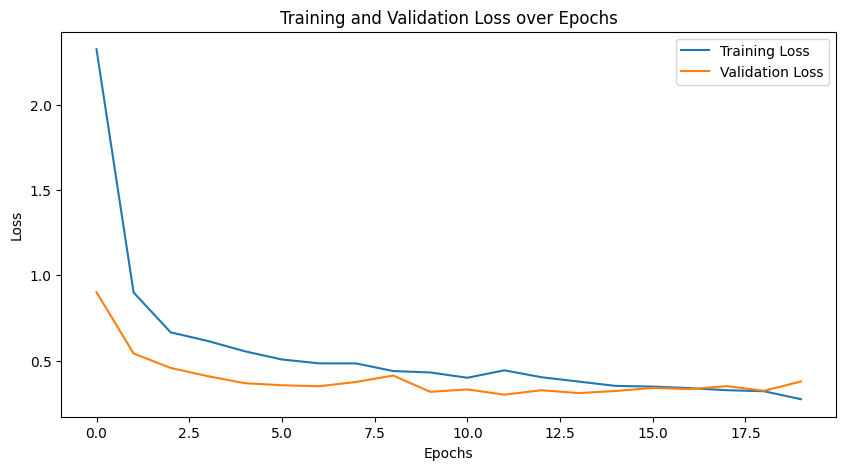

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

## Plot Validation Accuracy

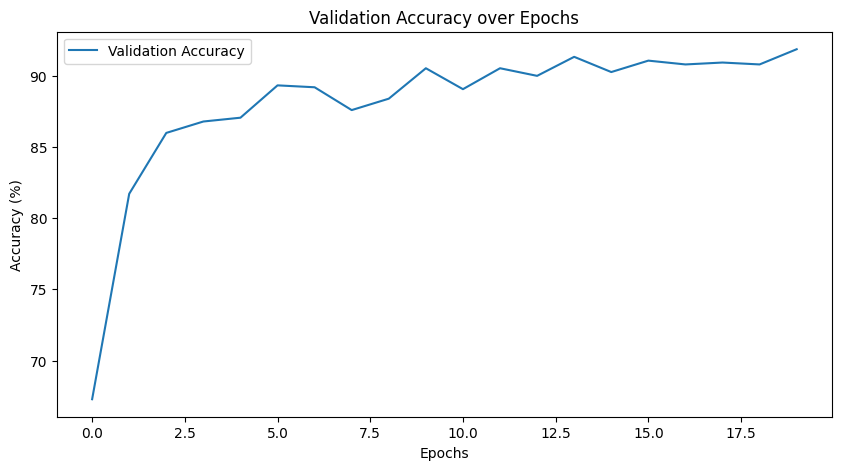

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Evaluation

Test Accuracy: 88.37%


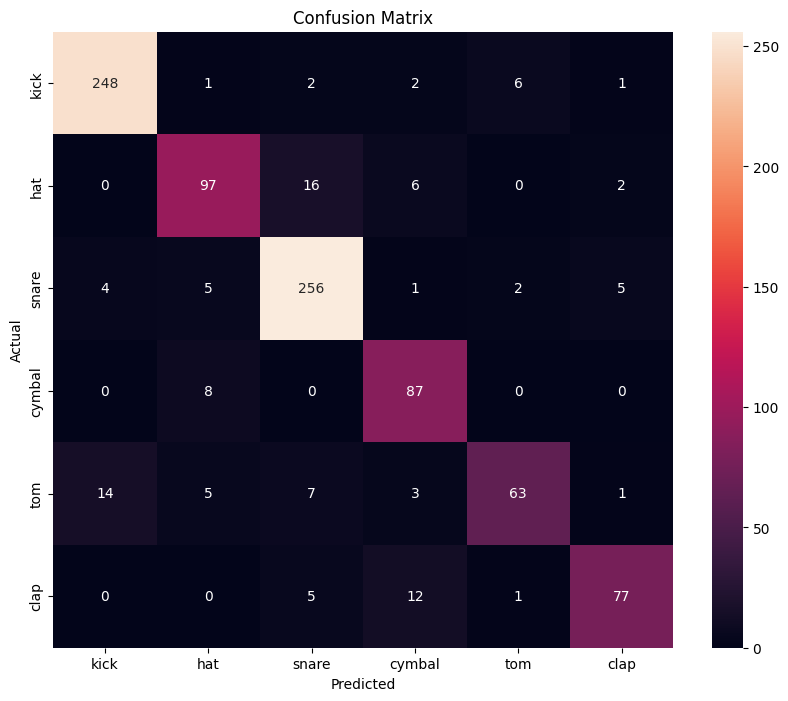

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_preds)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds, labels=[categories.index(cat) for cat in categories])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Save and Load the Model

In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'model_bn_dropout.pth')

# To load the model
model.load_state_dict(torch.load('model_bn_dropout.pth'))
model.eval()


DrumCNN_BN_Dropout(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=512, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=6, bias=True)
)

# Grid Search

# Sound Sorting

In [ ]:
#put your imput sounds into the input dir
#then folders will automatically be created and your sounds will be moved to output_soudns in the predicted catagories

input_dir = '/content/drive/Shareddrives/DeepLearning/FinalProject/Data/input_sounds'
output_dir = '/content/drive/Shareddrives/DeepLearning/FinalProject/Data/output_sounds'
categories = ['kick', 'hat', 'snare', 'cymbal', 'tom', 'clap']
fixed_width = 128  # Fixed width for the mel spectrograms

def generate_mel_spectrogram(y, sr, n_mels=128):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)
    return S_DB

def pad_spectrogram(spectrogram, max_len=fixed_width):
    if spectrogram.shape[1] < max_len:
        pad_width = max_len - spectrogram.shape[1]
        padded_spectrogram = np.pad(spectrogram, ((0, 0), (0, pad_width)), mode='constant')
    else:
        padded_spectrogram = spectrogram[:, :max_len]
    return padded_spectrogram

class DrumCNN_BN_Dropout(nn.Module):
    def __init__(self):
        super(DrumCNN_BN_Dropout, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 16 * 16, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, len(categories))

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 128 * 16 * 16)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Load the model
model = DrumCNN_BN_Dropout()
model.load_state_dict(torch.load(base_dir+'/drum_cnn.pth'))
model.eval()

# Function to transform mel spectrogram to tensor
def to_tensor(spectrogram):
    spectrogram = spectrogram.astype(np.float32)
    return torch.tensor(spectrogram).unsqueeze(0).unsqueeze(0)  # Add channel and batch dimensions

# Process each audio file in input_sounds directory
for file_name in tqdm(os.listdir(input_dir), desc="Classifying audio files"):
    file_path = os.path.join(input_dir, file_name)
    if os.path.isfile(file_path):
        try:
            # Load and preprocess the audio file
            y, sr = librosa.load(file_path, sr=None)
            mel_spectrogram = generate_mel_spectrogram(y, sr)
            mel_spectrogram = pad_spectrogram(mel_spectrogram, max_len=fixed_width)
            mel_spectrogram_tensor = to_tensor(mel_spectrogram)

            # Make prediction
            with torch.no_grad():
                outputs = model(mel_spectrogram_tensor)
                _, predicted = torch.max(outputs.data, 1)

            # Convert prediction to label
            predicted_label = categories[predicted.item()]

            # Create the target directory if it doesn't exist
            target_dir = os.path.join(output_dir, predicted_label)
            os.makedirs(target_dir, exist_ok=True)

            # Move the file to the target directory
            shutil.move(file_path, os.path.join(target_dir, file_name))

            print(f"Classified {file_name} as {predicted_label}")
        except Exception as e:
            print(f"Could not process {file_name}: {e}")

Classifying audio files:  33%|███▎      | 2/6 [00:00<00:00,  7.88it/s]

Classified HiTom 707.wav as tom
Classified HiTom 707X.wav as tom


Classifying audio files:  67%|██████▋   | 4/6 [00:00<00:00,  6.90it/s]

Classified LowTom 707.wav as tom
Classified MidTom 707X.wav as tom


Classifying audio files: 100%|██████████| 6/6 [00:00<00:00,  6.95it/s]

Classified MidTom 707.wav as tom
Classified LowTom 707X.wav as tom
